# OV7675 Image Viewer
Takes the hexadecimal output of the Camera Test from the Serial Monitor and converts and displays it as an image.

In [1]:
# Import the needed libraries
from matplotlib import pyplot as plt
import numpy as np
import struct

Update the following variable with the output of your Serial Monitor.

In [14]:
HEXADECIMAL_BYTES=[0x8E7B, 0x8E7B, 0x8E7B, 0x8E7B, 0xAE7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCD83, 0xCD83, 0xCD83, 0xCD7B, 0xED83, 0xED83, 0xED83, 0xED83, 0xED83, 0xED83, 0xF84, 0xF84, 0xF84, 0x2F84, 0x2F84, 0x2F84, 0x2F8C, 0xF8C, 0xF8C, 0x308C, 0x508C, 0x708C, 0x708C, 0x708C, 0x708C, 0x708C, 0x708C, 0x708C, 0x5084, 0x3084, 0x2F84, 0xF07B, 0xEF7B, 0x4F84, 0xF07B, 0xCF7B, 0x2C63, 0xE842, 0x2632, 0x232A, 0x432A, 0x32A, 0x242A, 0x242A, 0x242A, 0x442A, 0x442A, 0x662A, 0x8632, 0xA632, 0xA532, 0xA532, 0xC73A, 0xA73A, 0xE742, 0x849, 0x2849, 0x6849, 0x8749, 0xEA51, 0x4E7C, 0x338E, 0x37AD, 0x5BD7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DE7, 0x7EE7, 0x5CE7, 0x1CD7, 0xFBD5, 0xBACD, 0x58C5, 0xB5B6, 0xF4A4, 0x93A4, 0xC94A, 0x8342, 0x6632, 0x6632, 0x6632, 0x6632, 0x6632, 0x6632, 0x4632, 0x6632, 0x4632, 0x4632, 0x4632, 0x462A, 0x442A, 0x442A, 0x242A, 0x242A, 0x442A, 0x242A, 0x242A, 0x442A, 0x4432, 0x4432, 0x6632, 0x8632, 0x8632, 0xA53A, 0xA542, 0xC74A, 0xE752, 0x6759, 0x6861, 0xA869, 0x4A61, 0xE428, 0xAC7B, 0xAE7B, 0xAE7B, 0x8E7B, 0x8E7B, 0xAD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xED7B, 0xED7B, 0xED83, 0xCD83, 0xED83, 0xD84, 0xEF83, 0xF84, 0xF84, 0xF84, 0xF84, 0x2F84, 0x2F84, 0x2F84, 0x2F84, 0x3084, 0x5084, 0x5084, 0x508C, 0x708C, 0x708C, 0x708C, 0x708C, 0x708C, 0x908C, 0x708C, 0x4F8C, 0xF84, 0xED83, 0x2F8C, 0x2F84, 0x6F8C, 0x2E84, 0x6E73, 0x8951, 0x4632, 0xC420, 0xA418, 0xE320, 0x42A, 0x242A, 0x442A, 0x242A, 0x462A, 0x462A, 0x662A, 0x8532, 0x8532, 0xA532, 0x8732, 0xC73A, 0xE73A, 0x839, 0x2A39, 0x6A41, 0x2A39, 0x2B53, 0xCF6B, 0x7496, 0x77B5, 0x79D7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DE7, 0x9EEF, 0x9EE7, 0x1CDF, 0x1BDF, 0xFAD5, 0x98CD, 0xF5C6, 0x34B6, 0x11AE, 0xEF69, 0x2632, 0x653A, 0x6632, 0x6632, 0x6632, 0x6632, 0x6632, 0x4632, 0x6632, 0x4632, 0x4632, 0x462A, 0x442A, 0x242A, 0x442A, 0x242A, 0x242A, 0x242A, 0x442A, 0x242A, 0x442A, 0x4432, 0x6432, 0x4632, 0x863A, 0x663A, 0xA542, 0xA542, 0xC54A, 0xE552, 0x4861, 0x6769, 0x6861, 0xEA52, 0x2332, 0xED7B, 0xCD7B, 0xAE7B, 0xAD7B, 0x8D7B, 0xAD7B, 0xAD7B, 0xCD83, 0xCD7B, 0xCD83, 0xCD7B, 0xCD7B, 0xCD7B, 0xED7B, 0xED83, 0xCD7B, 0xED83, 0xED83, 0xD84, 0xD84, 0xF84, 0xF84, 0xF84, 0xD84, 0x2F84, 0xF84, 0xF84, 0x2F84, 0x3084, 0x3084, 0x4F8C, 0x508C, 0x508C, 0x508C, 0x708C, 0x908C, 0x708C, 0x728C, 0x508C, 0x7084, 0x908C, 0x908C, 0x5084, 0x1084, 0x4F8C, 0x5084, 0xD273, 0x8D6B, 0x963, 0xAA3A, 0xE628, 0xE320, 0x122, 0x232A, 0x242A, 0x442A, 0x442A, 0x462A, 0x462A, 0x6632, 0x8632, 0xA532, 0xC53A, 0x741, 0xE73A, 0xE73A, 0x841, 0x6749, 0xA749, 0x8A49, 0xA5B, 0x7084, 0x3396, 0xF5AE, 0x3BD7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x9DE7, 0x9DE7, 0x9EDF, 0x7CDF, 0x19D7, 0x9ACD, 0xF7BE, 0x55AE, 0x14A6, 0xB17B, 0x6732, 0xA43A, 0x8632, 0x6632, 0x6632, 0x6632, 0x6632, 0x6632, 0x6632, 0x4632, 0x4632, 0x442A, 0x442A, 0x442A, 0x242A, 0x242A, 0x242A, 0x242A, 0x242A, 0x442A, 0x442A, 0x6432, 0x6632, 0x6632, 0x863A, 0xA63A, 0xA63A, 0xA542, 0xC54A, 0x2759, 0x2861, 0x6769, 0xA869, 0x8842, 0x2432, 0xCE7B, 0xCE7B, 0xAE7B, 0xCE83, 0xAD7B, 0xAD7B, 0xAD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xAD7B, 0xAE7B, 0xCD7B, 0xED7B, 0xCD7B, 0xCD7B, 0xCD83, 0xED83, 0xD84, 0xED83, 0xF84, 0xF84, 0xD84, 0xD84, 0xF84, 0xF84, 0xF84, 0xF84, 0x3084, 0x3084, 0x508C, 0x708C, 0x508C, 0x508C, 0x708C, 0x908C, 0x908C, 0x7094, 0x708C, 0x908C, 0x908C, 0x708C, 0x708C, 0x508C, 0x708C, 0x6F8C, 0x708C, 0x6D8C, 0x6E8C, 0xEE59, 0x2949, 0x6732, 0x42A, 0xA320, 0x32A, 0x442A, 0x242A, 0x462A, 0x462A, 0x662A, 0x662A, 0x8532, 0xA532, 0xA73A, 0xC53A, 0xE73A, 0x2839, 0x2841, 0x2841, 0xA39, 0x6949, 0xEB51, 0x707C, 0x5696, 0xB8BD, 0x9BDF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x9DE7, 0x9EEF, 0x9EE7, 0x5CDF, 0x39DF, 0xF9D5, 0xB8CD, 0x15BD, 0xB4B6, 0xD19C, 0xB49, 0x643A, 0x6632, 0x663A, 0x6632, 0x6632, 0x6632, 0x6632, 0x6632, 0x4632, 0x4632, 0x242A, 0x442A, 0x442A, 0x442A, 0x242A, 0x242A, 0x242A, 0x242A, 0x442A, 0x4432, 0x6432, 0x663A, 0x663A, 0x863A, 0x8642, 0xA642, 0xE54A, 0x2551, 0x4759, 0x6861, 0x8869, 0xCA69, 0x683A, 0x433A, 0xAE73, 0xAE73, 0xAE7B, 0xCE7B, 0xAD7B, 0xAD7B, 0xAE7B, 0xAE7B, 0xCE7B, 0xCE7B, 0xCE7B, 0xAE7B, 0xCE7B, 0xCE7B, 0xCE7B, 0xCE7B, 0xCD83, 0xED83, 0xED83, 0xED83, 0xEF83, 0xEF83, 0xED83, 0xD84, 0xF84, 0xF84, 0xF84, 0xF84, 0x2F84, 0x2F84, 0x2F84, 0x2F84, 0x308C, 0x4F8C, 0x708C, 0x908C, 0x708C, 0x7294, 0x728C, 0x908C, 0x708C, 0x708C, 0x708C, 0x728C, 0x528C, 0x5084, 0x5284, 0x5284, 0x7084, 0xAF73, 0x8F6B, 0xC63, 0xCA42, 0x42A, 0xE328, 0x322, 0x442A, 0x462A, 0x462A, 0x442A, 0x662A, 0x462A, 0x6632, 0x4632, 0x853A, 0xE53A, 0x2841, 0x4741, 0x4849, 0x4849, 0x6A51, 0x8849, 0x6C63, 0x4F7C, 0x5396, 0x57AD, 0x5CCF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DE7, 0x7EE7, 0x5BDF, 0xD9D5, 0x5AC5, 0x17BD, 0x96AE, 0x33A6, 0xD6B, 0xA63A, 0x6432, 0x6632, 0x6632, 0x6632, 0x6632, 0x6632, 0x6632, 0x4632, 0x2432, 0x242A, 0x442A, 0x442A, 0x242A, 0x242A, 0x242A, 0x242A, 0x242A, 0x442A, 0x442A, 0x6432, 0x6632, 0x663A, 0x863A, 0x8642, 0x8542, 0xE542, 0x4551, 0x6761, 0x8869, 0x8869, 0x8869, 0x632, 0x443A, 0xAE73, 0xAE73, 0xAE7B, 0xCD7B, 0xAD7B, 0xAE7B, 0xAE7B, 0x8E7B, 0xCD7B, 0xED7B, 0xCD7B, 0xAE7B, 0xAE7B, 0xCE7B, 0xCE7B, 0xCD7B, 0xCD83, 0xED83, 0xED83, 0xED83, 0xED83, 0xF84, 0xD84, 0xD84, 0xF84, 0xEF83, 0xEF83, 0xF84, 0x2F84, 0x2F84, 0x3084, 0x3084, 0x5084, 0x4F84, 0x708C, 0x708C, 0x708C, 0x7294, 0x7294, 0x908C, 0x908C, 0x7094, 0x7294, 0x7294, 0x9294, 0x9294, 0x728C, 0x708C, 0xB094, 0xAF94, 0x6F84, 0x6D8C, 0x4E6B, 0x6951, 0x52A, 0xC428, 0xA420, 0x42A, 0x262A, 0x442A, 0x462A, 0x662A, 0x6632, 0x8532, 0xA53A, 0x8532, 0x739, 0x2741, 0x2741, 0x2841, 0x4A41, 0x4941, 0x941, 0x8C51, 0xEF73, 0x3496, 0x78B5, 0x99D7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9EEF, 0x9EEF, 0x7CE7, 0xF9D5, 0xB8D5, 0x78CD, 0xD5BE, 0x71B6, 0xD28B, 0x453A, 0x4532, 0x663A, 0x6632, 0x6632, 0x6632, 0x6632, 0x4632, 0x4632, 0x2632, 0x242A, 0x242A, 0x242A, 0x242A, 0x242A, 0x242A, 0x242A, 0x242A, 0x2432, 0x4432, 0x6432, 0x6632, 0x863A, 0x863A, 0x8642, 0x8542, 0xE54A, 0x4559, 0x6761, 0x6869, 0x6869, 0x4959, 0x432, 0x443A, 0xAD73, 0xAE73, 0xAE7B, 0xCE7B, 0xCD7B, 0xAE7B, 0xAE7B, 0xCD7B, 0xCD7B, 0xAD7B, 0xCE7B, 0xAE7B, 0xAE7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCD83, 0xCD83, 0xED83, 0xED83, 0xCD83, 0xED83, 0xED83, 0xD84, 0xF84, 0xF84, 0xEF83, 0xF84, 0x2F84, 0x2F84, 0x2F84, 0x2F84, 0x4F84, 0x4F8C, 0x708C, 0x708C, 0x708C, 0x7094, 0x7094, 0x708C, 0x728C, 0x708C, 0x7094, 0x928C, 0x928C, 0xB28C, 0x928C, 0x728C, 0x7084, 0x7084, 0x327C, 0x307C, 0xD073, 0xED7B, 0xEB59, 0xC842, 0xE628, 0x6432, 0x4332, 0x442A, 0x462A, 0x462A, 0x6632, 0x8632, 0xA53A, 0x853A, 0xA53A, 0xC53A, 0x741, 0x741, 0x4849, 0x4A49, 0xA851, 0xC951, 0x4B5B, 0x6D7C, 0x939E, 0x57B5, 0x3CCF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x9DE7, 0x7EE7, 0x1BDF, 0xF9D5, 0xB9CD, 0x38BD, 0xB5AE, 0xB6A4, 0xA942, 0x8442, 0x863A, 0x6632, 0x6632, 0x6632, 0x6632, 0x4632, 0x4632, 0x442A, 0x242A, 0x242A, 0x242A, 0x242A, 0x242A, 0x242A, 0x242A, 0x242A, 0x2432, 0x4432, 0x4432, 0x663A, 0x863A, 0x863A, 0xA542, 0xA542, 0xC542, 0x4759, 0x6761, 0x8869, 0xA871, 0xE852, 0x6342, 0x863A, 0xCD73, 0xAE7B, 0x8E7B, 0x8C7B, 0x8C7B, 0xAE7B, 0xAE7B, 0xAD83, 0xCD83, 0xCD7B, 0xAE7B, 0xAE7B, 0xAE7B, 0xCE7B, 0xAD83, 0xAD7B, 0xCD7B, 0xED7B, 0xCD83, 0xCD83, 0xCD83, 0xED83, 0xED83, 0xED83, 0xF84, 0xF84, 0xF84, 0xF84, 0xF84, 0xF84, 0x2F84, 0x2F84, 0x4F84, 0x4F84, 0x5084, 0x508C, 0x508C, 0x708C, 0x708C, 0x708C, 0x908C, 0x928C, 0x9294, 0x9294, 0x928C, 0xB08C, 0xB28C, 0xD294, 0x928C, 0x928C, 0x908C, 0x4F8C, 0x2F8C, 0x8D8C, 0x4D84, 0x4E63, 0x6951, 0x463A, 0x8320, 0xA320, 0x242A, 0x462A, 0x662A, 0x6632, 0x8532, 0x8532, 0xC53A, 0xE73A, 0x741, 0x741, 0x6849, 0x6A41, 0x8A49, 0x6B41, 0x4939, 0xC53, 0x4D74, 0x5496, 0x57AD, 0x9BE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x9EEF, 0x5CDF, 0xFBD5, 0xDAD5, 0x97CD, 0xF5BE, 0x53AE, 0x2F73, 0xE430, 0x663A, 0x8632, 0x6632, 0x662A, 0x662A, 0x4632, 0x4432, 0x442A, 0x442A, 0x242A, 0x242A, 0x242A, 0x242A, 0x242A, 0x242A, 0x2432, 0x2432, 0x4432, 0x443A, 0x663A, 0x863A, 0xA63A, 0xA542, 0xA542, 0xC542, 0x4759, 0x6769, 0x6869, 0x6A69, 0x4542, 0x643A, 0x863A, 0xCD73, 0xCD7B, 0xAE7B, 0x8E7B, 0x8C7B, 0x8E7B, 0x8E7B, 0xCE83, 0xCD7B, 0xCD7B, 0xAD7B, 0xAD7B, 0xCD7B, 0xCD7B, 0xCD83, 0xED7B, 0xED7B, 0xEE7B, 0xEE83, 0xCD83, 0xCD83, 0xCD83, 0xCD83, 0xED83, 0xD84, 0xD84, 0xF84, 0xF84, 0x2F84, 0xF84, 0x2F84, 0x2F84, 0x2F84, 0x2F84, 0x2F8C, 0x2F8C, 0x4F8C, 0x508C, 0x708C, 0x708C, 0x508C, 0x708C, 0x9094, 0x9094, 0x928C, 0xB28C, 0xB28C, 0xB28C, 0xD18C, 0xB18C, 0x928C, 0x928C, 0x728C, 0x708C, 0x327C, 0xF073, 0xEF73, 0xB63, 0xE84A, 0xC620, 0xE328, 0x442A, 0x6432, 0x6632, 0x8632, 0xA63A, 0xC53A, 0xC73A, 0xE542, 0xE742, 0x6749, 0x4849, 0x6851, 0x2849, 0x6749, 0xCA51, 0x95B, 0xE74, 0x318E, 0x77AD, 0x5CD7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x7EDF, 0x1BD7, 0xB9CD, 0xD9CD, 0x17BD, 0x36A6, 0x518C, 0x4832, 0x633A, 0x8532, 0x6632, 0x662A, 0x662A, 0x662A, 0x4632, 0x2632, 0x262A, 0x242A, 0x242A, 0x242A, 0x242A, 0x242A, 0x242A, 0x2432, 0x2432, 0x2432, 0x463A, 0x6632, 0x863A, 0xA63A, 0xA542, 0xA542, 0xA542, 0x4759, 0x8861, 0x6869, 0x6861, 0x632, 0x663A, 0x863A, 0xAE7B, 0xCD83, 0xAE7B, 0xCE83, 0xCE7B, 0xEE83, 0xE84, 0xCD83, 0xAE7B, 0xAD7B, 0xAD7B, 0xAD7B, 0xCE7B, 0xCD83, 0xCD7B, 0xCD7B, 0xED7B, 0xED83, 0xCD83, 0xCD83, 0xCD83, 0xCD83, 0xED83, 0xCD83, 0xED83, 0xD84, 0xF84, 0xF84, 0xEF83, 0xF84, 0x2F84, 0xF84, 0x2F84, 0x2F84, 0x2F84, 0x2F84, 0x4F84, 0x508C, 0x508C, 0x508C, 0x708C, 0x708C, 0x908C, 0x908C, 0x928C, 0xB28C, 0xB28C, 0xB294, 0xB294, 0xB28C, 0xB294, 0xB294, 0x928C, 0x7094, 0xB094, 0x6F8C, 0x4D84, 0x6E8C, 0x8E73, 0x2B41, 0xE628, 0xC328, 0xC428, 0x2432, 0x6632, 0x6532, 0x8532, 0xA53A, 0xA53A, 0xC73A, 0xE73A, 0x741, 0x4741, 0x6849, 0x4A49, 0x6949, 0x8B49, 0xEB51, 0xAD6B, 0x338E, 0x97B5, 0x7BD7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x9EEF, 0x5CE7, 0x3BDF, 0x19DF, 0x58C5, 0xB6BE, 0x12A6, 0x2B51, 0x2632, 0x863A, 0x6632, 0x6632, 0x662A, 0x662A, 0x462A, 0x262A, 0x262A, 0x242A, 0x2422, 0x2422, 0x2422, 0x2422, 0x242A, 0x242A, 0x2432, 0x4432, 0x643A, 0x663A, 0x863A, 0xA63A, 0xA542, 0xA542, 0xA542, 0x4759, 0x8861, 0x8861, 0x2A59, 0x443A, 0x663A, 0x8642, 0xEF83, 0xAD7B, 0x8E7B, 0xCE7B, 0xED83, 0xED7B, 0x2D84, 0xD84, 0xCD83, 0xAD7B, 0xCD7B, 0xAD7B, 0xCE7B, 0xCD83, 0xCD7B, 0xCD7B, 0xAE7B, 0xAE7B, 0xCD83, 0xCD83, 0xCD83, 0xCD83, 0xED83, 0xED83, 0xD84, 0xD84, 0xD84, 0xD84, 0xD84, 0xD84, 0xED83, 0xD84, 0xF84, 0xF84, 0x2F84, 0x2F84, 0x4F8C, 0x508C, 0x508C, 0x508C, 0x708C, 0x708C, 0x708C, 0x7294, 0x728C, 0x928C, 0xB28C, 0xB294, 0xB18C, 0xD18C, 0xD18C, 0xB18C, 0x918C, 0x728C, 0x5284, 0x5284, 0x327C, 0x908C, 0x307C, 0xCD73, 0xEB59, 0xA83A, 0x232A, 0x4332, 0x442A, 0x8632, 0x8632, 0xA53A, 0xA53A, 0xC53A, 0xC73A, 0xE742, 0x4741, 0x6849, 0x8851, 0x6851, 0x6851, 0xA851, 0xCA59, 0xCE73, 0x529E, 0xF7AE, 0xFBCD, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x9DE7, 0x7DE7, 0x7CDF, 0x5BDF, 0x79C5, 0xD8BE, 0x14A6, 0xF6B, 0xA542, 0x6432, 0x6532, 0x6632, 0x662A, 0x462A, 0x462A, 0x2432, 0x262A, 0x242A, 0x2422, 0x2422, 0x2422, 0x2422, 0x242A, 0x242A, 0x2432, 0x4432, 0x663A, 0x663A, 0xA63A, 0xA63A, 0xA542, 0xC542, 0xC542, 0x6759, 0x8861, 0xA769, 0x2851, 0x443A, 0x863A, 0xA642, 0x508C, 0x3084, 0xF84, 0xF84, 0xED83, 0xEE7B, 0xE84, 0xED7B, 0xCD7B, 0x8D7B, 0xAE7B, 0xCD83, 0xCD83, 0xED83, 0xED7B, 0xCD7B, 0xAD83, 0xAE7B, 0xCD83, 0xCD7B, 0xCD7B, 0xCD83, 0xED83, 0xED7B, 0xED83, 0xED83, 0xED83, 0xED83, 0xD84, 0xED83, 0xCD83, 0xD84, 0xF84, 0xF84, 0x2F84, 0x2F84, 0xF84, 0x2F84, 0x508C, 0x508C, 0x708C, 0x708C, 0x708C, 0x728C, 0x7294, 0x7294, 0x928C, 0xB294, 0xB294, 0xD294, 0xB194, 0xB194, 0xB294, 0x9294, 0x9294, 0xD294, 0xB294, 0xB094, 0x6F8C, 0xCF8C, 0x8D84, 0x6D63, 0x6A51, 0x4632, 0x62A, 0x6632, 0x863A, 0xA532, 0xA53A, 0xE53A, 0xE53A, 0xE742, 0x741, 0x2841, 0x2849, 0x841, 0xA41, 0x4A49, 0x941, 0x941, 0xEE73, 0xD384, 0x57AD, 0x99D7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9EE7, 0x9EE7, 0x7CE7, 0x5BE7, 0xBACD, 0xF7C6, 0x54B6, 0xB28B, 0x6A42, 0x632, 0x4532, 0x6632, 0x4632, 0x462A, 0x462A, 0x242A, 0x242A, 0x2422, 0x2422, 0x2422, 0x2422, 0x2422, 0x242A, 0x242A, 0x242A, 0x4432, 0x663A, 0x863A, 0x863A, 0x8542, 0xA542, 0xC54A, 0xC54A, 0x4759, 0x6861, 0xC869, 0xC542, 0x8442, 0x863A, 0x8642, 0x3084, 0x2F84, 0x5084, 0xCF7B, 0xCD7B, 0xCE7B, 0xE84, 0xCD7B, 0xCE7B, 0xAE7B, 0xAE7B, 0xD84, 0xD84, 0xED83, 0xED7B, 0xCD7B, 0xCD83, 0xCD83, 0xCD7B, 0xED7B, 0xED7B, 0xED83, 0xED83, 0xED83, 0xED83, 0xCD83, 0xED83, 0xED83, 0xCD83, 0xCD83, 0xED83, 0xD84, 0xF84, 0xF84, 0xF84, 0xF84, 0xF84, 0xF84, 0xF84, 0x4F8C, 0x708C, 0x508C, 0x508C, 0x708C, 0x528C, 0x708C, 0x928C, 0xB294, 0xB294, 0xD294, 0xB194, 0xB194, 0xD194, 0xD194, 0xD194, 0xB294, 0x9194, 0x728C, 0x5284, 0x9084, 0x727C, 0x327C, 0xCE73, 0xA959, 0x883A, 0x4332, 0x232A, 0xA632, 0x8632, 0x863A, 0xC53A, 0xE542, 0xC742, 0xC742, 0x741, 0x2841, 0x4849, 0x8851, 0x8A51, 0x6A51, 0xE959, 0xAE6B, 0x5196, 0x57AD, 0x1CCF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x9DE7, 0x7CE7, 0x3CDF, 0xBBCD, 0x3AC5, 0x35AE, 0xD3AC, 0x2E59, 0x8642, 0x8532, 0x6632, 0x4632, 0x262A, 0x262A, 0x242A, 0x242A, 0x242A, 0x2422, 0x422, 0x2422, 0x242A, 0x242A, 0x242A, 0x242A, 0x2632, 0x663A, 0x663A, 0x863A, 0x8542, 0xA542, 0xC54A, 0xE74A, 0x4559, 0x6861, 0x8769, 0x2632, 0x863A, 0x863A, 0x8642, 0xAE7B, 0xD84, 0xF84, 0x2F84, 0x2D84, 0x2D84, 0xED7B, 0xED7B, 0xCE7B, 0xAE83, 0x8E7B, 0xD84, 0xD84, 0xED83, 0xED83, 0xCD83, 0xCD83, 0xCD83, 0xCD7B, 0xCD7B, 0xED83, 0xED7B, 0xED7B, 0xED7B, 0xCD83, 0xED83, 0xCD83, 0xCD83, 0xCD83, 0xCD83, 0xED83, 0xED83, 0xED83, 0xF84, 0xF84, 0xF84, 0xF84, 0xF84, 0x2F84, 0x308C, 0x708C, 0x508C, 0x508C, 0x708C, 0x708C, 0x708C, 0x7294, 0x9294, 0x9294, 0xB19C, 0xB194, 0xB194, 0xD194, 0xD194, 0xB194, 0xB294, 0x9294, 0xB294, 0x9294, 0x728C, 0x708C, 0x6F8C, 0xAD8C, 0x2F7C, 0xEE59, 0x849, 0x2632, 0xE428, 0x4432, 0xA63A, 0x8532, 0x853A, 0xC742, 0xE73A, 0x2741, 0x2841, 0x2841, 0x6849, 0xAA51, 0xAB51, 0x4B49, 0xAB51, 0xED6B, 0x5496, 0x77B5, 0x9BE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9CE7, 0x9CE7, 0x5CDF, 0xD9DD, 0xD5BE, 0xD3C6, 0x7283, 0x253A, 0x2632, 0x4632, 0x462A, 0x262A, 0x242A, 0x242A, 0x242A, 0x42A, 0x422, 0x422, 0x2422, 0x42A, 0x242A, 0x242A, 0x2432, 0x4432, 0x663A, 0x663A, 0x863A, 0xA63A, 0xC542, 0xC74A, 0xE752, 0x2759, 0x4859, 0x4A59, 0x443A, 0x863A, 0x8642, 0xA642, 0xCE7B, 0xED7B, 0xED7B, 0xD7C, 0x2F7C, 0x2F7C, 0xD84, 0xCD83, 0xCE83, 0xEE83, 0xD84, 0xED83, 0xD84, 0xF84, 0xEF83, 0xCD83, 0xED83, 0xCD7B, 0xCD7B, 0xED83, 0xCD83, 0xED7B, 0xED7B, 0xED7B, 0xED83, 0xED83, 0xED83, 0xCD83, 0xCD83, 0xCD83, 0xED83, 0xED83, 0xED83, 0xEF83, 0xF84, 0xD84, 0xF84, 0xF84, 0x2F84, 0xF84, 0x2F8C, 0x2F8C, 0x4F8C, 0x708C, 0x708C, 0x708C, 0x7094, 0x9094, 0x9294, 0xB29C, 0xB194, 0xB194, 0xD194, 0xD194, 0xD194, 0xD294, 0xD194, 0xB194, 0xB194, 0xB18C, 0x7284, 0x9284, 0x9284, 0x127C, 0x3084, 0x8D73, 0xA961, 0x673A, 0x4332, 0x6432, 0x853A, 0x853A, 0xA53A, 0xE542, 0x541, 0x741, 0x2849, 0x4849, 0x4A49, 0x6A51, 0xAA59, 0xA951, 0xE959, 0x4D84, 0x919E, 0x78B5, 0x9EDF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x9DE7, 0x9DE7, 0x3CD7, 0xFBD5, 0x3ABD, 0xD5BE, 0xF3A4, 0xCB42, 0x833A, 0x6432, 0x462A, 0x262A, 0x242A, 0x242A, 0x242A, 0x42A, 0x422, 0x422, 0x422, 0x42A, 0x242A, 0x242A, 0x2432, 0x6432, 0x663A, 0x863A, 0x863A, 0xA63A, 0xC542, 0xC54A, 0x751, 0x4759, 0x8761, 0x2859, 0x663A, 0x863A, 0xA642, 0xA542, 0x728C, 0x728C, 0x928C, 0x928C, 0x928C, 0x107C, 0xF84, 0x2F8C, 0x2F8C, 0xF8C, 0xF84, 0xED83, 0xED83, 0xAD7B, 0xAD7B, 0xCD83, 0xCD83, 0xCD83, 0xAD7B, 0xCE7B, 0xCD83, 0xED7B, 0xD7C, 0xED7B, 0xED7B, 0xD84, 0xCF83, 0xCD83, 0xED83, 0xED83, 0xED83, 0xCD83, 0xED83, 0xEF83, 0xED83, 0xD84, 0xF84, 0xF8C, 0x108C, 0x1084, 0x2F8C, 0x2F8C, 0x2F8C, 0x508C, 0x508C, 0x708C, 0x7094, 0x7094, 0x9294, 0xB294, 0xB294, 0xB194, 0xB194, 0xB194, 0xB194, 0xB194, 0xB194, 0xD194, 0xD194, 0xD194, 0xD194, 0xB18C, 0xB28C, 0x8F8C, 0x8F8C, 0x6D8C, 0xCD7B, 0xAC59, 0x8742, 0xC428, 0xE430, 0x853A, 0x653A, 0x6532, 0xA53A, 0xC53A, 0xE73A, 0x741, 0x841, 0x4A49, 0x8A51, 0x8B51, 0x6C49, 0xCC59, 0x2F7C, 0x7696, 0x18C7, 0x9CEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x3CDF, 0x39E7, 0x58C5, 0xF5C6, 0x32AE, 0x3073, 0x2432, 0x2632, 0x262A, 0x262A, 0x242A, 0x242A, 0x42A, 0x42A, 0x422, 0x422, 0x2422, 0x42A, 0x242A, 0x242A, 0x4432, 0x4632, 0x663A, 0x863A, 0xA63A, 0xA642, 0xC542, 0xE54A, 0x751, 0x2761, 0x2759, 0x6542, 0x6442, 0x8642, 0xA642, 0xA54A, 0xB194, 0xB18C, 0x7284, 0x7284, 0x908C, 0x5284, 0xF84, 0xF84, 0xF8C, 0xAF7B, 0xAE7B, 0x2D84, 0xF84, 0x2F8C, 0xEF83, 0xCD83, 0xCD83, 0xCD83, 0xED83, 0xD84, 0xED7B, 0xF7C, 0xCF7B, 0xED7B, 0xCD7B, 0xAD7B, 0xF84, 0xEF83, 0xED83, 0xED83, 0xED83, 0xED83, 0xED83, 0xED83, 0xED83, 0xED83, 0xF84, 0xF8C, 0xF8C, 0xF84, 0x2F8C, 0x2F8C, 0x2F8C, 0x4F8C, 0x508C, 0x508C, 0x7094, 0x7094, 0x9294, 0xB294, 0xB294, 0xB294, 0xB194, 0xB194, 0xB194, 0xD194, 0xD194, 0xD194, 0xD194, 0xD394, 0xB394, 0xB18C, 0xD18C, 0xF194, 0xB18C, 0x9284, 0x127C, 0xF84, 0x4E6B, 0x4A51, 0x2732, 0x643A, 0x643A, 0xA63A, 0xA53A, 0xE63A, 0xE542, 0xE542, 0x749, 0x6851, 0x6A51, 0x6A51, 0x8959, 0x6A51, 0xC959, 0xE74, 0xD3A6, 0x7AB5, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x7EDF, 0x5CDF, 0xB9CD, 0x18BD, 0xF49C, 0x5194, 0xAA42, 0x2432, 0x442A, 0x242A, 0x242A, 0x242A, 0x42A, 0x42A, 0x422, 0x422, 0x422, 0x42A, 0x242A, 0x242A, 0x4432, 0x4632, 0x663A, 0xA63A, 0xA63A, 0x8642, 0xC642, 0xE54A, 0x751, 0x2759, 0x2861, 0x463A, 0x663A, 0x8642, 0xA642, 0xA54A, 0xB194, 0xB18C, 0x7184, 0x5084, 0x908C, 0x508C, 0xF84, 0xF84, 0xF84, 0xCD83, 0xCE83, 0x2E84, 0x2F8C, 0x2F8C, 0xEF83, 0xAD83, 0x8E83, 0xAE83, 0xE8C, 0x2D84, 0x2F84, 0x3084, 0xEF83, 0xCF7B, 0xAD7B, 0x8D7B, 0xED83, 0xEF83, 0xED83, 0xD84, 0xED83, 0xCD83, 0xED83, 0xED83, 0xCD83, 0xED83, 0xF84, 0xF8C, 0xF8C, 0xF8C, 0x2F8C, 0x2F8C, 0x2F8C, 0x2F8C, 0x308C, 0x508C, 0x508C, 0x708C, 0x928C, 0xB294, 0xD194, 0xB294, 0x9294, 0x9194, 0x9194, 0xB194, 0xD194, 0xD194, 0xD194, 0xD194, 0xB194, 0xD194, 0xD194, 0xD294, 0xD294, 0xF294, 0xD194, 0xCF94, 0x8F94, 0xD7C, 0x8C51, 0x853A, 0xE430, 0x463A, 0xA63A, 0xA63A, 0xC63A, 0xE742, 0xE742, 0x4849, 0x4A49, 0x6A51, 0xA959, 0x8951, 0x4B49, 0xCB51, 0xD74, 0xD48C, 0xD8BD, 0x9CEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EE7, 0x7CE7, 0x1BD7, 0x98D5, 0xB4B6, 0x32AE, 0xEE69, 0xE628, 0x4632, 0x442A, 0x242A, 0x242A, 0x2422, 0x422, 0x422, 0x2422, 0x422, 0x42A, 0x42A, 0x242A, 0x4432, 0x4632, 0x863A, 0x863A, 0x8642, 0x8642, 0xC54A, 0x551, 0x751, 0x2859, 0xEA52, 0x6642, 0x8642, 0xA542, 0xA54A, 0xC54A, 0x528C, 0x5284, 0x728C, 0x5284, 0x2F84, 0x3084, 0x1084, 0xF84, 0xEF83, 0xAD7B, 0x8E73, 0xEE83, 0xED83, 0xED7B, 0x2D8C, 0x2F8C, 0x6F8C, 0x2D8C, 0x8D94, 0x8F94, 0x708C, 0x4F84, 0x3084, 0x1084, 0xEF83, 0xF84, 0x2F8C, 0xD84, 0xD7C, 0xD84, 0xED83, 0xCD83, 0xED83, 0xED83, 0xCD83, 0xCD83, 0xF84, 0xD8C, 0xF8C, 0xF8C, 0xF8C, 0xF8C, 0x2F8C, 0x2F8C, 0x4F8C, 0x308C, 0x708C, 0x708C, 0x728C, 0x708C, 0x9294, 0x9294, 0xB294, 0x9294, 0xB294, 0xB294, 0xD194, 0xD194, 0xD194, 0xD194, 0xD194, 0xD194, 0xD194, 0xB18C, 0xB18C, 0xB18C, 0x918C, 0x7284, 0x3284, 0x5284, 0x7084, 0x6C73, 0xE94A, 0x263A, 0x643A, 0xA43A, 0xA63A, 0xE542, 0x541, 0x2549, 0x2749, 0x2749, 0x6A51, 0x8A59, 0xE961, 0xA959, 0x2A6B, 0x4E63, 0x3296, 0x78B5, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DE7, 0x5EDF, 0xFCD5, 0x79CD, 0xD7BE, 0x34A6, 0xF283, 0x6832, 0x843A, 0x232A, 0x242A, 0x42A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x242A, 0x242A, 0x242A, 0x4432, 0x4632, 0x843A, 0x863A, 0xA642, 0xA642, 0xC542, 0xE552, 0x751, 0x2759, 0xA74A, 0x6442, 0x8642, 0xA642, 0xA54A, 0xC64A, 0xF083, 0xD07B, 0xF07B, 0xF84, 0x3084, 0x3084, 0x1084, 0xF84, 0x2F84, 0x2F8C, 0x6F8C, 0x4F8C, 0xEF7B, 0xF84, 0x2F8C, 0xD84, 0xD8C, 0xD84, 0x6D8C, 0x6F8C, 0x4F8C, 0x2F8C, 0x308C, 0x308C, 0xF84, 0xED83, 0xF84, 0xF84, 0xD84, 0xD84, 0xED83, 0xCD83, 0xED8B, 0xED8B, 0xED83, 0xCD83, 0xF84, 0xD84, 0xF8C, 0xF8C, 0xF8C, 0xF8C, 0xF8C, 0xF8C, 0xF8C, 0xF8C, 0x1084, 0x4F8C, 0x708C, 0x528C, 0x508C, 0x9094, 0x9294, 0x9294, 0xB294, 0xB294, 0xD294, 0xD194, 0xD194, 0xD194, 0xD194, 0xF194, 0xD194, 0xD194, 0xD194, 0xD194, 0xD194, 0xB294, 0xB294, 0x9094, 0xF09C, 0xCF94, 0xAF73, 0xAB61, 0x8742, 0x2332, 0x863A, 0xE642, 0xE53A, 0xE73A, 0x741, 0x741, 0xA49, 0x2849, 0x8951, 0x6949, 0x8B51, 0xC41, 0x4E63, 0x727C, 0x58B5, 0x9BE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EEF, 0x5EDF, 0xFADD, 0x38C5, 0x74AE, 0xB09C, 0x8C59, 0x62A, 0x62A, 0x242A, 0x42A, 0x422, 0x422, 0x422, 0x422, 0x422, 0x42A, 0x242A, 0x2432, 0x4432, 0x6432, 0x663A, 0x863A, 0x8642, 0xA64A, 0xA54A, 0x551, 0x2759, 0x4759, 0x8742, 0x8642, 0x8642, 0xA64A, 0xC64A, 0x551, 0xB194, 0xB194, 0x928C, 0x508C, 0x3084, 0x1084, 0x1084, 0x1084, 0xF84, 0xF84, 0x908C, 0x329E, 0xD294, 0x908C, 0x4F8C, 0xD84, 0x2D84, 0xED83, 0x2D8C, 0xD84, 0x2F8C, 0x2F8C, 0x2F8C, 0x3084, 0xF84, 0xD84, 0xD84, 0xF84, 0xF84, 0xF84, 0xEF83, 0xEF8B, 0xED83, 0xED83, 0xED83, 0xED83, 0xD84, 0xD84, 0xF8C, 0xF8C, 0xF8C, 0xF8C, 0xF8C, 0xF8C, 0xF8C, 0xF8C, 0xF8C, 0x508C, 0x508C, 0x508C, 0x5094, 0x7094, 0x9294, 0xB294, 0xB294, 0xB294, 0xB294, 0xD294, 0xD194, 0xD194, 0xD194, 0xF194, 0xD194, 0xF394, 0xF194, 0xD194, 0xF194, 0xD394, 0xD194, 0xD18C, 0xB18C, 0x7184, 0x7184, 0x3084, 0xEC69, 0xC842, 0x463A, 0x4432, 0xE642, 0xC53A, 0xC542, 0xE54A, 0x2749, 0x6851, 0x6851, 0x8A59, 0xCA61, 0x8951, 0xCB59, 0xB63, 0x9084, 0xD6A6, 0x3CCF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DE7, 0x7EDF, 0x1CDF, 0x99CD, 0xB5B6, 0xB39C, 0xB07B, 0x8A3A, 0x4432, 0x32A, 0x42A, 0x422, 0x422, 0x322, 0x322, 0x322, 0x242A, 0x242A, 0x442A, 0x4432, 0x6432, 0x663A, 0x863A, 0x8642, 0xC642, 0xC542, 0x2751, 0x2751, 0x4759, 0x463A, 0x8642, 0xA642, 0xC642, 0xE54A, 0xE552, 0x9294, 0x9294, 0x728C, 0x528C, 0x728C, 0x728C, 0x7294, 0x7294, 0x928C, 0x708C, 0xB28C, 0xD294, 0x908C, 0x708C, 0x4F8C, 0x2D84, 0xD84, 0x2D84, 0x2F8C, 0x2F8C, 0x2F8C, 0xF84, 0xF84, 0x2F84, 0xD84, 0x2D84, 0x2F8C, 0x2F84, 0xEF83, 0xED83, 0xD84, 0xF84, 0xF84, 0xEF83, 0xED83, 0xED83, 0xD84, 0xD84, 0xF84, 0xF84, 0xF84, 0xF84, 0xF84, 0xF84, 0xF8C, 0xF8C, 0xF8C, 0x308C, 0x508C, 0x508C, 0x508C, 0x728C, 0x9294, 0x928C, 0x928C, 0x9294, 0xB294, 0xB19C, 0xB19C, 0xD194, 0xD194, 0xF194, 0xD194, 0xF194, 0xF194, 0xF194, 0xD194, 0xD194, 0xD194, 0xD194, 0xB294, 0xB294, 0xB094, 0xCF9C, 0x9094, 0xAD73, 0x6951, 0x873A, 0x643A, 0x863A, 0xA542, 0xE74A, 0x749, 0xE842, 0x849, 0x2849, 0x8A51, 0xA951, 0xEE51, 0xEE59, 0xEC59, 0xCF73, 0x5696, 0x9AD7, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x7EE7, 0x5BE7, 0xF9DD, 0x57CD, 0x53AE, 0x709C, 0x6C61, 0xA428, 0xE428, 0x422, 0x422, 0x422, 0x322, 0x322, 0x322, 0x242A, 0x242A, 0x442A, 0x6432, 0x643A, 0x663A, 0x863A, 0xA642, 0xA64A, 0xC54A, 0x2759, 0x2751, 0xE852, 0x643A, 0x8642, 0xC64A, 0xE54A, 0xE54A, 0xE54A, 0xB294, 0xB294, 0xB194, 0x718C, 0x918C, 0xB194, 0x928C, 0x928C, 0xB18C, 0xB28C, 0xB28C, 0x928C, 0xF7C, 0x2F84, 0x4F84, 0xCD7B, 0xED7B, 0x2D84, 0x4F8C, 0xF84, 0xD84, 0x6F8C, 0x908C, 0x6F8C, 0x6F8C, 0x4F8C, 0x2F8C, 0x4F8C, 0x508C, 0x4F8C, 0x2F8C, 0xF84, 0xF84, 0xF84, 0xEF83, 0xED83, 0xED83, 0xD8C, 0xF84, 0xF84, 0xF84, 0xF84, 0xF84, 0x2F84, 0x2F8C, 0xF8C, 0xF8C, 0xF8C, 0x2F8C, 0x2F8C, 0x508C, 0x7094, 0x7094, 0x9294, 0x9294, 0x9294, 0xB294, 0x9294, 0xB294, 0xB194, 0xD194, 0xF194, 0xF194, 0xF194, 0xF194, 0xF194, 0xD194, 0xD194, 0xD394, 0xD394, 0xD18C, 0xD18C, 0xB18C, 0xB18C, 0x918C, 0x718C, 0xCF7B, 0x2C6B, 0xCA4A, 0x8442, 0xA642, 0xE54A, 0x749, 0x749, 0x2749, 0x2751, 0x749, 0x6851, 0xC959, 0xE961, 0xA959, 0xA951, 0x2E63, 0x9284, 0xB59E, 0x9EDF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x7DDF, 0x5CDF, 0xBBD5, 0x3AC5, 0x76AE, 0x719C, 0x4F7B, 0x473A, 0x32A, 0x422, 0xE420, 0xE420, 0xE320, 0xE320, 0xE420, 0x242A, 0x242A, 0x2432, 0x4432, 0x663A, 0x863A, 0x863A, 0xA642, 0xC542, 0xE54A, 0x2559, 0x4559, 0xE752, 0x8342, 0xA642, 0xA54A, 0xE54A, 0xE54A, 0xE54A, 0xB294, 0xD29C, 0xD19C, 0x9194, 0x708C, 0x928C, 0xB294, 0xB18C, 0x928C, 0x728C, 0x528C, 0x508C, 0x508C, 0x5084, 0x908C, 0x708C, 0x508C, 0x508C, 0x908C, 0x8F8C, 0x7094, 0x6F8C, 0x708C, 0x4F84, 0x4F8C, 0x2F8C, 0x2F8C, 0x508C, 0x2F8C, 0x2F8C, 0x2F8C, 0xF84, 0xD84, 0xF84, 0xED83, 0xCD83, 0xED83, 0xD8C, 0xF84, 0xF84, 0xF84, 0xF84, 0xF8C, 0x2F84, 0x2F8C, 0xF84, 0xF84, 0x2F8C, 0x2F8C, 0x308C, 0x508C, 0x508C, 0x708C, 0x728C, 0x728C, 0xB294, 0xD19C, 0x9294, 0xB294, 0xB194, 0xD194, 0xD194, 0xD194, 0xF194, 0xF194, 0xF194, 0xF19C, 0xD39C, 0xD394, 0xD394, 0xD394, 0xD194, 0xD194, 0xD294, 0xD294, 0xB094, 0xB094, 0x6F94, 0xD6B, 0x4A59, 0x6542, 0x6542, 0xC54A, 0x2749, 0x749, 0x2751, 0x849, 0xE842, 0xC842, 0x841, 0x841, 0x2949, 0xEB42, 0x2B49, 0xEE59, 0x527C, 0x14AD, 0x99E7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EEF, 0x9CE7, 0x1BDF, 0xBAD5, 0x57CD, 0x53B6, 0x909C, 0xEC69, 0xA420, 0xC420, 0xE420, 0xE420, 0xE320, 0xE320, 0xE420, 0x42A, 0x242A, 0x2432, 0x4432, 0x663A, 0x863A, 0xA642, 0xA542, 0xA64A, 0xC552, 0x2559, 0x6759, 0xC54A, 0x8442, 0xA64A, 0xC64A, 0xE552, 0xE54A, 0xC54A, 0xD294, 0xD19C, 0xD194, 0xD294, 0xD194, 0xB194, 0x928C, 0xD194, 0xB18C, 0x728C, 0x528C, 0x5284, 0x908C, 0x708C, 0x708C, 0x908C, 0x728C, 0x5084, 0x708C, 0x908C, 0x908C, 0x3084, 0xF84, 0x4F8C, 0x4F8C, 0x2F84, 0x2F8C, 0x4F8C, 0x4F8C, 0xF8C, 0xF8C, 0xD84, 0xEF83, 0xD84, 0x2F84, 0x2F84, 0xD8C, 0xED83, 0xD84, 0xF84, 0xF84, 0x2F84, 0xF84, 0x2F8C, 0x2F84, 0xF84, 0xF84, 0xF8C, 0xF8C, 0x2F8C, 0x508C, 0x508C, 0x508C, 0x7094, 0x7294, 0x7094, 0x708C, 0xB094, 0x9294, 0x9294, 0xB294, 0xD194, 0xD194, 0xF194, 0xD194, 0xD194, 0xF39C, 0xF39C, 0xF394, 0xF394, 0xD394, 0xD394, 0xD194, 0xB194, 0xD194, 0xD194, 0x918C, 0xB28C, 0x918C, 0xF84, 0xC961, 0xE852, 0xC54A, 0xE54A, 0x549, 0x2749, 0x2751, 0x851, 0x849, 0x849, 0x2749, 0x8851, 0x2A49, 0x851, 0x2851, 0x4B51, 0x8C59, 0xEF59, 0x3674, 0x1BC7, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9DE7, 0x7EDF, 0xFBD5, 0x9ACD, 0x76AE, 0x9394, 0xB083, 0x732, 0x132, 0xE320, 0xE420, 0xE318, 0x322, 0x422, 0x42A, 0x242A, 0x2432, 0x4432, 0x663A, 0x863A, 0xA642, 0xC542, 0xC542, 0x551, 0x2559, 0x559, 0x6642, 0x8642, 0xA642, 0xC54A, 0xC552, 0xC552, 0xA54A, 0xD19C, 0xD19C, 0xD19C, 0xB194, 0xB294, 0xB194, 0x508C, 0xEF7B, 0xF8C, 0x308C, 0x9094, 0xF19C, 0xD19C, 0x7294, 0x528C, 0x508C, 0xB294, 0xB194, 0x918C, 0x928C, 0x728C, 0x508C, 0x4F8C, 0x4F8C, 0x4F8C, 0x6F8C, 0xAF94, 0x9094, 0x5094, 0xF8C, 0xF8C, 0xCF8B, 0xED8B, 0x2F8C, 0x4F8C, 0x4F8C, 0x4F8C, 0x508C, 0x3084, 0x2F84, 0x2F8C, 0x2F8C, 0x2F8C, 0x4F8C, 0x2F8C, 0xF84, 0xF84, 0xF8C, 0x2F8C, 0x2F8C, 0x508C, 0x508C, 0x508C, 0x708C, 0x7294, 0x7294, 0x7294, 0xB094, 0x9294, 0x9294, 0x9294, 0xB194, 0xB194, 0xB194, 0xD194, 0xD394, 0xF394, 0xF39C, 0xF39C, 0xD39C, 0xD39C, 0xD394, 0xF194, 0x119E, 0x1196, 0xF19C, 0xD194, 0xF294, 0x129E, 0x109E, 0x9094, 0x6D73, 0x8959, 0xC84A, 0x8642, 0xE54A, 0x751, 0x2751, 0x2849, 0x2849, 0x2849, 0x2849, 0x4849, 0x2A49, 0xE942, 0x893A, 0xEB42, 0xEC3A, 0xC39, 0xCC51, 0xEF84, 0x58CF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EEF, 0x3CDF, 0xDAD5, 0xB6BE, 0xF1A4, 0x6F9C, 0x4B59, 0x8120, 0xC420, 0xE420, 0xE318, 0xE320, 0x322, 0x2422, 0x242A, 0x442A, 0x6432, 0x663A, 0x863A, 0xA642, 0xC542, 0xC54A, 0x551, 0x559, 0xE752, 0xA442, 0xA642, 0x8642, 0xC54A, 0xE54A, 0xA54A, 0xA64A, 0xD19C, 0xB19C, 0xD394, 0xB194, 0xB19C, 0xD29C, 0xF39C, 0x7194, 0x508C, 0x708C, 0x728C, 0xB194, 0xB194, 0x7294, 0x528C, 0x528C, 0x718C, 0x928C, 0x918C, 0x928C, 0x728C, 0x1084, 0xF84, 0x3084, 0x508C, 0x708C, 0x908C, 0x9094, 0x7294, 0x5294, 0x308C, 0x108C, 0x7094, 0x508C, 0x2F84, 0x4F8C, 0x508C, 0x508C, 0x308C, 0x2F84, 0x2F84, 0x2F8C, 0x2F8C, 0x2F8C, 0x4F8C, 0xF84, 0xF84, 0xF8C, 0x2F8C, 0x2F8C, 0x4F8C, 0x508C, 0x508C, 0x708C, 0x7094, 0x7094, 0x7094, 0x9094, 0x9094, 0x9294, 0x9294, 0x7294, 0xB194, 0xB194, 0xD194, 0xD194, 0xD194, 0xF194, 0xF194, 0xF194, 0xD194, 0xF394, 0xF394, 0xF394, 0x1396, 0x1396, 0x1396, 0x1396, 0x1396, 0xD38C, 0xB38C, 0x718C, 0xCF83, 0xEB69, 0xE84A, 0xC64A, 0xE64A, 0x549, 0x2749, 0x2849, 0x4849, 0x4851, 0x6851, 0x4851, 0x4A59, 0x4A51, 0xA859, 0x8951, 0xCA59, 0xAA59, 0x2B41, 0x2D5B, 0x9674, 0x9EDF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x7DE7, 0x1BDF, 0xF8BE, 0x56AE, 0x9194, 0x8F7B, 0xE728, 0xE128, 0xE318, 0xE318, 0xE320, 0x322, 0x32A, 0x242A, 0x442A, 0x6432, 0x863A, 0x863A, 0x8642, 0xA542, 0xC54A, 0x551, 0x2559, 0xC74A, 0xA642, 0xA642, 0xC54A, 0x551, 0xC54A, 0xA54A, 0xA54A, 0xB29C, 0x9294, 0xD19C, 0xD39C, 0xB194, 0xD19C, 0xF19C, 0x13A6, 0x33A6, 0x34A6, 0xF394, 0xB194, 0xB194, 0x9294, 0x9194, 0x718C, 0x728C, 0x728C, 0x928C, 0x9294, 0x528C, 0x9294, 0x7294, 0x528C, 0x308C, 0x508C, 0xB294, 0x9194, 0x728C, 0x508C, 0x508C, 0x9294, 0xB294, 0x9094, 0x4F8C, 0x4F8C, 0x508C, 0x4F8C, 0x508C, 0x2F84, 0x2F84, 0x2F84, 0x4F8C, 0x4F8C, 0x4F8C, 0x2F84, 0xF84, 0x2F8C, 0x2F8C, 0x2F8C, 0x4F8C, 0x508C, 0x508C, 0x708C, 0x9094, 0x7094, 0x7094, 0x7094, 0x708C, 0x928C, 0x928C, 0xB294, 0xB194, 0xB194, 0xD194, 0xD194, 0xD194, 0xD194, 0xD194, 0xF194, 0xD39C, 0xD39C, 0xD39C, 0xF39C, 0xF39C, 0xF39C, 0xF39C, 0xF394, 0xF39C, 0xF194, 0xD29C, 0xF29C, 0xD09C, 0x708C, 0x6E73, 0xA961, 0xC84A, 0xA54A, 0xC74A, 0x751, 0x4851, 0x4851, 0x4851, 0x4851, 0x6A59, 0x6A59, 0x6A51, 0x6949, 0x4949, 0x8B49, 0xAE41, 0x6E39, 0xAD41, 0xF74, 0x33AD, 0x9EE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EEF, 0x9BEF, 0xBAD5, 0xF5BE, 0xD1A4, 0x2D94, 0xE952, 0x8320, 0xC420, 0xE318, 0xE320, 0x322, 0x32A, 0x242A, 0x442A, 0x6432, 0x663A, 0x863A, 0x8642, 0xA542, 0xE54A, 0x751, 0x751, 0xC642, 0xA642, 0xA64A, 0xC54A, 0xE552, 0xC54A, 0xA54A, 0xA64A, 0x13A6, 0x33A6, 0x13A6, 0xD39C, 0xB194, 0xD294, 0xD19C, 0xD39C, 0xF39C, 0x139E, 0x139E, 0x349E, 0x738C, 0x9194, 0x9194, 0x9194, 0xB194, 0xD194, 0xF19C, 0x7294, 0xD294, 0xF39C, 0xD19C, 0xD19C, 0xB194, 0xB294, 0xB294, 0x9194, 0x928C, 0xB28C, 0xB294, 0xD294, 0x928C, 0x908C, 0xB294, 0x708C, 0x6F8C, 0x4F8C, 0x4F8C, 0x2F8C, 0x2F84, 0x2F84, 0x2F8C, 0x4F8C, 0x508C, 0x308C, 0x508C, 0x308C, 0x2F8C, 0xF8C, 0x308C, 0x508C, 0x508C, 0x708C, 0x7094, 0x7094, 0x7094, 0x7094, 0x708C, 0x908C, 0x908C, 0x928C, 0xB294, 0xB294, 0xB294, 0xB294, 0xB294, 0xB294, 0xD194, 0xD194, 0xD194, 0xD39C, 0xD39C, 0xD39C, 0xF39C, 0xF39C, 0xF39C, 0xF394, 0xF394, 0xF394, 0x1396, 0xF394, 0xF394, 0xD394, 0x918C, 0xD84, 0x2C73, 0x4859, 0xE752, 0xC64A, 0x2851, 0x4851, 0x4851, 0x4851, 0x4859, 0x6A59, 0x8A51, 0x8A51, 0xA951, 0x6A49, 0xC951, 0xCB51, 0xC959, 0xAB51, 0x4E49, 0x525B, 0x39AD, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DE7, 0x5CDF, 0xD9CD, 0x78C5, 0x36AE, 0x5294, 0x4D73, 0xE720, 0xE120, 0xE318, 0xE320, 0xE320, 0x422, 0x242A, 0x2432, 0x4432, 0x663A, 0x863A, 0x8542, 0xA542, 0xE64A, 0x751, 0xE752, 0xA64A, 0xA542, 0xC54A, 0xC54A, 0xC552, 0xA64A, 0xA54A, 0xA54A, 0x11A6, 0x13A6, 0xF1A4, 0x9294, 0xB094, 0xB294, 0xD29C, 0x9194, 0x7294, 0xB294, 0xD294, 0xF19C, 0x738C, 0x7294, 0x5294, 0x528C, 0x7294, 0xB294, 0xD19C, 0xB29C, 0xD29C, 0xB29C, 0x9294, 0xB29C, 0xB29C, 0x9094, 0xB094, 0xB294, 0xB28C, 0x908C, 0x928C, 0x728C, 0x908C, 0x9094, 0x908C, 0x708C, 0x7094, 0x4F8C, 0x4F8C, 0x508C, 0x4F8C, 0x2F8C, 0x4F8C, 0x4F8C, 0x4F8C, 0x508C, 0x508C, 0x2F8C, 0xF8C, 0xF8C, 0x308C, 0x508C, 0x508C, 0x708C, 0x708C, 0x7094, 0x708C, 0x708C, 0x708C, 0x708C, 0x908C, 0x928C, 0x928C, 0x9294, 0xB194, 0xB294, 0xB294, 0xB294, 0xD194, 0xD194, 0xD194, 0xD39C, 0xD39C, 0xF39C, 0xF39C, 0xF39C, 0xF39C, 0xF39C, 0xF39C, 0xF39C, 0x139E, 0x339E, 0x339E, 0x319E, 0x129E, 0x30A6, 0x6F94, 0x8E7B, 0xAB61, 0x2A51, 0xA54A, 0x2759, 0x4859, 0x6861, 0x6A61, 0x6A59, 0x8A59, 0x8A51, 0x8A51, 0x6949, 0x6949, 0x4941, 0x2B41, 0xC41, 0xEC32, 0x4D41, 0xCD51, 0xF8E, 0x5AD7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9EEF, 0x3BDF, 0xD8D5, 0x95BE, 0xF2AC, 0x2D94, 0xA94A, 0x8110, 0xA318, 0xE318, 0xE320, 0x322, 0x442A, 0x2432, 0x4432, 0x663A, 0x8642, 0x8642, 0xE54A, 0x549, 0x751, 0xC74A, 0xA64A, 0xA64A, 0xC54A, 0xC54A, 0xC54A, 0xA54A, 0xA54A, 0xA54A, 0x31A6, 0x11A6, 0x31A6, 0xF19C, 0x119E, 0x119E, 0xF29C, 0xF19C, 0xF19C, 0xF19C, 0x119E, 0x119E, 0x938C, 0xD194, 0x33A6, 0x339E, 0xF394, 0xD194, 0xB194, 0xB194, 0x919C, 0x9294, 0xB09C, 0xB29C, 0xB29C, 0xD29C, 0xF19C, 0x908C, 0xB08C, 0xB094, 0x908C, 0x908C, 0x708C, 0x9094, 0x908C, 0x908C, 0x508C, 0xF84, 0x2F8C, 0x6F8C, 0x708C, 0x9294, 0x508C, 0x508C, 0x508C, 0x508C, 0x508C, 0x308C, 0x108C, 0xEF83, 0x308C, 0x308C, 0x508C, 0x708C, 0x708C, 0x708C, 0x708C, 0x708C, 0x708C, 0x708C, 0x708C, 0x928C, 0x9294, 0x9294, 0x7094, 0x9094, 0x9294, 0xB294, 0xD294, 0xD194, 0xD194, 0xB19C, 0xD19C, 0xD19C, 0xF19C, 0xF39C, 0xF39C, 0xF39C, 0xF39C, 0x139E, 0x1396, 0x1396, 0x1396, 0x139E, 0x149E, 0x339E, 0xD394, 0xB18C, 0x5084, 0xCE7B, 0xA961, 0x851, 0x2551, 0x4759, 0x6A59, 0x6A59, 0x8A59, 0x8A51, 0x8A51, 0x8A51, 0x6A49, 0x4A41, 0x4A41, 0x4A41, 0x8A49, 0x8C49, 0xCB51, 0xCB51, 0x705B, 0xF8A6, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DE7, 0x3BDF, 0x39BD, 0x56AE, 0x5194, 0xEC69, 0xA620, 0xC120, 0xE118, 0xE320, 0x322, 0x442A, 0x4432, 0x463A, 0x663A, 0x6642, 0x8542, 0xE54A, 0x549, 0x4551, 0xA542, 0xA642, 0xA64A, 0xE54A, 0xC54A, 0xC54A, 0xA54A, 0xA54A, 0xA54A, 0x319E, 0x319E, 0x31A6, 0xF29C, 0xF29C, 0xF29C, 0xB29C, 0xD29C, 0xD29C, 0xF29C, 0xF1A4, 0xD19C, 0x7294, 0x9294, 0xD29C, 0xB294, 0xB294, 0xD194, 0xD19C, 0xB29C, 0x9294, 0x3094, 0x7094, 0x929C, 0xB29C, 0xD29C, 0xF29C, 0xF29C, 0xD294, 0x9294, 0x9094, 0x9094, 0x908C, 0x9094, 0x908C, 0xB094, 0xB294, 0xD094, 0xD294, 0x9294, 0x7094, 0x708C, 0x508C, 0x2F8C, 0x2F8C, 0x2F8C, 0x2F8C, 0x2F8C, 0x4F8C, 0x5094, 0x308C, 0x5094, 0x5094, 0x708C, 0x708C, 0x708C, 0x7094, 0x708C, 0x708C, 0x508C, 0x708C, 0x728C, 0x9294, 0x9294, 0x728C, 0x9094, 0x9294, 0x9294, 0xD19C, 0xB194, 0xB194, 0xD194, 0xD194, 0xF194, 0xF194, 0xF39C, 0xF39C, 0xF39C, 0x139E, 0x139E, 0x139E, 0x139E, 0x139E, 0x139E, 0x139E, 0x319E, 0x319E, 0x71A6, 0x71A6, 0xD094, 0xF84, 0x2E6B, 0xAA59, 0x2851, 0x4859, 0x6A61, 0x8A59, 0x8A51, 0x6A51, 0x4A49, 0x4A49, 0x2A41, 0x4A41, 0x4941, 0x4939, 0x2939, 0xCC49, 0x6B41, 0xCE32, 0xED49, 0x5296, 0x9CE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EF7, 0x9CEF, 0xB9D5, 0xF6BE, 0x53AE, 0x2D8C, 0x6B59, 0x8318, 0xC318, 0x322, 0x322, 0x442A, 0x4432, 0x443A, 0x663A, 0x8642, 0x8542, 0xE54A, 0x549, 0x551, 0x853A, 0xA642, 0xC54A, 0xC54A, 0xC54A, 0xA54A, 0xA54A, 0xA54A, 0xA54A, 0x319E, 0x119E, 0x119E, 0xF29C, 0x119E, 0xF1A4, 0xD19C, 0xD29C, 0xF29C, 0x11A6, 0xF1A4, 0xB19C, 0xF29C, 0x31A6, 0x51A6, 0x339E, 0x139E, 0xF19C, 0xD194, 0x9294, 0x7294, 0xD29C, 0x11A6, 0xF19C, 0xB294, 0xB28C, 0xF194, 0x129E, 0xF29C, 0x928C, 0x908C, 0x708C, 0x708C, 0x908C, 0xB28C, 0xB294, 0x9294, 0x9294, 0x9294, 0x7294, 0x7094, 0x528C, 0x508C, 0x708C, 0x708C, 0x708C, 0x7094, 0x7094, 0x708C, 0x7294, 0x9094, 0x7094, 0x4F8C, 0x708C, 0x728C, 0x7294, 0x7294, 0x708C, 0x708C, 0x708C, 0x708C, 0x708C, 0x7094, 0x7094, 0x7094, 0x708C, 0x7294, 0x9294, 0x9294, 0x929C, 0xB294, 0xB194, 0xD194, 0xD294, 0xF19C, 0xF39C, 0xF39C, 0xF39C, 0x139E, 0xF39C, 0x139E, 0x139E, 0x339E, 0x139E, 0x139E, 0x339E, 0x549E, 0x349E, 0x139E, 0xF39C, 0xD394, 0xB28C, 0xD84, 0xC6B, 0x8961, 0xAA61, 0x8759, 0x6851, 0x6A51, 0x4851, 0x4849, 0x4841, 0x4841, 0x4A41, 0x6A41, 0x6A41, 0xA949, 0xE951, 0x8B49, 0xCB51, 0x6D41, 0x3174, 0x9BD7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x3EDF, 0xFBD5, 0x5ABD, 0xB7B6, 0x7294, 0x8D7B, 0x473A, 0xE120, 0x322, 0x422, 0x442A, 0x4432, 0x463A, 0x663A, 0x8642, 0xA642, 0xE54A, 0x549, 0xE74A, 0xC642, 0xC642, 0xC54A, 0xC54A, 0xC64A, 0xA64A, 0xA542, 0xA64A, 0xA64A, 0x11A6, 0xF19C, 0xD29C, 0xD29C, 0x11A6, 0x11A6, 0x13A6, 0x11A6, 0x31A6, 0x53A6, 0x13A6, 0x11A6, 0x53A6, 0x119E, 0x119E, 0x93AE, 0x94A6, 0x149E, 0xD19C, 0xF29C, 0x12A6, 0x73AE, 0x94A6, 0x74A6, 0x139E, 0xF194, 0xF29C, 0xF29C, 0x129E, 0xF194, 0x129E, 0x119E, 0xF39C, 0xB194, 0x918C, 0x9294, 0x9294, 0x9294, 0x528C, 0x708C, 0x7294, 0x708C, 0x908C, 0xF094, 0xB094, 0x7094, 0x9094, 0xB09C, 0x9294, 0x7094, 0x7094, 0x508C, 0x7094, 0x6F94, 0x9094, 0x928C, 0x728C, 0x708C, 0x7094, 0x7094, 0x7094, 0x708C, 0x7094, 0x7094, 0x7094, 0x7094, 0x7294, 0x7294, 0x9294, 0x9294, 0x9194, 0x9194, 0xB194, 0xD194, 0xB194, 0xD194, 0xF19C, 0xF39C, 0x139E, 0xF39C, 0x139E, 0x149E, 0x139E, 0x339E, 0x339E, 0x339E, 0x339E, 0x139E, 0x33A6, 0x53A6, 0x53A6, 0x31A6, 0x32A6, 0x308C, 0x8D7B, 0xAB69, 0x2851, 0x2851, 0xA51, 0x849, 0x4849, 0x4849, 0x4849, 0x4849, 0x4A41, 0x2A39, 0x4939, 0xC949, 0x8C49, 0x6C41, 0xAF49, 0x8D41, 0xB07C, 0x58D7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EEF, 0x9BE7, 0x19D7, 0x77C5, 0xD3A4, 0xCD8B, 0x2959, 0x8318, 0xE320, 0x42A, 0x242A, 0x4432, 0x463A, 0x863A, 0x8642, 0xA642, 0xE54A, 0x2551, 0xC74A, 0xA642, 0xC54A, 0xE54A, 0xA64A, 0xC64A, 0xA54A, 0xA542, 0xC642, 0xA64A, 0x11A6, 0x13A6, 0x11A6, 0x11A6, 0xF19C, 0x11A6, 0x139E, 0x13A6, 0x339E, 0x339E, 0x119E, 0x119E, 0x319E, 0x119E, 0x319E, 0x339E, 0x53A6, 0x139E, 0xF19C, 0x319E, 0x33A6, 0x339E, 0x339E, 0x339E, 0xF19C, 0x13A6, 0xD194, 0xF19C, 0x1196, 0xD394, 0xD194, 0xD194, 0xD194, 0xD394, 0xD194, 0xD194, 0xD19C, 0xD19C, 0x9194, 0x7294, 0xB094, 0xF19C, 0xF19C, 0x9294, 0x9094, 0x7094, 0x7094, 0x9294, 0x9294, 0x708C, 0x508C, 0x708C, 0x908C, 0xD094, 0xB294, 0xB294, 0x928C, 0x728C, 0x9094, 0x7294, 0x708C, 0x708C, 0x708C, 0x7294, 0x7094, 0x7094, 0x7094, 0x7294, 0x9294, 0x9294, 0x9294, 0x9294, 0x9294, 0x9194, 0x9194, 0xB194, 0xD19C, 0xF19C, 0xF19C, 0xF39C, 0xF39C, 0x139E, 0x139E, 0x139E, 0x139E, 0x349E, 0x349E, 0x349E, 0x549E, 0x549E, 0x369E, 0x349E, 0x549E, 0xD494, 0xD39C, 0x508C, 0x6E7B, 0x8B59, 0x6851, 0x6751, 0x4849, 0x2849, 0x2849, 0x4849, 0x4841, 0x4A41, 0x6A41, 0x8A49, 0x6949, 0x8941, 0x2C5B, 0x4C63, 0xEE51, 0x5074, 0x3ACF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x7EDF, 0xFBD5, 0x7AC5, 0x75AE, 0x5294, 0x2E7B, 0xC728, 0x12A, 0x42A, 0x442A, 0x4432, 0x6632, 0x863A, 0xA642, 0xC542, 0x549, 0x549, 0xA642, 0xC542, 0xC542, 0xC54A, 0xA642, 0xA54A, 0xA54A, 0xA542, 0xC642, 0xA54A, 0x93AE, 0xB4AE, 0xB6AE, 0x94AE, 0x54A6, 0x33A6, 0x73A6, 0x74A6, 0x33A6, 0x119E, 0x119E, 0x119E, 0x31A6, 0x139E, 0x139E, 0x339E, 0x339E, 0x119E, 0x119E, 0x119E, 0x319E, 0x33A6, 0x139E, 0x339E, 0xF39C, 0x119E, 0x34A6, 0x139E, 0xF39C, 0xF194, 0xD194, 0xB294, 0xB294, 0xB19C, 0xD19C, 0xF19C, 0xD194, 0xD194, 0xD29C, 0xD29C, 0xB294, 0xD29C, 0xD29C, 0xB294, 0x9094, 0x9094, 0x7094, 0x9094, 0x7294, 0x708C, 0x508C, 0x7094, 0x9094, 0xB094, 0xB294, 0xB294, 0x928C, 0x9094, 0x9094, 0x9294, 0x7294, 0x7294, 0x7094, 0x708C, 0x708C, 0x7094, 0x7094, 0x7294, 0x7294, 0x9294, 0x7294, 0x9294, 0x9294, 0x9194, 0x9194, 0xB194, 0xD194, 0xF194, 0xF19C, 0xF39C, 0xF39C, 0xF39C, 0x139E, 0x139E, 0x139E, 0x34A6, 0x34A6, 0x34A6, 0x34A6, 0x549E, 0x54A6, 0x74A6, 0x74A6, 0x53A6, 0x73AE, 0x31A6, 0xF29C, 0xAF73, 0xEB61, 0xC742, 0xC842, 0x849, 0x4849, 0x4849, 0x4849, 0x4A49, 0x4A41, 0x6A49, 0x8949, 0x4B39, 0x8B49, 0x6B41, 0x4E41, 0xCE49, 0xD07C, 0x78D7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9CEF, 0xFAD5, 0x35C5, 0xF3A4, 0xEE93, 0xAA4A, 0x8120, 0x42A, 0x2432, 0x4432, 0x663A, 0x863A, 0xA642, 0xC54A, 0x549, 0x549, 0xC642, 0xC542, 0xC54A, 0xA542, 0xA54A, 0xA54A, 0xA54A, 0xA64A, 0xA54A, 0xA54A, 0x53A6, 0x74A6, 0x74A6, 0x74A6, 0x34A6, 0x339E, 0x339E, 0x339E, 0x149E, 0xF39C, 0xD194, 0x119E, 0x33A6, 0x139E, 0x339E, 0x339E, 0xF39C, 0xF19C, 0x119E, 0x339E, 0x339E, 0x349E, 0x139E, 0x1396, 0xF19C, 0x139E, 0x139E, 0xF39C, 0xF39C, 0xF39C, 0x339E, 0x54A6, 0x53A6, 0x139E, 0xF39C, 0xF19C, 0xD194, 0xB194, 0xD294, 0xF194, 0xF19C, 0xD29C, 0xD19C, 0x718C, 0x528C, 0x508C, 0x7094, 0xD29C, 0x9294, 0x9294, 0x528C, 0x508C, 0x7094, 0x9294, 0x7294, 0x928C, 0x9294, 0x928C, 0xB294, 0xB294, 0x9294, 0x7294, 0x728C, 0x728C, 0x528C, 0x7094, 0x7094, 0x7094, 0x7294, 0x7294, 0x7294, 0x9294, 0x9294, 0x9294, 0x9194, 0xB194, 0xB294, 0xD19C, 0xD19C, 0xF19C, 0xF194, 0xF19C, 0xF39C, 0xF39C, 0x139E, 0x14A6, 0x34A6, 0x34A6, 0x34A6, 0x549E, 0x549E, 0x549E, 0x349E, 0x349E, 0x54A6, 0x349E, 0x549E, 0x3396, 0x9294, 0xE63, 0x4951, 0x749, 0x6749, 0x4849, 0x4849, 0x4841, 0x2841, 0x6A49, 0x8A49, 0xA949, 0xC949, 0xCB49, 0x2B53, 0x4C5B, 0x6E5B, 0xB17C, 0x9BE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x5CD7, 0x7AC5, 0x56A6, 0x308C, 0xEC61, 0xE320, 0x242A, 0x442A, 0x6432, 0x863A, 0xA63A, 0xA63A, 0xE54A, 0x549, 0xE54A, 0xC642, 0xC54A, 0xC54A, 0xA54A, 0xA54A, 0xA54A, 0xA64A, 0xA64A, 0xA54A, 0xA54A, 0x73A6, 0x549E, 0x349E, 0x549E, 0x73A6, 0x74A6, 0x74A6, 0x349E, 0x349E, 0x54A6, 0x74A6, 0x74A6, 0x53A6, 0x53A6, 0x33A6, 0x34A6, 0x34A6, 0x34A6, 0x139E, 0x139E, 0x149E, 0x549E, 0x54A6, 0x76A6, 0x149E, 0xF39C, 0xF39C, 0xD39C, 0xB19C, 0xB19C, 0xF19C, 0x73A6, 0x33A6, 0xF39C, 0xF39C, 0xF19C, 0xF19C, 0xF194, 0xD194, 0xF19C, 0x119E, 0xF39C, 0xF19C, 0x33A6, 0x339E, 0x339E, 0xF39C, 0xB29C, 0x9294, 0x9294, 0xB29C, 0xB29C, 0x9194, 0x9194, 0xB29C, 0xB19C, 0x9194, 0x7294, 0xB294, 0xB194, 0x9294, 0x7294, 0x7294, 0x928C, 0x9294, 0x9294, 0x9294, 0x7094, 0x7294, 0x7294, 0x7294, 0x7294, 0x7294, 0x7294, 0x9194, 0xB294, 0xB294, 0xB194, 0xD194, 0x1196, 0xF194, 0xD194, 0xF19C, 0x139E, 0x139E, 0x139E, 0x14A6, 0x14A6, 0x34A6, 0x34A6, 0x54A6, 0x54A6, 0x74AE, 0x94AE, 0x74A6, 0x74A6, 0x94AE, 0xB3AE, 0xF3B6, 0xF394, 0xF07B, 0xAB59, 0x8742, 0xC742, 0xE84A, 0x849, 0x4849, 0x6A49, 0x8A49, 0x8949, 0xA949, 0xEC49, 0xC53, 0xD4B, 0xF4B, 0xF4B, 0x7296, 0x9BE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EF7, 0x9CE7, 0xD9CD, 0xF5BE, 0x32AE, 0xF84, 0x8410, 0x242A, 0x4432, 0x643A, 0x863A, 0xA642, 0xC642, 0x549, 0x549, 0xE54A, 0xC64A, 0xC54A, 0xC54A, 0xA54A, 0xA54A, 0xA64A, 0xA64A, 0xA54A, 0xA54A, 0xA54A, 0x73A6, 0x539E, 0x339E, 0xD194, 0x9294, 0x928C, 0xB194, 0x339E, 0x349E, 0x349E, 0x549E, 0x54A6, 0x549E, 0x549E, 0x549E, 0x54A6, 0x34A6, 0x14A6, 0x149E, 0x349E, 0x349E, 0x54A6, 0x74A6, 0x56A6, 0x34A6, 0x149E, 0x13A6, 0x76A6, 0x74AE, 0xB4AE, 0x96AE, 0x349E, 0x33A6, 0x139E, 0xF39C, 0xF19C, 0xD194, 0xF194, 0xF194, 0xF19C, 0x139E, 0x139E, 0xF39C, 0xF39C, 0x139E, 0x139E, 0xF39C, 0xD19C, 0x9194, 0x9294, 0xB194, 0x33A6, 0x54A6, 0x13A6, 0xF3A4, 0xD19C, 0xD19C, 0xD19C, 0xD19C, 0xD19C, 0xB194, 0x9294, 0x7294, 0x928C, 0x928C, 0x9294, 0x9294, 0x7294, 0x7294, 0x7294, 0x9294, 0x9294, 0x7294, 0x7294, 0x928C, 0x9294, 0xB294, 0xB294, 0xB294, 0xD194, 0xD19C, 0xD19C, 0xD19C, 0xF19C, 0xF39C, 0x139E, 0x139E, 0x13A6, 0x14A6, 0x34A6, 0x54A6, 0x54A6, 0x76A6, 0x76A6, 0x76A6, 0x54A6, 0x76A6, 0x569E, 0x569E, 0x96A6, 0x549E, 0x728C, 0x4E6B, 0x6B51, 0x8859, 0x6751, 0x6851, 0x8A49, 0x8A49, 0x8A49, 0x8A41, 0xC949, 0x953, 0x2C5B, 0x2C5B, 0x4C5B, 0x4D5B, 0xF184, 0x9CEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x1CD7, 0x18BD, 0x33A6, 0xF19C, 0xC518, 0x232A, 0x2432, 0x643A, 0x843A, 0xA642, 0xC642, 0x549, 0x749, 0xC64A, 0xA54A, 0xC54A, 0xA54A, 0xA54A, 0xA54A, 0xA64A, 0xA64A, 0xA54A, 0xA54A, 0xA54A, 0x54A6, 0x53A6, 0x139E, 0x339E, 0xF39C, 0xD394, 0xD194, 0xF19C, 0x139E, 0x34A6, 0x54A6, 0x54A6, 0x54A6, 0x76A6, 0x74A6, 0x54A6, 0x34A6, 0x14A6, 0x149E, 0x139E, 0x149E, 0xD39C, 0xD39C, 0xD39C, 0x14A6, 0x53A6, 0x34A6, 0x33A6, 0x34A6, 0x53AE, 0x74AE, 0xF49C, 0x139E, 0x13A6, 0x139E, 0x33A6, 0x53AE, 0x54A6, 0x349E, 0xF39C, 0x139E, 0x13A6, 0xF39C, 0xF39C, 0x13A6, 0xF39C, 0xF19C, 0xB19C, 0xB19C, 0x7294, 0xB29C, 0x33A6, 0x53A6, 0x33A6, 0xF39C, 0xB19C, 0xF19C, 0x13A6, 0xF39C, 0xF19C, 0xD19C, 0xD294, 0xB294, 0x9294, 0x9294, 0x9294, 0x9294, 0x928C, 0x728C, 0x7294, 0x7294, 0x9294, 0x9294, 0x7294, 0x9294, 0x9294, 0x9294, 0x928C, 0x928C, 0x9194, 0x9194, 0xB194, 0xD194, 0xD19C, 0xF39C, 0xF39C, 0xF39C, 0x139E, 0x149E, 0x34A6, 0x34A6, 0x54A6, 0x76A6, 0x76A6, 0x76A6, 0x76A6, 0x76A6, 0x94A6, 0x96A6, 0xD4AE, 0xB3AE, 0xB3AE, 0x319E, 0xF27B, 0xC6B, 0x2A51, 0xE84A, 0x4849, 0xAA51, 0xAA49, 0xAA51, 0x8949, 0xA951, 0xEC59, 0xC53, 0x2D5B, 0xEF49, 0x4F5B, 0x7296, 0x9BDF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3CDF, 0x38BD, 0x91B6, 0x11A6, 0xAA18, 0x242A, 0x4432, 0x643A, 0x863A, 0xA642, 0xE64A, 0xE54A, 0xC54A, 0xA64A, 0xA54A, 0xA54A, 0xA54A, 0xA542, 0xC54A, 0xA64A, 0xA64A, 0xA54A, 0xA54A, 0xA54A, 0x53A6, 0x539E, 0x74A6, 0x94A6, 0xB6A6, 0x96A6, 0x96AE, 0x34A6, 0x33A6, 0x54A6, 0x34A6, 0x54A6, 0x56A6, 0x76A6, 0x56A6, 0x56A6, 0x36A6, 0x36A6, 0x54A6, 0x96AE, 0xB6AE, 0x74AE, 0x54A6, 0x74AE, 0x54A6, 0x54A6, 0x54A6, 0x149E, 0x13A6, 0x33A6, 0xD39C, 0xD394, 0xF19C, 0x34A6, 0x139E, 0x33A6, 0x34A6, 0x14A6, 0x149E, 0x14A6, 0x139E, 0x14A6, 0xF39C, 0xF39C, 0xF19C, 0xF39C, 0xF19C, 0xB19C, 0x13A6, 0xF19C, 0x73A6, 0x349E, 0x339E, 0x139E, 0xF39C, 0xD39C, 0xD19C, 0x139E, 0xF39C, 0xF19C, 0xD194, 0xD194, 0xB294, 0x9294, 0xB094, 0xB294, 0x928C, 0xB28C, 0x928C, 0x9294, 0x9294, 0x9294, 0x9294, 0x9294, 0x9294, 0x9294, 0x928C, 0x928C, 0x9294, 0xB294, 0xB194, 0xB194, 0xD194, 0xD19C, 0xD19C, 0xD19C, 0xF39C, 0x139E, 0x139E, 0x13A6, 0x34A6, 0x34A6, 0x74A6, 0x76A6, 0x76A6, 0x76A6, 0x76A6, 0x76A6, 0x76A6, 0x96A6, 0x96A6, 0x95A6, 0x759E, 0x1496, 0x928C, 0x4E73, 0x2951, 0x6859, 0x8851, 0x8851, 0x8951, 0x8951, 0xA959, 0xA951, 0xCB59, 0xC5B, 0x6C5B, 0x6E63, 0x6D5B, 0xF38C, 0x9EF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x5EDF, 0x3ABD, 0x96AE, 0x94AE, 0xA818, 0x2332, 0x2432, 0x863A, 0x8642, 0x8642, 0xC64A, 0xC54A, 0xA742, 0xA64A, 0xA54A, 0xA54A, 0xA54A, 0xA542, 0xC54A, 0xC54A, 0xA54A, 0xA54A, 0xA54A, 0xA64A, 0x96A6, 0xD6AE, 0x96A6, 0x96A6, 0x349E, 0x33A6, 0x54A6, 0x96AE, 0x96AE, 0x96AE, 0x96AE, 0x56A6, 0x34A6, 0x34A6, 0x54A6, 0x54A6, 0x76AE, 0x96AE, 0x96AE, 0x96AE, 0x76AE, 0x54A6, 0x54AE, 0x54A6, 0x53A6, 0x53A6, 0x53A6, 0x54A6, 0x74A6, 0x94AE, 0xB4A6, 0x96A6, 0x96A6, 0x54A6, 0x33A6, 0x33A6, 0x14A6, 0x14A6, 0x14A6, 0x34A6, 0x13A6, 0x13A6, 0xF39C, 0xD19C, 0xD19C, 0xF3A4, 0xF3A4, 0x33AE, 0x13A6, 0x73A6, 0x53A6, 0x339E, 0x139E, 0x139E, 0x139E, 0x13A6, 0xF39C, 0x139E, 0xF19C, 0xD19C, 0xD294, 0xD194, 0xB094, 0x9094, 0x508C, 0x9094, 0xB294, 0xB294, 0x9294, 0x9294, 0xB294, 0x9294, 0x9294, 0x9294, 0x9294, 0x9294, 0x9294, 0x928C, 0x9294, 0x9194, 0x9194, 0xB194, 0xB194, 0xD194, 0xD194, 0xD194, 0xF39C, 0x139E, 0xF39C, 0x139E, 0x349E, 0x349E, 0x349E, 0x56A6, 0x76A6, 0x76A6, 0x76A6, 0x96A6, 0x96A6, 0x76A6, 0x96A6, 0xB6AE, 0xF6B6, 0xD4B6, 0xD3B6, 0x53A6, 0xF083, 0x8B61, 0xEA4A, 0xA49, 0x6A51, 0x8951, 0xA951, 0xA951, 0xA951, 0xCC51, 0x2C53, 0xD4B, 0xF4B, 0x705B, 0xB19E, 0x9CE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5EDF, 0x5AC5, 0xF4BE, 0x96AE, 0x8710, 0x242A, 0x6432, 0x643A, 0x8642, 0xA642, 0xC54A, 0xE552, 0xA542, 0xA542, 0xC542, 0xC542, 0xC542, 0xA54A, 0xC54A, 0xC54A, 0xA54A, 0xA54A, 0xA54A, 0xA64A, 0x76A6, 0x549E, 0x76A6, 0x96A6, 0x349E, 0x149E, 0x54A6, 0x56A6, 0x76A6, 0x76A6, 0x76A6, 0x75AE, 0x36A6, 0x36AE, 0x56AE, 0xB6AE, 0xB5AE, 0x76A6, 0x96AE, 0x96AE, 0x96AE, 0x34A6, 0x34A6, 0x34A6, 0x339E, 0x53A6, 0x74A6, 0x74A6, 0x74A6, 0x94A6, 0xB6AE, 0x96A6, 0x56A6, 0x74A6, 0x96AE, 0xB6AE, 0x36A6, 0x14A6, 0x13A6, 0xF39C, 0xF39C, 0x139E, 0x14A6, 0x13A6, 0xF39C, 0xD39C, 0xF19C, 0x13A6, 0x14A6, 0x34A6, 0x53A6, 0x349E, 0x139E, 0x139E, 0x139E, 0x139E, 0xF39C, 0x139E, 0xF19C, 0x319E, 0x53A6, 0x139E, 0xF194, 0x119E, 0x119E, 0xD194, 0x928C, 0x908C, 0x908C, 0xB294, 0xB294, 0xB294, 0x9294, 0x9294, 0x9294, 0x9294, 0x9294, 0x9294, 0x9294, 0x9294, 0xB294, 0xB294, 0xB294, 0xD29C, 0xD19C, 0xD194, 0xD194, 0xD39C, 0xF39C, 0x139E, 0x339E, 0x339E, 0x34A6, 0x34A6, 0x54A6, 0x74A6, 0x76A6, 0x96A6, 0x96A6, 0x96A6, 0x96A6, 0x96A6, 0x96A6, 0xB5A6, 0x95A6, 0xB5A6, 0x76A6, 0xB294, 0xF6B, 0x6959, 0x6859, 0x4851, 0x8951, 0xA951, 0xA951, 0xA951, 0xEB51, 0x2B5B, 0x8C63, 0xCD6B, 0x2F5B, 0x3496, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5EDF, 0x3ABD, 0xF6B6, 0x96AE, 0x8510, 0x2432, 0x6432, 0x663A, 0x8642, 0xA642, 0xE54A, 0xE54A, 0xA542, 0xA64A, 0xC542, 0xC642, 0xC642, 0xC642, 0xC54A, 0xC54A, 0xA54A, 0xA54A, 0xA64A, 0xA64A, 0x76A6, 0x76A6, 0x76A6, 0x76A6, 0x74A6, 0x76A6, 0x76A6, 0x56A6, 0x76A6, 0x96AE, 0x96AE, 0x76AE, 0x34A6, 0x14A6, 0x34AE, 0x96AE, 0x96AE, 0x56A6, 0x54A6, 0x34A6, 0x339E, 0x74AE, 0x74AE, 0xB6B6, 0xB6AE, 0xD6AE, 0xB6AE, 0x74A6, 0x74A6, 0x74AE, 0x76A6, 0x34A6, 0x53AE, 0x74AE, 0x74AE, 0x96AE, 0x96AE, 0x74A6, 0x94AE, 0x94AE, 0x74A6, 0x76AE, 0x76AE, 0x74AE, 0x96AE, 0x76AE, 0x14A6, 0x13A6, 0x34A6, 0x54A6, 0x74A6, 0x349E, 0x33A6, 0x339E, 0x33A6, 0x139E, 0xD39C, 0xF19C, 0x33A6, 0x33A6, 0x149E, 0x139E, 0x339E, 0x33A6, 0x139E, 0xF39C, 0xF19C, 0xF19C, 0xD19C, 0xB194, 0xB294, 0xB294, 0x9294, 0x9294, 0x7194, 0x7294, 0x7294, 0x9294, 0x9294, 0x9294, 0xB29C, 0xB294, 0xB294, 0x9294, 0x9294, 0xB294, 0xB194, 0xD19C, 0xF19C, 0xF19C, 0x139E, 0x139E, 0x339E, 0x349E, 0x349E, 0x34A6, 0x74A6, 0x96A6, 0x76A6, 0x96A6, 0x96A6, 0x96A6, 0x96AE, 0xB6AE, 0xB6AE, 0xD6AE, 0x14B5, 0x36BD, 0xD494, 0x1084, 0xAB61, 0xCA4A, 0x4A51, 0xA951, 0x8949, 0x6949, 0xCB51, 0xAB49, 0xEC51, 0x4D5B, 0x1053, 0x9063, 0x16A5, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3DDF, 0x58BD, 0xF6B6, 0x97AE, 0x51A, 0x442A, 0x6432, 0x663A, 0x8642, 0xA642, 0xE54A, 0xE54A, 0xC642, 0xA642, 0xC642, 0xC642, 0xC642, 0xC64A, 0xC54A, 0xC54A, 0xA54A, 0xA54A, 0xA64A, 0xA64A, 0x76A6, 0x76A6, 0x56A6, 0x569E, 0x549E, 0x74A6, 0x56A6, 0x56A6, 0x96AE, 0xD6B6, 0xB5B6, 0x95AE, 0x76AE, 0x96B6, 0x76AE, 0x96AE, 0x96AE, 0x54A6, 0x54A6, 0x54A6, 0x94AE, 0xD6AE, 0xB6AE, 0x96AE, 0x96AE, 0x96A6, 0x54A6, 0x74A6, 0x76AE, 0x96AE, 0x76A6, 0x34A6, 0x73AE, 0x74AE, 0x74AE, 0x96AE, 0x96AE, 0x94A6, 0x94A6, 0x96AE, 0x96AE, 0x74AE, 0x56A6, 0x56A6, 0x56A6, 0x76A6, 0x76AE, 0x74A6, 0x56A6, 0x76A6, 0x349E, 0x34A6, 0x349E, 0x349E, 0x339E, 0x33A6, 0x339E, 0x13A6, 0x139E, 0x33A6, 0x34A6, 0x149E, 0x139E, 0x339E, 0x139E, 0xF394, 0xF194, 0xF19C, 0xF19C, 0xB194, 0xB294, 0xB294, 0xB294, 0xB294, 0x7294, 0x9294, 0x9294, 0x9294, 0x9294, 0x7294, 0x9294, 0xB294, 0xB294, 0x9294, 0x9294, 0x9294, 0xB194, 0xB19C, 0xF19C, 0xF19C, 0x119E, 0x139E, 0x339E, 0x339E, 0x339E, 0x34A6, 0x54A6, 0x96A6, 0x76A6, 0x96A6, 0x96A6, 0x96A6, 0x96AE, 0x96AE, 0xB6A6, 0xB5A6, 0x95A6, 0xB5A6, 0xB5A6, 0xB5AE, 0x308C, 0xAC61, 0x849, 0x541, 0xA951, 0x8A49, 0xC959, 0x8951, 0x6949, 0xEB59, 0xC5B, 0x2D5B, 0xEF6B, 0x17AD, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1ED7, 0x3ABD, 0x76CD, 0x1584, 0x8110, 0x32A, 0x6432, 0x663A, 0xA542, 0xC542, 0xC54A, 0xE54A, 0xA642, 0xA642, 0xA642, 0xC642, 0xC642, 0xC64A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xA64A, 0x8642, 0x96AE, 0x76A6, 0x76A6, 0x96A6, 0x56A6, 0x149E, 0x34A6, 0x76A6, 0x34A6, 0x34A6, 0x13A6, 0x54A6, 0x74A6, 0x94AE, 0x94AE, 0x94AE, 0x96AE, 0x94AE, 0xB4AE, 0xD6B6, 0xF5B6, 0xD5AE, 0x96AE, 0x96AE, 0x96AE, 0x96A6, 0x74A6, 0x54A6, 0x96AE, 0x96AE, 0x96AE, 0xB6B6, 0x96AE, 0x96AE, 0x74AE, 0x96AE, 0x96AE, 0x94AE, 0xB4AE, 0x74A6, 0x74A6, 0x34A6, 0xF3A4, 0xF3A4, 0xF39C, 0x33A6, 0x76AE, 0x74A6, 0x74A6, 0x96A6, 0x74AE, 0x54A6, 0x34A6, 0x33A6, 0x93AE, 0x94AE, 0x94A6, 0x94AE, 0x33A6, 0xF39C, 0x139E, 0x34A6, 0x33A6, 0x139E, 0x33A6, 0xF39C, 0xF19C, 0x119E, 0xF39C, 0xB19C, 0xB29C, 0x9294, 0x9094, 0xB294, 0x528C, 0x728C, 0x9294, 0x9294, 0xB29C, 0x9194, 0x9294, 0xB294, 0x9294, 0x9294, 0x9294, 0xB294, 0xB194, 0xD194, 0xF19C, 0xF19C, 0x139E, 0x339E, 0x139E, 0x139E, 0x349E, 0x549E, 0x549E, 0x76A6, 0x76A6, 0x76A6, 0x96A6, 0x96AE, 0x96AE, 0xB6A6, 0xB6A6, 0xD5AE, 0xD5AE, 0xF5AE, 0x16AD, 0x34B5, 0xF6B6, 0xD394, 0xAF7B, 0x4851, 0xA842, 0x4851, 0x2A49, 0x4A49, 0x2941, 0x8B49, 0xEB49, 0x2D53, 0x6F5B, 0xF26B, 0xF5CD, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1CD7, 0x38BD, 0x58C5, 0x1463, 0xA118, 0x442A, 0x6432, 0x863A, 0xA542, 0xA54A, 0xC54A, 0xC54A, 0xA642, 0xA642, 0xA642, 0xC64A, 0xA64A, 0xC54A, 0xC54A, 0xC54A, 0xA54A, 0xC54A, 0xC64A, 0xE54A, 0x95A6, 0x95A6, 0x75A6, 0x95A6, 0xF5B6, 0x15B5, 0x15B5, 0xF5B6, 0x76AE, 0x76AE, 0x34A6, 0x73AE, 0xB4AE, 0xB4AE, 0xB6AE, 0x96AE, 0x76AE, 0x94AE, 0xB6AE, 0x75AE, 0x76A6, 0x96A6, 0xD6AE, 0xD5AE, 0xB5AE, 0x96AE, 0x76A6, 0xB6AE, 0x96AE, 0x96AE, 0x96AE, 0x96AE, 0xB6AE, 0x96AE, 0x96AE, 0x96AE, 0x96AE, 0x96AE, 0x96AE, 0x74A6, 0x54A6, 0x349E, 0x34A6, 0x74AE, 0xB6AE, 0xD5AE, 0x56A6, 0x76A6, 0x76A6, 0x96A6, 0x96A6, 0x76A6, 0x36A6, 0x34A6, 0x73A6, 0x94A6, 0x74A6, 0x74A6, 0xB6A6, 0xB6AE, 0x94A6, 0x54A6, 0x139E, 0x339E, 0x349E, 0xF394, 0xF39C, 0x139E, 0xD39C, 0x7194, 0x7294, 0xD294, 0xF194, 0xD194, 0xB194, 0xD294, 0xB294, 0xB294, 0xB294, 0xB194, 0x9294, 0xB294, 0xB294, 0x9294, 0xB294, 0xB194, 0xB194, 0xD194, 0xD194, 0xD19C, 0xD19C, 0xF19C, 0xF19C, 0x119E, 0x139E, 0x139E, 0x14A6, 0x34A6, 0x56A6, 0x76A6, 0x76A6, 0x96AE, 0x96AE, 0x96AE, 0xB6A6, 0xD5A6, 0xD5A6, 0xB5A6, 0xD5A6, 0xD5A6, 0xF5AE, 0x17AD, 0xD6AE, 0x2F84, 0x2C51, 0xA74A, 0xC542, 0x6851, 0x4A49, 0xAA51, 0xCA51, 0x2B5B, 0xAC6B, 0xAE63, 0x727C, 0xDABD, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9BC5, 0x57BD, 0x35C5, 0x5251, 0x8118, 0x242A, 0x6432, 0x863A, 0x8642, 0xC54A, 0xC54A, 0xA542, 0x8642, 0xA642, 0xA64A, 0xA64A, 0xA54A, 0xA54A, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xB7AE, 0x97AE, 0x75A6, 0x95AE, 0xD6B6, 0xD6AE, 0xB6AE, 0xB5AE, 0x74AE, 0x56AE, 0x96AE, 0xD6AE, 0xB6AE, 0x94AE, 0xB6AE, 0x96AE, 0xB6AE, 0xB6B6, 0x95AE, 0xB5AE, 0xB5AE, 0xB5AE, 0xD5AE, 0xB5AE, 0xB5AE, 0x95AE, 0x96A6, 0x96A6, 0x96A6, 0x96AE, 0x96AE, 0xB6AE, 0xB6AE, 0xB6AE, 0xB6AE, 0x96AE, 0x96AE, 0x96AE, 0xB6AE, 0x94AE, 0xB4AE, 0xD6B6, 0xD6AE, 0xD6B6, 0xD6B6, 0xB5AE, 0x76A6, 0x54A6, 0x54A6, 0x96AE, 0x96AE, 0x96AE, 0xB6AE, 0x96AE, 0x96AE, 0x76AE, 0x74A6, 0x74A6, 0x74A6, 0x94AE, 0x74A6, 0x74A6, 0x54A6, 0x14A6, 0x33A6, 0x339E, 0xF394, 0xD394, 0xF39C, 0xF19C, 0xF39C, 0xF39C, 0xD19C, 0xD19C, 0xD19C, 0xB294, 0xB094, 0xD29C, 0x9294, 0x9294, 0x9294, 0x9294, 0xB29C, 0xB29C, 0xB194, 0xB194, 0xB19C, 0xD19C, 0xD19C, 0xD19C, 0xD19C, 0xF19C, 0xF19C, 0x119E, 0x139E, 0x139E, 0xF49C, 0x14A6, 0x34A6, 0x36A6, 0x56A6, 0x96AE, 0x96A6, 0x96AE, 0xB6AE, 0xD5AE, 0xB5AE, 0xB5AE, 0xD5AE, 0xB6AE, 0xD6AE, 0xF6B6, 0x74BD, 0x14B5, 0x748C, 0x6D73, 0x2951, 0x6742, 0xA742, 0x4851, 0x4A49, 0x2A41, 0xEB51, 0x4D5B, 0x5053, 0x138E, 0x58D7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DDF, 0xD9CD, 0xFAB6, 0x57AE, 0x4C32, 0xC120, 0x242A, 0x6632, 0x8642, 0xA642, 0xC54A, 0x8542, 0x6642, 0x8542, 0xA642, 0xA642, 0xA64A, 0xA54A, 0xA54A, 0xC54A, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xF5B6, 0xD7B6, 0xD7B6, 0xF7B6, 0xD7B6, 0x96AE, 0x96AE, 0xD5B6, 0x96AE, 0x76AE, 0x96AE, 0xB6AE, 0xB6A6, 0x96A6, 0x94A6, 0x96AE, 0x96AE, 0xB5AE, 0x95AE, 0xB5AE, 0xD5AE, 0xB5AE, 0xD5B6, 0xB5AE, 0xB5AE, 0x96AE, 0x96A6, 0x96A6, 0x76A6, 0x76A6, 0x94A6, 0xB6AE, 0xD6AE, 0xB5AE, 0xB6AE, 0xD5AE, 0xB6AE, 0xB5AE, 0xB6AE, 0x96A6, 0x96A6, 0x96AE, 0x96AE, 0x96AE, 0xB5AE, 0xB5AE, 0x76A6, 0xB6AE, 0xB6AE, 0x96AE, 0x96A6, 0x96AE, 0x96A6, 0x96AE, 0xB5AE, 0x96AE, 0x74A6, 0x54A6, 0x94A6, 0x96A6, 0x96A6, 0x96A6, 0x96A6, 0x96A6, 0x96AE, 0xB6A6, 0xB6AE, 0x76A6, 0x54A6, 0x54A6, 0x74A6, 0x34A6, 0xD39C, 0xF19C, 0xF19C, 0xD19C, 0xF19C, 0x119E, 0x139E, 0xF19C, 0xD194, 0xD194, 0xB19C, 0xD19C, 0xD194, 0xB194, 0xD194, 0xD194, 0xD19C, 0xD19C, 0xD19C, 0xF19C, 0xF19C, 0x119E, 0x139E, 0x139E, 0x13A6, 0x14A6, 0x34A6, 0x34A6, 0x54A6, 0x74A6, 0x96AE, 0x96AE, 0x96AE, 0xB5AE, 0xB5AE, 0xB5AE, 0xD5AE, 0xD5AE, 0xD5AE, 0xD5AE, 0xF7AE, 0x17AD, 0x17AD, 0xF6AE, 0xB294, 0x8E61, 0x8842, 0x4532, 0x2749, 0xE842, 0xA851, 0x95B, 0x6C63, 0xCF6B, 0xD37C, 0x9CE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1ECF, 0xD9CD, 0xB7CD, 0xD583, 0x253A, 0xA420, 0x232A, 0x4432, 0x8642, 0xA642, 0xC542, 0xA642, 0x8642, 0x8542, 0xC542, 0xA542, 0xA54A, 0xA54A, 0xA54A, 0xA54A, 0xA54A, 0xA64A, 0xA54A, 0xC54A, 0xC64A, 0x36A6, 0xD49C, 0xD39C, 0x14A6, 0x34AE, 0x33A6, 0x33A6, 0xB4AE, 0xD6AE, 0xB6AE, 0x96A6, 0xB6A6, 0x96A6, 0xF6AE, 0xF5AE, 0xB5AE, 0x96AE, 0xB5AE, 0xB5AE, 0x95AE, 0x56A6, 0x54A6, 0x96AE, 0xB5AE, 0xB6AE, 0x96AE, 0x96A6, 0x96A6, 0xB4A6, 0xF6AE, 0xF5AE, 0xD5AE, 0xD5AE, 0xB5AE, 0xB6AE, 0xB6AE, 0xB6AE, 0xB5AE, 0xB6AE, 0xD5B6, 0xD5B6, 0xB5AE, 0x96AE, 0xD5B6, 0x95AE, 0xB6AE, 0x96AE, 0x96AE, 0xB6AE, 0xB6AE, 0xB5AE, 0x96AE, 0x96AE, 0xB6AE, 0xB6AE, 0xB6AE, 0xB6AE, 0x74AE, 0x74A6, 0x76A6, 0x74A6, 0x94A6, 0x74A6, 0xB6AE, 0x76AE, 0x74AE, 0x96AE, 0x34A6, 0x33A6, 0x33A6, 0x54A6, 0x74A6, 0x53A6, 0x33A6, 0x33A6, 0x53A6, 0x54A6, 0x139E, 0xF19C, 0xF19C, 0xF29C, 0x11A6, 0xF3A4, 0xF19C, 0xD19C, 0xD19C, 0xD19C, 0xD19C, 0xD19C, 0xD19C, 0xD19C, 0xD19C, 0xF19C, 0x119E, 0x139E, 0xF3A4, 0x13A6, 0x13A6, 0x34A6, 0x34A6, 0x34A6, 0x54A6, 0x76A6, 0x76A6, 0x76A6, 0x96AE, 0xB5AE, 0xB5AE, 0xB5AE, 0xD5AE, 0xD5AE, 0xD5AE, 0xF5B6, 0x35B5, 0x56B5, 0xB6C5, 0x55BD, 0x169E, 0xD27B, 0x2951, 0x263A, 0x8542, 0x841, 0x6A41, 0xC4B, 0x9053, 0x5364, 0x1495, 0x9CE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7DDF, 0xD9C5, 0x5AB5, 0xB7B6, 0xCD42, 0x864A, 0x2632, 0x2432, 0x443A, 0x8642, 0xA642, 0xC542, 0x8642, 0x8642, 0xA642, 0xC542, 0xC54A, 0xC54A, 0xA54A, 0xA54A, 0xA54A, 0xA54A, 0xA54A, 0xC54A, 0xA54A, 0xA54A, 0xD5AE, 0x96AE, 0x96AE, 0x54AE, 0x54A6, 0x74AE, 0x94AE, 0x94AE, 0xB6AE, 0xB6AE, 0xB6A6, 0xB6A6, 0xB6A6, 0xB5AE, 0xB5AE, 0xB5AE, 0xB5AE, 0xB5AE, 0xB5AE, 0xD5B6, 0x15B5, 0x35B5, 0xF5B6, 0xB6AE, 0x96AE, 0x95A6, 0x76A6, 0x96A6, 0xD5AE, 0xF5AE, 0xF5AE, 0xF5AE, 0xF5AE, 0xB5AE, 0xB6AE, 0x96AE, 0xB6AE, 0x95AE, 0xB6AE, 0xD6AE, 0xD5AE, 0xF5B6, 0xF5B6, 0xD5AE, 0xD5B6, 0xB5AE, 0x95A6, 0x96A6, 0xB6AE, 0xB5AE, 0xB5AE, 0xB5AE, 0x96AE, 0x96AE, 0xB5AE, 0xB6AE, 0xB5AE, 0xD5AE, 0xD5AE, 0xB6AE, 0xD6AE, 0xF6AE, 0xD6AE, 0xB6AE, 0x96A6, 0x56A6, 0x349E, 0x14A6, 0x13A6, 0x54A6, 0x54A6, 0x54A6, 0x54A6, 0x34A6, 0x34A6, 0x339E, 0x339E, 0x139E, 0xF394, 0x119E, 0x139E, 0x139E, 0xF39C, 0xF19C, 0xF19C, 0xF194, 0xF19C, 0xF19C, 0xD194, 0xD194, 0xF39C, 0x13A6, 0xF39C, 0x139E, 0x139E, 0x139E, 0x13A6, 0x13A6, 0x13A6, 0x33A6, 0x34A6, 0x54A6, 0x54A6, 0x54A6, 0x74AE, 0x96AE, 0xB6AE, 0xB5AE, 0xD5AE, 0xD5AE, 0xD5AE, 0xD5AE, 0xF7AE, 0xF7AE, 0xF5AE, 0xF5AE, 0x37B5, 0x78B5, 0x18B5, 0x11A6, 0x2D73, 0x8942, 0x4632, 0x452A, 0x839, 0xA941, 0xCC5B, 0x4D64, 0xD48E, 0x9DE7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0xDCCD, 0xDACD, 0x38BD, 0x947B, 0x253A, 0x6742, 0x2632, 0x2332, 0x663A, 0x8642, 0xA642, 0xA642, 0x8642, 0x8642, 0xC642, 0xC542, 0xC542, 0xA54A, 0xA54A, 0xA54A, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xA54A, 0xA54A, 0xF5B6, 0xF5B6, 0x15B5, 0x15B5, 0xD5B6, 0xF5B6, 0xD6B6, 0xD6B6, 0xB6AE, 0xB6AE, 0xB6AE, 0xB5AE, 0xB6AE, 0x96AE, 0x95AE, 0x96AE, 0x96AE, 0xB6AE, 0xB5AE, 0xD5B6, 0xB6B6, 0xF6B6, 0xD6AE, 0xB6AE, 0x96A6, 0xB6AE, 0xD6AE, 0xD5AE, 0xD5AE, 0xD5B6, 0x96AE, 0x94AE, 0x94AE, 0xD6AE, 0xB6AE, 0xB6AE, 0xB6AE, 0x15B5, 0x17B5, 0xD7B6, 0xD7B6, 0xD5AE, 0xD5AE, 0xD5AE, 0xD6B6, 0xD5B6, 0xF5B6, 0xF5B6, 0xF5B6, 0xB5AE, 0xB5AE, 0xB5B6, 0xB6B6, 0x96B6, 0xB6AE, 0xB6AE, 0xD6B6, 0xB5AE, 0xB6AE, 0xD6B6, 0xD6AE, 0xF6B6, 0xF5B6, 0xB5AE, 0xB6AE, 0x96AE, 0x76AE, 0x94AE, 0x96AE, 0x54AE, 0x33A6, 0x33A6, 0x33A6, 0x34A6, 0x33A6, 0x33A6, 0x33A6, 0x139E, 0x339E, 0x139E, 0x13A6, 0xF1A4, 0xD19C, 0xF19C, 0xF19C, 0xD19C, 0xF19C, 0x119E, 0x33A6, 0x33A6, 0x13A6, 0x13A6, 0x13A6, 0xF3A4, 0xF3A4, 0x13A6, 0x13A6, 0x13A6, 0x13A6, 0x139E, 0x34A6, 0x34A6, 0x34A6, 0x54A6, 0x54A6, 0x74AE, 0x76A6, 0x96AE, 0xB5AE, 0xD5AE, 0xD5AE, 0xD5AE, 0xF7B6, 0xF7B6, 0x15B5, 0x15B5, 0x55B5, 0x75BD, 0x77BD, 0x96CD, 0xD5B6, 0x1384, 0x2951, 0x8320, 0x8318, 0xA420, 0xE618, 0x271A, 0xAA2A, 0xB53, 0xB096, 0x5AC7, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DDF, 0x1DC7, 0x79BD, 0x3ABD, 0x538C, 0xAC4A, 0xE552, 0xA54A, 0x4642, 0x2332, 0x643A, 0xA642, 0xA642, 0xA642, 0xA642, 0xC642, 0xC542, 0xC542, 0xC54A, 0xA54A, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xD5AE, 0xB6AE, 0xD6AE, 0xF6AE, 0xF5B6, 0xB5AE, 0xB6AE, 0xB6AE, 0xB6AE, 0xD6AE, 0xD6AE, 0x95AE, 0xB5AE, 0xF5B6, 0xF7B6, 0x17B5, 0x37B5, 0x15B5, 0xD5B6, 0xD6B6, 0xB6AE, 0xD6AE, 0xD6AE, 0xD6AE, 0xD5AE, 0x17B5, 0x15B5, 0x17B5, 0xB5AE, 0xB5B6, 0xB5AE, 0xB6AE, 0xB6AE, 0xB4AE, 0xF6AE, 0x37B5, 0x37B5, 0xF5B6, 0xF7B6, 0xD7B6, 0xD7B6, 0xD5AE, 0xD5AE, 0xD5AE, 0xD6AE, 0xD5AE, 0xF5AE, 0xF5AE, 0xF5AE, 0xB5AE, 0xB5AE, 0xB5AE, 0x95AE, 0xB5B6, 0xF7B6, 0x15B5, 0xD5AE, 0xD5AE, 0x95AE, 0xF6AE, 0xF5AE, 0xF5AE, 0xF5AE, 0xF5AE, 0xD5AE, 0xD5AE, 0xF5B6, 0xD6AE, 0xD6B6, 0xB6AE, 0x96AE, 0x94AE, 0x74A6, 0x139E, 0xF39C, 0xF39C, 0x139E, 0x139E, 0x339E, 0x33A6, 0x139E, 0x33A6, 0x54A6, 0x33A6, 0x339E, 0x339E, 0x339E, 0x339E, 0x33A6, 0x139E, 0x139E, 0x13A6, 0x13A6, 0x54A6, 0x34A6, 0x139E, 0x139E, 0x33A6, 0x13A6, 0x33A6, 0x33A6, 0x33A6, 0x34A6, 0x34A6, 0x53A6, 0x74AE, 0x74AE, 0x96AE, 0x96AE, 0x96AE, 0xD5AE, 0xD5AE, 0xF5B6, 0xF7B6, 0xF7B6, 0x15B5, 0x17B5, 0x17B5, 0x38B5, 0x3AB5, 0x78B5, 0x78BD, 0x53A6, 0xAC69, 0x8A20, 0x8110, 0x8110, 0x8110, 0x8110, 0x8310, 0x8610, 0x8818, 0xAE32, 0x5049, 0x5163, 0xF773, 0xB984, 0x7B9E, 0x1EA5, 0x5EAD, 0x5EA5, 0xBE96, 0x3986, 0xF97C, 0xFA7C, 0x798E, 0xF99E, 0x199D, 0x38AD, 0x1AAD, 0x3796, 0x1384, 0xAB4A, 0x4642, 0x884A, 0xA54A, 0x8642, 0x332, 0x643A, 0x8642, 0xA642, 0xA642, 0xA642, 0xA642, 0xC642, 0xC542, 0xC54A, 0xA54A, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xD6B6, 0xB6AE, 0xD6AE, 0x15B5, 0x17B5, 0x15B5, 0xF5B6, 0xF5B6, 0xF5AE, 0xD5AE, 0xD5AE, 0xF5B6, 0xF7B6, 0xD7B6, 0xD5B6, 0xD5B6, 0xD5B6, 0xD5AE, 0xD6B6, 0xD6B6, 0xF6B6, 0xD5AE, 0xD6AE, 0xD6AE, 0x15B5, 0xF6B6, 0xF5B6, 0xF5B6, 0xB6AE, 0xD5B6, 0x35BD, 0x57BD, 0x17B5, 0x35BD, 0xF5B6, 0x15BD, 0xF5B6, 0xF7B6, 0xD7B6, 0xD7B6, 0xD7B6, 0xD5B6, 0xD5B6, 0xD6AE, 0x15B5, 0xF7AE, 0xD5B6, 0xF5B6, 0xF5B6, 0xD5AE, 0xF5B6, 0xF5B6, 0x15B5, 0xF7B6, 0xD6B6, 0xF5B6, 0xF5AE, 0xD5AE, 0xD5B6, 0x15B5, 0xF5B6, 0xF5B6, 0xF5B6, 0xF5B6, 0xB5AE, 0xD6B6, 0xB6AE, 0xB6AE, 0xB6AE, 0xB6AE, 0xB6AE, 0xB6AE, 0xD6AE, 0xB6AE, 0xB4AE, 0xB6AE, 0x96AE, 0x34A6, 0x53A6, 0x74A6, 0x54A6, 0x74AE, 0x74AE, 0x34A6, 0x34A6, 0x34A6, 0x53A6, 0x54A6, 0x34A6, 0x54AE, 0x94AE, 0x74AE, 0x33AE, 0x13A6, 0x13A6, 0x53A6, 0x34A6, 0x33A6, 0x33A6, 0x33A6, 0x33A6, 0x14A6, 0x13A6, 0x34A6, 0x54A6, 0x54A6, 0x54AE, 0x96AE, 0x96AE, 0x96AE, 0x95AE, 0xB5AE, 0xB5AE, 0xD5AE, 0xF5AE, 0x15B5, 0x17B5, 0x17B5, 0x37BD, 0x37BD, 0x77BD, 0xD5C5, 0x15D7, 0x57BD, 0xF67B, 0x6E49, 0x522, 0x8110, 0x8110, 0x8418, 0x8710, 0x8510, 0x8510, 0x8810, 0xA820, 0xAA20, 0xE928, 0xE928, 0x2932, 0x92A, 0xA820, 0x8810, 0x8510, 0x8510, 0x8510, 0xA710, 0x482A, 0xE942, 0xAC59, 0xC63, 0x4C51, 0xAA42, 0x253A, 0xA64A, 0xE74A, 0xC64A, 0xA642, 0x332, 0x2432, 0x8642, 0xA642, 0xA642, 0xA642, 0xA642, 0xC64A, 0xC54A, 0xC54A, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC64A, 0xC54A, 0xD6B6, 0xB6AE, 0x96AE, 0x96AE, 0x76A6, 0xD5AE, 0xF5B6, 0xD5AE, 0xD5AE, 0xD5AE, 0xD5AE, 0xF5B6, 0x17B5, 0xD7B6, 0xD5B6, 0xD5B6, 0xD5AE, 0xB5AE, 0x76AE, 0xB6B6, 0xF5B6, 0xF5AE, 0xB5A6, 0xB5AE, 0xB5AE, 0xB6AE, 0xD5B6, 0xD5AE, 0xD5B6, 0xF5B6, 0xF5B6, 0x17B5, 0xB5AE, 0xB5B6, 0xD5B6, 0xB5AE, 0xF7B6, 0xF5B6, 0xD5B6, 0xD5B6, 0xD5B6, 0xB5B6, 0xD5AE, 0xF5AE, 0xF5AE, 0xF5B6, 0xF5B6, 0xF7B6, 0xF7AE, 0xD5AE, 0xF5AE, 0xD5AE, 0xD5B6, 0xF5B6, 0xD5AE, 0xD6AE, 0xD6AE, 0xF5B6, 0x17B5, 0xF7B6, 0xF7B6, 0xF7B6, 0xF5B6, 0xF5B6, 0x15BD, 0x17B5, 0xB6AE, 0xD5AE, 0xD5B6, 0x95AE, 0x75AE, 0xB5AE, 0x96AE, 0xD6AE, 0xF5AE, 0xB5AE, 0x96AE, 0x96AE, 0x94AE, 0x94AE, 0x76AE, 0x54A6, 0x76A6, 0x76A6, 0x76A6, 0x56A6, 0x54A6, 0x76AE, 0x56A6, 0x36A6, 0x76A6, 0x54A6, 0x74A6, 0x74AE, 0x74A6, 0x74AE, 0x74A6, 0x34A6, 0x139E, 0x33A6, 0x13A6, 0x13A6, 0x13A6, 0x34A6, 0x34A6, 0x54A6, 0x54AE, 0x54A6, 0x74AE, 0x96AE, 0x96AE, 0xB6AE, 0xB5B6, 0xD5B6, 0xD5B6, 0xF5B6, 0x17B5, 0x17B5, 0x37B5, 0x38BD, 0x58BD, 0x58BD, 0x3AB5, 0x3AB5, 0x78BD, 0xF5AE, 0xB09C, 0x951, 0x8718, 0x8110, 0xC118, 0xE420, 0x262A, 0x2632, 0x8642, 0xA542, 0x851, 0xA51, 0x851, 0xA84A, 0x4542, 0xE530, 0xC428, 0x8418, 0xA418, 0x8418, 0x8318, 0x8310, 0x8620, 0x8420, 0xA428, 0x2632, 0xA642, 0xE54A, 0xC54A, 0xA642, 0xA642, 0x2432, 0x2432, 0x8642, 0xA542, 0xA642, 0xA642, 0xA642, 0xC64A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC64A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xB6AE, 0xD6AE, 0xF5AE, 0x96A6, 0xB5AE, 0xF5B6, 0xF5B6, 0xB5AE, 0xB5AE, 0x95AE, 0xB6AE, 0xD5AE, 0xD5AE, 0xF5B6, 0xD5B6, 0xD5B6, 0xD5AE, 0xD6B6, 0xF5B6, 0x17B5, 0xF7B6, 0xD7AE, 0xF7B6, 0xF5AE, 0x96AE, 0x74AE, 0xB6B6, 0x35BD, 0x15B5, 0xF5B6, 0xF5B6, 0x17B5, 0xB5B6, 0x96AE, 0xB5B6, 0xD5BE, 0xD5B6, 0xF7B6, 0xD5B6, 0xD5B6, 0x35BD, 0x37BD, 0x17BD, 0x17B5, 0xD5AE, 0xB5AE, 0xF5B6, 0xF5B6, 0xF7B6, 0xD5B6, 0xD5B6, 0xF5B6, 0xF5B6, 0xB5AE, 0xF5B6, 0x35BD, 0x18B5, 0xF7B6, 0xF5B6, 0xF7BE, 0xF7B6, 0xF5B6, 0xF7B6, 0xF5B6, 0xF5B6, 0xF5BE, 0xB6B6, 0xB5AE, 0xD5B6, 0x76AE, 0x76AE, 0x76AE, 0x76AE, 0xB6AE, 0xB6AE, 0x96AE, 0x76AE, 0xB6AE, 0xB6AE, 0x96AE, 0x54AE, 0x74AE, 0x96AE, 0x76AE, 0x54AE, 0x74AE, 0x94AE, 0x76AE, 0x34A6, 0x34A6, 0x54AE, 0x74AE, 0xB6AE, 0xD6B6, 0x96AE, 0x74AE, 0x74AE, 0x74AE, 0x54A6, 0x74AE, 0x54A6, 0x34A6, 0x13A6, 0x33A6, 0x34A6, 0x54A6, 0x54A6, 0x54A6, 0x74A6, 0x76A6, 0x96AE, 0xB6AE, 0xD5AE, 0xF5AE, 0xD5AE, 0xF5B6, 0x17B5, 0x17B5, 0x37BD, 0x38BD, 0x38BD, 0x38BD, 0x78C5, 0xB8CD, 0xF7CD, 0xF5CD, 0xF5CD, 0xD5B6, 0xF473, 0x2B49, 0x8110, 0x8110, 0xA420, 0x2532, 0x4532, 0x673A, 0xA742, 0xC742, 0x751, 0xE852, 0xC74A, 0x673A, 0xE520, 0x622, 0x61A, 0xC610, 0xA410, 0x8410, 0xE620, 0x622, 0x2432, 0x663A, 0xC642, 0xE54A, 0xA542, 0xA642, 0xE64A, 0x8642, 0x463A, 0x443A, 0x8642, 0xA642, 0xA642, 0xC642, 0xC54A, 0xC54A, 0xC54A, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xA54A, 0xC54A, 0xE64A, 0x96A6, 0xD5AE, 0xB5AE, 0xB5A6, 0xB7AE, 0xF5B6, 0xD7B6, 0xF7B6, 0xF7B6, 0x17B5, 0x77BD, 0x37B5, 0xD5B6, 0xD6B6, 0xD5AE, 0xF6B6, 0xB6A6, 0xD6AE, 0xF5AE, 0xF5B6, 0x17B5, 0xD7AE, 0x15B5, 0x17B5, 0x15B5, 0x57BD, 0x77BD, 0x17B5, 0x17B5, 0xF7AE, 0xF7B6, 0xD7B6, 0xF5B6, 0xF7B6, 0x35BD, 0x37BD, 0x17B5, 0x17B5, 0x57BD, 0x37B5, 0x17B5, 0x17B5, 0x17B5, 0x17B5, 0x17B5, 0xD5AE, 0xD5B6, 0xF7B6, 0xF7B6, 0xD5B6, 0xB5AE, 0xD5B6, 0xF7B6, 0xD5AE, 0x35B5, 0x57BD, 0x38B5, 0xF7B6, 0xF7B6, 0xF7B6, 0x17B5, 0x17B5, 0xF7B6, 0x17B5, 0x17B5, 0xF7B6, 0xF7B6, 0xD7B6, 0xB5AE, 0xD5AE, 0xF5B6, 0x15B5, 0xF5B6, 0xB6AE, 0xB5AE, 0x75A6, 0x96AE, 0xB5AE, 0xB6AE, 0xB5AE, 0x76A6, 0x96AE, 0x76AE, 0x76AE, 0x76A6, 0x76A6, 0x96AE, 0xB6AE, 0x96AE, 0xB6AE, 0xF5B6, 0xD5B6, 0xF5B6, 0xD5B6, 0x96AE, 0x56A6, 0x33A6, 0xB4B6, 0x96AE, 0x94AE, 0x54A6, 0x54A6, 0x34A6, 0x34A6, 0x54A6, 0x54A6, 0x54A6, 0x54A6, 0x74A6, 0x74A6, 0x74AE, 0x74AE, 0x94AE, 0x96AE, 0xB6AE, 0xD5AE, 0xF7B6, 0xF7B6, 0x37BD, 0x37BD, 0x38BD, 0x58BD, 0x58BD, 0x78BD, 0x9ABD, 0xBABD, 0x79BD, 0x78BD, 0xDAC5, 0x36BD, 0x6C7B, 0x8920, 0x8110, 0x8118, 0x4432, 0x8642, 0xA54A, 0xE752, 0x751, 0x751, 0x751, 0xC742, 0x4632, 0x2422, 0xE420, 0xC418, 0xA310, 0xA310, 0x322, 0x622, 0x663A, 0x863A, 0xC642, 0xC64A, 0xA64A, 0xA64A, 0xA642, 0x8642, 0x463A, 0x643A, 0x8642, 0xA542, 0xA542, 0xC542, 0xC54A, 0xA54A, 0xC54A, 0xC542, 0xC642, 0xC64A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0x17B5, 0xB6A6, 0x76A6, 0x569E, 0x95A6, 0xF5AE, 0xF7B6, 0xD7B6, 0xF5B6, 0xF5B6, 0xD5AE, 0xD6AE, 0xD6B6, 0xD6B6, 0xD5B6, 0xB6AE, 0x15B5, 0xD5AE, 0x96AE, 0xB6AE, 0xF5B6, 0xF5B6, 0xD5AE, 0xD5AE, 0x55BD, 0x97BD, 0x7ABD, 0x58BD, 0x17B5, 0xF7B6, 0xF5B6, 0x15BD, 0x37BD, 0x38BD, 0x17BD, 0x17BD, 0x17BD, 0x17BD, 0x37B5, 0x37B5, 0x17BD, 0x37BD, 0x37BD, 0x37BD, 0x57BD, 0x17B5, 0x17B5, 0xF7B6, 0xF5B6, 0x37BD, 0x57BD, 0x38BD, 0x37BD, 0x37BD, 0x37BD, 0x37BD, 0xF7B6, 0xF7B6, 0x15B5, 0x37BD, 0x18B5, 0x17B5, 0x17B5, 0xF7B6, 0x17B5, 0x17B5, 0x37BD, 0x17B5, 0x15B5, 0x15B5, 0xF5B6, 0xF5B6, 0x15B5, 0x15B5, 0xD5B6, 0xB6B6, 0xD5B6, 0xB6B6, 0xF5B6, 0xF5B6, 0xD6B6, 0xD6B6, 0xB6AE, 0xD6AE, 0xD5AE, 0xD5B6, 0xF5B6, 0xD5B6, 0xF5B6, 0xD6B6, 0xF5B6, 0xD6B6, 0xD6B6, 0xD6B6, 0xF6B6, 0xF6B6, 0xB6B6, 0xB6B6, 0x94AE, 0x54AE, 0x74AE, 0x34AE, 0x34A6, 0x34A6, 0x34A6, 0x54A6, 0x74AE, 0x54A6, 0x54A6, 0x74AE, 0x74A6, 0x74A6, 0x96AE, 0x96AE, 0xB6AE, 0xB5AE, 0xD7B6, 0x17B5, 0x17B5, 0x37B5, 0x38BD, 0x58BD, 0x58BD, 0x58BD, 0x78BD, 0x9AC5, 0xB8C5, 0xD8CD, 0x17D7, 0x77E7, 0xF7D5, 0x7884, 0x6E51, 0x463A, 0x8128, 0xC438, 0x864A, 0xC752, 0x751, 0x2759, 0xE752, 0xE74A, 0x42A, 0xC620, 0xE418, 0xE418, 0xC418, 0xC410, 0x41A, 0x2422, 0x8632, 0x863A, 0xC542, 0xE54A, 0x8542, 0xA642, 0xA642, 0x8642, 0x6642, 0x6642, 0xA642, 0xA542, 0xA54A, 0xA54A, 0xA54A, 0xC54A, 0xC54A, 0xC542, 0xC642, 0xC642, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0x15AD, 0xF7AE, 0xF7AE, 0x17B5, 0x37B5, 0xF7AE, 0xD7B6, 0xD5B6, 0xF5B6, 0xF5B6, 0x96AE, 0x96AE, 0x96AE, 0x96AE, 0xB6AE, 0xD6AE, 0x37B5, 0x57BD, 0x58BD, 0x37BD, 0xF5B6, 0xD5B6, 0x15B5, 0xD5AE, 0x17B5, 0x15B5, 0xB7AE, 0xD5AE, 0x17B5, 0x17B5, 0x37BD, 0x38BD, 0x37BD, 0x17BD, 0x18BD, 0x17B5, 0x17B5, 0x17BD, 0x37B5, 0x37B5, 0x37BD, 0x37BD, 0x38BD, 0x37B5, 0x17B5, 0x17B5, 0x37B5, 0x38BD, 0x37BD, 0x17BD, 0x37BD, 0x18BD, 0x17B5, 0x37B5, 0x37BD, 0x57BD, 0x17B5, 0x17B5, 0x58BD, 0x38BD, 0x37BD, 0x37B5, 0x37B5, 0x58BD, 0x37B5, 0x17B5, 0x17B5, 0x17B5, 0x17B5, 0xF7AE, 0xF5B6, 0xF7B6, 0xF7B6, 0x17BD, 0xB5B6, 0xF7B6, 0x17BD, 0xF5B6, 0xF7B6, 0xD5AE, 0xD5B6, 0xD5B6, 0x15B5, 0x17B5, 0xF7AE, 0xF7AE, 0xF5AE, 0xD5AE, 0xF5AE, 0x15B5, 0xF5B6, 0xB5AE, 0xD5AE, 0xD5B6, 0xD5B6, 0xF5B6, 0xF5B6, 0xB5AE, 0x76AE, 0x76AE, 0xD6B6, 0x74AE, 0x76AE, 0x74A6, 0x54A6, 0x74A6, 0x74AE, 0x74AE, 0x96AE, 0x56A6, 0x74A6, 0x74A6, 0x74AE, 0x96AE, 0x96AE, 0xB6B6, 0xB5B6, 0xF5B6, 0x17B5, 0x17BD, 0x57BD, 0x58BD, 0x38BD, 0x58BD, 0x7ABD, 0x7ABD, 0x9ABD, 0xB9C5, 0xD9C5, 0xB9C5, 0xBAC5, 0x39D7, 0x37B5, 0x308C, 0x8A61, 0xE85A, 0x2642, 0x644A, 0xE552, 0x751, 0x751, 0x751, 0x4632, 0x32A, 0xE318, 0xC418, 0xE318, 0xC318, 0xE318, 0x422, 0x6432, 0x863A, 0x8642, 0xC54A, 0x8642, 0x863A, 0xA642, 0xA542, 0x853A, 0x8642, 0xA642, 0xA642, 0xC642, 0xA54A, 0xA54A, 0xC54A, 0xC54A, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0x17B5, 0x37B5, 0x58BD, 0x38B5, 0xF7B6, 0xF5B6, 0xD5B6, 0xF5B6, 0xF5B6, 0xF5B6, 0x15B5, 0x15B5, 0x37B5, 0x37BD, 0x37BD, 0x17B5, 0x15B5, 0x37B5, 0x17BD, 0x17BD, 0xF5B6, 0xF5B6, 0xF5B6, 0x15B5, 0x37B5, 0x17B5, 0xD7AE, 0xB5B6, 0xF5B6, 0x17BD, 0x17BD, 0x37BD, 0x37B5, 0x37B5, 0x37BD, 0x17BD, 0xF7B6, 0x17BD, 0x37BD, 0x18B5, 0x37BD, 0x37BD, 0x37BD, 0x37BD, 0xF7B6, 0xF5B6, 0x17B5, 0x37BD, 0x37BD, 0x37BD, 0x37B5, 0x17BD, 0x17B5, 0x37BD, 0x57BD, 0x57BD, 0x37BD, 0x37BD, 0x37BD, 0x17BD, 0x17B5, 0x17B5, 0x17B5, 0x38BD, 0x37BD, 0xF5B6, 0x57BD, 0x57BD, 0x37B5, 0x17B5, 0x17B5, 0x15B5, 0xF5B6, 0xD5B6, 0x17BD, 0x17BD, 0x17BD, 0x15B5, 0x17BD, 0x17BD, 0xF5B6, 0xF5B6, 0xF5B6, 0xF5B6, 0xD5B6, 0xD5B6, 0xD5B6, 0xD5B6, 0xF5B6, 0x15BD, 0xF5B6, 0x35BD, 0x17B5, 0xF5B6, 0xF5B6, 0xF5B6, 0xD5B6, 0xD6B6, 0xD6B6, 0xB6AE, 0xB6B6, 0x74AE, 0x96AE, 0xB6AE, 0x96AE, 0x74AE, 0x54AE, 0x74AE, 0x74AE, 0x74AE, 0x74AE, 0x74AE, 0x74AE, 0x96AE, 0x96AE, 0x96B6, 0xB5AE, 0xB5AE, 0xF5B6, 0x17B5, 0x17B5, 0x17B5, 0x38BD, 0x58BD, 0x5ABD, 0x7ABD, 0x7ABD, 0x7AC5, 0x9AC5, 0xDACD, 0x3AD7, 0x58D7, 0x7ADF, 0x78C5, 0xF1A4, 0xB083, 0xAC69, 0xE752, 0x874A, 0xE552, 0x751, 0x4561, 0xC54A, 0xC628, 0xA318, 0xC418, 0xC318, 0xC318, 0xC318, 0x31A, 0x642A, 0x863A, 0xA63A, 0xC542, 0x6632, 0x863A, 0xA542, 0xA542, 0x8642, 0x8642, 0xA642, 0xA642, 0xA64A, 0xC542, 0xC542, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0x17B5, 0x17B5, 0x18B5, 0x18B5, 0xF7B6, 0xF5AE, 0xD5B6, 0xF5B6, 0xF5B6, 0x17B5, 0x55B5, 0x78BD, 0x57B5, 0x37B5, 0x17B5, 0x17B5, 0x17B5, 0x17B5, 0x37B5, 0x17BD, 0xF5B6, 0xB5B6, 0xD5AE, 0x17B5, 0x17B5, 0x17B5, 0x57BD, 0x78C5, 0x57BD, 0x37BD, 0x37BD, 0x37BD, 0x38B5, 0x37B5, 0x37B5, 0x57BD, 0x58BD, 0x37BD, 0x18B5, 0x17B5, 0x37B5, 0x37BD, 0x37BD, 0x37BD, 0x58BD, 0x78BD, 0x58BD, 0x37BD, 0x37B5, 0x37BD, 0x37BD, 0x38BD, 0x58BD, 0x37BD, 0x58BD, 0x58BD, 0x38BD, 0x38BD, 0x37BD, 0x17B5, 0x37BD, 0x78C5, 0x78BD, 0x58BD, 0x58BD, 0x38B5, 0x58BD, 0x58BD, 0x37B5, 0x17B5, 0x17B5, 0x17B5, 0xF7B6, 0x17BD, 0x17BD, 0x17BD, 0x17B5, 0x37B5, 0x37BD, 0x17B5, 0xF5B6, 0x17B5, 0x37B5, 0xD7B6, 0x15B5, 0x17BD, 0xF7BE, 0xF7BE, 0xD5B6, 0xD5B6, 0xF7BE, 0x57C5, 0x58BD, 0x38BD, 0x17B5, 0xF7B6, 0x15B5, 0x37B5, 0x15B5, 0x17BD, 0xD7B6, 0x56AE, 0x76AE, 0x96AE, 0xB6AE, 0xB6AE, 0xB6AE, 0x96AE, 0x76A6, 0x74A6, 0x74A6, 0x74AE, 0x94AE, 0x96AE, 0x76AE, 0x96B6, 0x96AE, 0xB6B6, 0xD5B6, 0xF5B6, 0x17B5, 0x17BD, 0x37BD, 0x38BD, 0x58BD, 0x78C5, 0x7ABD, 0x7AC5, 0x7AC5, 0x9AC5, 0x9AC5, 0xBAC5, 0xD9C5, 0xB9C5, 0xB7AE, 0xD39C, 0x108C, 0x2B73, 0x851, 0xE652, 0x551, 0x751, 0x751, 0x253A, 0xC420, 0xE320, 0xC318, 0xC318, 0xC318, 0xE318, 0x442A, 0x863A, 0x863A, 0xC54A, 0x463A, 0x2432, 0x863A, 0x8642, 0x8642, 0x8642, 0xA642, 0xA642, 0xC54A, 0xC54A, 0xC542, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0x17B5, 0x17B5, 0xF7B6, 0x17B5, 0xF7B6, 0x15B5, 0x35BD, 0x17B5, 0x17B5, 0x37B5, 0x37B5, 0x38BD, 0x37B5, 0x17B5, 0x17B5, 0x17B5, 0x17B5, 0x37BD, 0x17B5, 0x17BD, 0x17BD, 0x57BD, 0x78BD, 0x38B5, 0x38BD, 0x17B5, 0x17BD, 0x37B5, 0x37BD, 0x37BD, 0x57BD, 0x58BD, 0x37B5, 0x57B5, 0x57BD, 0x57BD, 0x57BD, 0x57BD, 0x17B5, 0xF7B6, 0x17B5, 0x57BD, 0x38BD, 0x37BD, 0x37BD, 0x57BD, 0x57BD, 0x37BD, 0x57BD, 0x58BD, 0x78BD, 0xB8C5, 0x9ABD, 0x58BD, 0x58BD, 0x38BD, 0x58BD, 0x58BD, 0x58BD, 0x58C5, 0x38BD, 0x57C5, 0x58BD, 0x58BD, 0x58BD, 0xBAC5, 0x7ABD, 0x58BD, 0x17BD, 0x37BD, 0x17BD, 0x17BD, 0x37BD, 0x38BD, 0xF7B6, 0xF5B6, 0x37BD, 0x37BD, 0x37BD, 0x37BD, 0x37BD, 0x17B5, 0x17BD, 0x37BD, 0x37BD, 0x37BD, 0x37BD, 0x37C5, 0x17BD, 0x37BD, 0x37BD, 0x38BD, 0x58BD, 0x38BD, 0xF7BE, 0x15BD, 0x57BD, 0x37BD, 0xF5B6, 0xF5BE, 0x17BD, 0xB6B6, 0x75AE, 0x96AE, 0xD6B6, 0xD6B6, 0xD6B6, 0xB6B6, 0xB6AE, 0x94AE, 0x74AE, 0x94AE, 0x94AE, 0x94AE, 0x76B6, 0x76B6, 0xB6B6, 0xB6AE, 0xD5AE, 0xD5B6, 0xF5B6, 0x17B5, 0x17BD, 0x38BD, 0x38BD, 0x58BD, 0x78BD, 0x7AC5, 0x7AC5, 0x9AC5, 0x9AC5, 0x9AC5, 0x9AC5, 0xD8CD, 0x77C5, 0xB6B6, 0x11A6, 0x2D8C, 0xEE69, 0xE852, 0x751, 0x559, 0x2559, 0xC552, 0x463A, 0xA418, 0xA318, 0xC318, 0xC318, 0xC318, 0x442A, 0x863A, 0x863A, 0xC542, 0x463A, 0x4632, 0x653A, 0x8542, 0xA642, 0xA642, 0xA642, 0xA64A, 0xC54A, 0xC54A, 0xC54A, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC552, 0xA54A, 0x17AD, 0x57BD, 0x38BD, 0x17B5, 0xF5B6, 0x15B5, 0x15B5, 0x17B5, 0x17B5, 0x37B5, 0x38B5, 0x17B5, 0x17B5, 0x17B5, 0x37BD, 0x17B5, 0xF7B6, 0x37B5, 0x17B5, 0xF5B6, 0x15B5, 0xF7B6, 0x18B5, 0xF7B6, 0xF7B6, 0x37BD, 0x37BD, 0x37B5, 0x37B5, 0x37BD, 0x37BD, 0x17B5, 0x37BD, 0x37B5, 0x57BD, 0x57BD, 0x58BD, 0x38BD, 0x58BD, 0x78BD, 0x58BD, 0x58BD, 0x38BD, 0x38BD, 0x38BD, 0x37BD, 0x37BD, 0x57BD, 0x58BD, 0x58BD, 0x38B5, 0x58BD, 0x78BD, 0x78BD, 0x38BD, 0x58BD, 0x58BD, 0x58BD, 0x58BD, 0x58BD, 0x58BD, 0x38BD, 0x18BD, 0x58BD, 0x78BD, 0x98BD, 0x7AC5, 0x38BD, 0xF8B6, 0xF7B6, 0x17B5, 0x18B5, 0x38BD, 0x38BD, 0x38BD, 0x37BD, 0x37BD, 0x37B5, 0x57BD, 0x38B5, 0x18B5, 0xD7B6, 0xF7B6, 0x37BD, 0x37BD, 0x57BD, 0x78C5, 0x9ABD, 0x9AC5, 0x7ABD, 0x98BD, 0x7AC5, 0x7ABD, 0x5ABD, 0x38BD, 0x37BD, 0x37BD, 0x38BD, 0x38BD, 0x37BD, 0xF7B6, 0xF7B6, 0xF7B6, 0xD5B6, 0xF5B6, 0x15B5, 0xF5AE, 0xF5AE, 0xF5B6, 0x15B5, 0xD5B6, 0xB6AE, 0x96AE, 0x76AE, 0x76B6, 0x96B6, 0xB6B6, 0xB6AE, 0xB6B6, 0xB5B6, 0xD5B6, 0xF5B6, 0xF7BE, 0x17BD, 0x37BD, 0x37BD, 0x37BD, 0x58C5, 0x78C5, 0x9AC5, 0x99C5, 0x99C5, 0x9AC5, 0x7ABD, 0x3ABD, 0xD8B6, 0x369E, 0x7294, 0xAF7B, 0xE969, 0x4759, 0x2559, 0x751, 0xC74A, 0xA742, 0x2432, 0xE120, 0xC118, 0xC318, 0xC318, 0x232A, 0x8632, 0x8642, 0xA642, 0x4532, 0x463A, 0x663A, 0x8542, 0x8642, 0xA642, 0xA642, 0xC54A, 0xC54A, 0xC54A, 0xC542, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC552, 0x17B5, 0xD5AE, 0xF5B6, 0x15B5, 0x15B5, 0x15B5, 0x35B5, 0x37BD, 0x58BD, 0x38B5, 0x18B5, 0xF7B6, 0xF7B6, 0xF7B6, 0xF5B6, 0xF5B6, 0xF5B6, 0x57BD, 0x97BD, 0x98C5, 0x7ABD, 0x38BD, 0xD7AE, 0xB5AE, 0xB6AE, 0x35BD, 0x37BD, 0x37B5, 0x37B5, 0x37BD, 0x37BD, 0xF5B6, 0x37BD, 0x37BD, 0x57BD, 0x58BD, 0x58BD, 0x58BD, 0x58BD, 0x58C5, 0x58C5, 0x58BD, 0x58BD, 0x38BD, 0x38C5, 0x58C5, 0x58BD, 0x37BD, 0x37BD, 0x57BD, 0x37BD, 0x37BD, 0x58BD, 0x5ABD, 0x58BD, 0x58BD, 0x58BD, 0x78BD, 0x58C5, 0x58C5, 0x58C5, 0x78C5, 0x9AC5, 0x7AC5, 0x7ABD, 0x98BD, 0x9AC5, 0x58BD, 0x58BD, 0x58BD, 0x58BD, 0x17BD, 0x37BD, 0x37C5, 0x77CD, 0x58C5, 0x57BD, 0x77C5, 0x58BD, 0x17B5, 0x57BD, 0xB8C5, 0xBAC5, 0x9AC5, 0x9AC5, 0x98C5, 0x78BD, 0x78BD, 0x78C5, 0x98C5, 0x7ABD, 0x5AC5, 0x58C5, 0x58C5, 0x78C5, 0x58C5, 0x37BD, 0x38BD, 0x58C5, 0x38BD, 0xF7BE, 0x15BD, 0x17BD, 0x17B5, 0x15B5, 0x15B5, 0x15BD, 0x15BD, 0xF5B6, 0xF5BE, 0x15BD, 0xD5B6, 0xB6AE, 0x96AE, 0x76AE, 0x76AE, 0x96B6, 0xB6B6, 0xB6AE, 0xB6AE, 0xD5B6, 0xF5B6, 0x17B5, 0x17B5, 0x17B5, 0x17BD, 0x18BD, 0x38BD, 0x58BD, 0x5ABD, 0x7AC5, 0x9AC5, 0xBAC5, 0x7ABD, 0x58C5, 0x35BD, 0x56AE, 0xF2A4, 0x7094, 0x2E7B, 0x2959, 0x759, 0x559, 0x559, 0x651, 0x643A, 0xA320, 0xA318, 0xC318, 0xC318, 0x2322, 0x843A, 0x8642, 0xA642, 0x663A, 0x663A, 0x663A, 0x8642, 0xA642, 0xA642, 0xA642, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xA54A, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xE54A, 0xC54A, 0x17B5, 0xD5AE, 0xB6AE, 0xB6AE, 0xB6AE, 0x15B5, 0x37B5, 0x37BD, 0x58BD, 0x58BD, 0x18B5, 0x17BD, 0xD7B6, 0xB5AE, 0xD5B6, 0x17B5, 0x17B5, 0x58BD, 0x98C5, 0xBAC5, 0x9AC5, 0x18B5, 0x17B5, 0x37BD, 0x57BD, 0x38BD, 0x38BD, 0x38BD, 0x38BD, 0x37BD, 0x57BD, 0xB8C5, 0x78BD, 0x37B5, 0x37BD, 0x38BD, 0x58BD, 0x38BD, 0x37BD, 0x57BD, 0x58BD, 0x58BD, 0x58BD, 0x58C5, 0x58C5, 0x58C5, 0x58BD, 0x78BD, 0x98C5, 0x98BD, 0x78BD, 0x98C5, 0x78BD, 0x58BD, 0x78BD, 0x58BD, 0x78BD, 0x78BD, 0x58BD, 0x78C5, 0x5AC5, 0x7ABD, 0x7ABD, 0x99C5, 0x7ABD, 0x9AC5, 0x7AC5, 0x7ABD, 0x7ABD, 0x7AC5, 0x78BD, 0x78C5, 0x78C5, 0x58BD, 0x38BD, 0x38BD, 0x58BD, 0x98C5, 0x7ABD, 0x9AC5, 0x9AC5, 0x7ABD, 0x7ABD, 0x7ABD, 0x7ABD, 0x98BD, 0x7ABD, 0x7ABD, 0x7AC5, 0x7AC5, 0x7ABD, 0x5ABD, 0x58BD, 0x58BD, 0x7ABD, 0x9AC5, 0x9AC5, 0x5ABD, 0x58BD, 0x38BD, 0x38BD, 0x38BD, 0x38BD, 0xF8B6, 0xF5B6, 0xD5B6, 0xF5B6, 0xF5B6, 0xF5B6, 0x15B5, 0xF5B6, 0xB5B6, 0xF5B6, 0xD5B6, 0xD5B6, 0xB6B6, 0x76AE, 0x96AE, 0xD6B6, 0xF5B6, 0xD5B6, 0xF5BE, 0x17B5, 0x17B5, 0x37B5, 0x17BD, 0x37BD, 0x38BD, 0x58BD, 0x58C5, 0x58C5, 0x58C5, 0x58BD, 0x58BD, 0x58BD, 0xF7B6, 0x77A6, 0x339E, 0xB394, 0xAF83, 0xAB69, 0x4761, 0x659, 0x551, 0x751, 0xC74A, 0x4432, 0xC120, 0xC318, 0xE318, 0x2422, 0x8432, 0x8542, 0x8542, 0x653A, 0x663A, 0x663A, 0x8642, 0x8642, 0xA642, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xA54A, 0xE54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0x15B5, 0x15B5, 0x15B5, 0xF7AE, 0x15B5, 0x57B5, 0x37B5, 0x37B5, 0x18B5, 0x38B5, 0x17B5, 0x17B5, 0x57BD, 0x98C5, 0x9AC5, 0x9AC5, 0x5ABD, 0x17B5, 0xD7AE, 0xB5AE, 0xD5B6, 0x17BD, 0x37BD, 0x57C5, 0x38BD, 0x38BD, 0x38BD, 0x38BD, 0x38BD, 0x37BD, 0x57BD, 0x77BD, 0x58BD, 0x57BD, 0x57BD, 0x37B5, 0x58BD, 0x58BD, 0x37BD, 0x57BD, 0x78BD, 0x58BD, 0x38BD, 0x37BD, 0x58C5, 0x58C5, 0x58BD, 0x78C5, 0x78C5, 0x78C5, 0x78C5, 0x7AC5, 0x78C5, 0x7AC5, 0x78C5, 0x78C5, 0x78C5, 0x78C5, 0x9AC5, 0x7AC5, 0x7AC5, 0x7AC5, 0x9AC5, 0x9AC5, 0x9ABD, 0x9AC5, 0x7AC5, 0x9AC5, 0x99C5, 0x7AC5, 0x9AC5, 0xBACD, 0x9AC5, 0x98C5, 0xBACD, 0xBACD, 0x99CD, 0x9AC5, 0x9AC5, 0x7AC5, 0x7AC5, 0x78C5, 0x7AC5, 0x9AC5, 0x78C5, 0x7AC5, 0x9AC5, 0x9ACD, 0x9ACD, 0x9AC5, 0xBACD, 0x9AC5, 0x9AC5, 0x9ACD, 0x9AC5, 0x9AC5, 0x78C5, 0x78C5, 0x38BD, 0x38BD, 0x58C5, 0x58C5, 0x58C5, 0x37C5, 0x57C5, 0x58C5, 0x57C5, 0x37BD, 0x57C5, 0x57C5, 0x17BD, 0xF5BE, 0x15BD, 0xF7BE, 0xF5BE, 0x15BD, 0xF5BE, 0xF5BE, 0xF5BE, 0xF5BE, 0xF5BE, 0xF5BE, 0x17BD, 0x17BD, 0x15B5, 0x17BD, 0x37BD, 0x37BD, 0x37C5, 0x58BD, 0x38C5, 0x58C5, 0x58C5, 0x58BD, 0x58BD, 0xF7B6, 0xD5B6, 0x54A6, 0x13A6, 0xF94, 0xC73, 0xA869, 0x2761, 0x751, 0x2559, 0x6559, 0xC642, 0x42A, 0xA318, 0xE318, 0x242A, 0x843A, 0x863A, 0x8642, 0x8642, 0x6642, 0x8642, 0x8642, 0xA642, 0xA642, 0xC542, 0xC54A, 0xC54A, 0xC642, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0x15B5, 0x77BD, 0x78BD, 0x17B5, 0x37B5, 0x57BD, 0x18B5, 0xF7B6, 0x17B5, 0x17B5, 0xF7B6, 0xF7B6, 0x37B5, 0x78BD, 0x7AC5, 0x5ABD, 0x5ABD, 0x18B5, 0x17B5, 0x17BD, 0xF5B6, 0x17B5, 0x17B5, 0x37BD, 0x38C5, 0x38BD, 0x38BD, 0x38BD, 0x38BD, 0x38BD, 0x77BD, 0x78BD, 0x78BD, 0x78BD, 0x58BD, 0x58B5, 0x58BD, 0x58BD, 0x78BD, 0x78C5, 0x78BD, 0x58BD, 0x38BD, 0x17B5, 0x57BD, 0x58C5, 0x58BD, 0x78BD, 0x7AC5, 0x7ABD, 0x9AC5, 0x7ABD, 0x5ABD, 0x78C5, 0x7AC5, 0x7AC5, 0xBAC5, 0xBAC5, 0x9AC5, 0x9AC5, 0x5ABD, 0x58BD, 0xBAC5, 0xBAC5, 0xBAC5, 0x9AC5, 0x9AC5, 0x9AC5, 0x9AC5, 0x7AC5, 0x9AC5, 0xBAC5, 0x99C5, 0x9AC5, 0x9AC5, 0x9AC5, 0x99C5, 0x99C5, 0x99C5, 0x9AC5, 0x9AC5, 0xDAC5, 0x99C5, 0x9AC5, 0xBAC5, 0x9AC5, 0x9AC5, 0x7AC5, 0xB9C5, 0x9AC5, 0x9AC5, 0xB9CD, 0x99CD, 0x99C5, 0x9AC5, 0x9AC5, 0x7AC5, 0x7AC5, 0x7AC5, 0x9AC5, 0x9AC5, 0x7AC5, 0x58BD, 0x9ACD, 0x7AC5, 0x7AC5, 0x98C5, 0x98C5, 0x78C5, 0x58BD, 0x78BD, 0x78C5, 0x58BD, 0xF7B6, 0xD5B6, 0xF5B6, 0xF5BE, 0xF5B6, 0xF5BE, 0xF5B6, 0xD7B6, 0xF7BE, 0x17BD, 0x37BD, 0x37BD, 0x57BD, 0x37BD, 0x38BD, 0x58BD, 0x58C5, 0x78C5, 0x98C5, 0x78BD, 0x38B5, 0x37BD, 0xD7B6, 0xB5AE, 0x34A6, 0xB39C, 0xF28B, 0x6D7B, 0x497B, 0xE871, 0x6861, 0x2759, 0x2751, 0xE74A, 0x853A, 0x322, 0xE320, 0x242A, 0x843A, 0x863A, 0x8642, 0x8642, 0x8642, 0x8642, 0xA542, 0xA542, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC642, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0x57BD, 0x98BD, 0x98BD, 0x38B5, 0x37B5, 0x37B5, 0x18B5, 0xF5B6, 0x17B5, 0x37B5, 0x77BD, 0x78BD, 0x58B5, 0x18B5, 0xF7B6, 0xD5AE, 0xD5B6, 0xF5B6, 0x15B5, 0x37BD, 0x97C5, 0x9AC5, 0x9AC5, 0x5ABD, 0x18BD, 0x38BD, 0x58BD, 0x38BD, 0x37B5, 0x37B5, 0x57BD, 0x58BD, 0x37B5, 0x57BD, 0x78BD, 0x78BD, 0x78BD, 0x78BD, 0x58BD, 0x78C5, 0x78BD, 0x58BD, 0x38BD, 0x37BD, 0x38BD, 0x78BD, 0x78BD, 0x78C5, 0x78BD, 0x9AC5, 0xBAC5, 0x9ACD, 0xBAC5, 0x99C5, 0x7AC5, 0x7AC5, 0xB8CD, 0x9AC5, 0x9AC5, 0x7AC5, 0xBACD, 0xD9CD, 0xBAC5, 0xBAC5, 0xBAC5, 0x9AC5, 0x9AC5, 0x5AC5, 0x78C5, 0x7AC5, 0xBAC5, 0xBAC5, 0x9AC5, 0x7AC5, 0x9AC5, 0x9AC5, 0x99C5, 0xBAC5, 0xB9C5, 0xBAC5, 0xBACD, 0xB9CD, 0x9ACD, 0x9AC5, 0x9AC5, 0x7AC5, 0x7AC5, 0x7AC5, 0x9AC5, 0x9AC5, 0x9AC5, 0xBACD, 0x9ACD, 0x9AC5, 0xBAC5, 0xB9CD, 0xB9CD, 0x9ACD, 0xBACD, 0xBACD, 0x9AC5, 0x78C5, 0x58C5, 0x7AC5, 0x38C5, 0x38C5, 0x78C5, 0x78C5, 0x58C5, 0x58C5, 0x58C5, 0x98C5, 0x98C5, 0x58C5, 0x17BD, 0x17BD, 0x15BD, 0xF5BE, 0xF5BE, 0x15BD, 0x37C5, 0x37C5, 0x78CD, 0x78C5, 0x78C5, 0x78CD, 0x98CD, 0x98C5, 0x78C5, 0x78C5, 0xBACD, 0xBAC5, 0xB8C5, 0x98C5, 0x7AC5, 0x18BD, 0xD5B6, 0x14A6, 0xB3A4, 0x709C, 0x6D83, 0x97B, 0xC871, 0x6869, 0x2759, 0x559, 0xE552, 0xC64A, 0xE420, 0xE320, 0x42A, 0x843A, 0x863A, 0x8642, 0x8642, 0x8642, 0xA642, 0xA642, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xA64A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0x58BD, 0x18B5, 0xF7B6, 0x38B5, 0x38B5, 0x37B5, 0x37B5, 0x17B5, 0x15B5, 0x15B5, 0x78BD, 0x78BD, 0x58BD, 0x38B5, 0x17B5, 0x57BD, 0x37BD, 0xF5B6, 0x15B5, 0x15B5, 0x57BD, 0x78BD, 0x7ABD, 0x5ABD, 0x17BD, 0x18BD, 0x38BD, 0x58BD, 0x78BD, 0x78BD, 0x78BD, 0x58BD, 0x37B5, 0x57BD, 0x78BD, 0x78BD, 0x7ABD, 0x7ABD, 0x7ABD, 0x78BD, 0x7ABD, 0x7ABD, 0x7AC5, 0x9AC5, 0x9AC5, 0x98C5, 0x78BD, 0x98BD, 0x98BD, 0x9AC5, 0xBAC5, 0x9AC5, 0x9AC5, 0x9AC5, 0x99C5, 0x9AC5, 0xBACD, 0xB9C5, 0x9AC5, 0x9AC5, 0xBAC5, 0xBAC5, 0xBAC5, 0xBAC5, 0xBAC5, 0xBAC5, 0xD9C5, 0xD9C5, 0xFACD, 0xF9CD, 0xD9C5, 0xD9C5, 0xD9C5, 0xD9CD, 0xD9C5, 0xDACD, 0x99C5, 0xB9C5, 0xD9CD, 0xB9C5, 0xD9C5, 0xB9C5, 0xB9CD, 0x99C5, 0xD9CD, 0xD9C5, 0xB9C5, 0xD9CD, 0xF9CD, 0xF9CD, 0xF9CD, 0xD9CD, 0xD9CD, 0xFBD5, 0xFBCD, 0xD9C5, 0xD9C5, 0xB9C5, 0xD9CD, 0xB9C5, 0x99C5, 0xD9C5, 0xD9CD, 0xB9C5, 0x99C5, 0x9AC5, 0x9AC5, 0x7AC5, 0x7AC5, 0x9AC5, 0x7AC5, 0x78BD, 0x98C5, 0x9AC5, 0x9AC5, 0x98C5, 0x78C5, 0x58C5, 0x37C5, 0x58C5, 0x38C5, 0x78C5, 0x98CD, 0x9ACD, 0x7ACD, 0x9AC5, 0x9AC5, 0xB9C5, 0xD9C5, 0xD9CD, 0xBAC5, 0xDACD, 0x19CF, 0x19D7, 0xDBCD, 0x79C5, 0x18BD, 0xB6B6, 0xD3A4, 0x929C, 0xF08B, 0x4B7B, 0xA869, 0x2861, 0x6761, 0x2759, 0xC54A, 0xE552, 0x4632, 0xE420, 0x232A, 0x843A, 0x863A, 0x8642, 0x8642, 0xA642, 0xA642, 0xA54A, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0x58B5, 0x38B5, 0x38B5, 0x17B5, 0x37BD, 0x37BD, 0x37BD, 0x57B5, 0x57BD, 0x78BD, 0x17B5, 0x17B5, 0xF7B6, 0x17B5, 0x37BD, 0x37BD, 0x77C5, 0x98C5, 0x9AC5, 0x58BD, 0x58BD, 0x38BD, 0x18BD, 0x38BD, 0x38BD, 0x78C5, 0x58BD, 0x58BD, 0x58BD, 0x58BD, 0x78BD, 0x78C5, 0x98C5, 0x7AC5, 0x7ABD, 0x78BD, 0x98BD, 0x7ABD, 0x7ABD, 0x78C5, 0x9AC5, 0x9AC5, 0x7AC5, 0x78C5, 0x78C5, 0x98C5, 0x78C5, 0x78BD, 0x9AC5, 0x9AC5, 0xBAC5, 0x9AC5, 0x9AC5, 0xBAC5, 0xBAC5, 0x9AC5, 0x9AC5, 0x99CD, 0x9AC5, 0xBAC5, 0xBAC5, 0xDAC5, 0xBAC5, 0xBAC5, 0xDAC5, 0xBAC5, 0xDAC5, 0xD9CD, 0xFACD, 0xD9CD, 0xDACD, 0xBAC5, 0xDACD, 0xD9CD, 0xBAC5, 0xBAC5, 0xB9C5, 0xDACD, 0xD9CD, 0xD9CD, 0xD9CD, 0xB9CD, 0xB9CD, 0x99C5, 0xD9CD, 0xF9CD, 0x19D7, 0xFBCD, 0xD9CD, 0xD9CD, 0xD9CD, 0xD9CD, 0xF9CD, 0xD9CD, 0xD9CD, 0xD9CD, 0xD9CD, 0xD9CD, 0xF9CD, 0xF9CD, 0xF9CD, 0xD9CD, 0xF9CD, 0x19D7, 0x19D7, 0xF9CD, 0xF9CD, 0xFACD, 0xDACD, 0xDACD, 0x9ACD, 0x9ACD, 0x9AC5, 0x9AC5, 0x9ACD, 0x9ACD, 0x98CD, 0x78CD, 0x98CD, 0x9ACD, 0x7ACD, 0x9ACD, 0xBAD5, 0xFAD5, 0xFBD5, 0xD9D5, 0xF9D5, 0x39D7, 0x5BDF, 0x3BD7, 0x3BDF, 0x7BDF, 0x7CDF, 0x5BDF, 0x3BDF, 0xF9D5, 0xBACD, 0x37C5, 0x35A6, 0xF1AC, 0x3094, 0x4E7B, 0xCA71, 0x8A69, 0xA871, 0x2859, 0xE552, 0x559, 0x8442, 0x42A, 0x42A, 0x6432, 0x863A, 0x8642, 0x8642, 0xA642, 0xA642, 0xA54A, 0xA54A, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0x58BD, 0x3ABD, 0x38B5, 0x58BD, 0x58BD, 0x17B5, 0x15B5, 0x37B5, 0x77BD, 0x58BD, 0x37B5, 0x17B5, 0x17B5, 0xD7B6, 0xF7B6, 0x17B5, 0x57BD, 0x58BD, 0x58BD, 0x5ABD, 0x58BD, 0x58BD, 0x38BD, 0x18B5, 0x17B5, 0x58BD, 0x58BD, 0x58BD, 0x98BD, 0x9AC5, 0x78BD, 0x78C5, 0x78C5, 0x7AC5, 0x7AC5, 0x7ABD, 0x7ABD, 0x7ABD, 0x7ABD, 0xBAC5, 0x9AC5, 0x9AC5, 0x7AC5, 0x7AC5, 0x9AC5, 0x9AC5, 0x7AC5, 0x7ABD, 0x9AC5, 0xBAC5, 0xBAC5, 0x9AC5, 0x9AC5, 0xBAC5, 0xBAC5, 0xDAC5, 0xD9CD, 0x99C5, 0x79C5, 0xBAC5, 0xB9C5, 0xD9CD, 0x99C5, 0x9AC5, 0xD9C5, 0xB9C5, 0xB9C5, 0xD9C5, 0xF9CD, 0xD9CD, 0xD9CD, 0x1BCF, 0xDBCD, 0xD9CD, 0xD9CD, 0x99C5, 0xBAC5, 0xD9CD, 0xD9CD, 0xD9CD, 0xF9CD, 0xFBCD, 0xFBCD, 0xFBCD, 0xDBCD, 0xFBCD, 0xFBCD, 0xFBCD, 0xDBCD, 0xDBC5, 0xF9CD, 0xFBCD, 0xF9CD, 0xFBCD, 0xFBCD, 0xDBCD, 0xD9CD, 0xD9CD, 0xFBCD, 0xDBCD, 0xDBCD, 0xBBCD, 0xDBCD, 0x1BCF, 0x1BCF, 0xFBCD, 0xF9CD, 0xF9CD, 0xF9CD, 0xF9CD, 0xD9CD, 0xD9D5, 0xB9CD, 0x99C5, 0xBAC5, 0x9AC5, 0xBAC5, 0xBACD, 0x9ACD, 0xD9CD, 0xD9CD, 0xD9D5, 0xFBD5, 0x5CDF, 0x5CDF, 0x3CDF, 0x5CDF, 0x7CDF, 0x9CDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x7EDF, 0x7EDF, 0x3CDF, 0xF9D5, 0xD7B6, 0x54AE, 0xF2A4, 0xCD83, 0x2973, 0xCA71, 0xCA71, 0x4861, 0xE552, 0xE552, 0x653A, 0x2632, 0x6432, 0x6432, 0x863A, 0x8642, 0x8642, 0xA642, 0xC542, 0xA54A, 0xA54A, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xD7B6, 0xF7B6, 0x37BD, 0x38BD, 0x38BD, 0x77BD, 0x98C5, 0xBABD, 0xB9BD, 0x9AC5, 0x58BD, 0x37BD, 0x37BD, 0x57BD, 0x98C5, 0x9AC5, 0x78BD, 0x78BD, 0x58BD, 0x78BD, 0x58BD, 0x58BD, 0x78C5, 0x9AC5, 0x9AC5, 0x58BD, 0x17BD, 0x37BD, 0x98C5, 0x78C5, 0x98C5, 0x78C5, 0x78C5, 0x7AC5, 0x7AC5, 0x7AC5, 0x7AC5, 0x7AC5, 0xBAC5, 0x99C5, 0xB9C5, 0x9AC5, 0x9AC5, 0x9AC5, 0x9AC5, 0x9AC5, 0x9AC5, 0xDACD, 0xBAC5, 0xBAC5, 0xBACD, 0x9AC5, 0x9AC5, 0xDACD, 0xBAC5, 0xBAC5, 0xD9C5, 0xD9CD, 0xD9CD, 0xDBCD, 0xD9C5, 0xB9C5, 0xF9CD, 0xD9C5, 0xDACD, 0xD9C5, 0xF9CD, 0xD9CD, 0xFBCD, 0xFBCD, 0xFBCD, 0xFBCD, 0xFBCD, 0xF9CD, 0xD9CD, 0xF9CD, 0x19D7, 0x1BCF, 0xFBCD, 0xF9CD, 0xF9CD, 0xF9CD, 0xFBCD, 0xF9CD, 0xF9CD, 0xF9CD, 0x1BCF, 0xFBCD, 0x19CF, 0x1BCF, 0xFBCD, 0xD9CD, 0xD9CD, 0x1BD7, 0x1BD7, 0xFBD5, 0xD9D5, 0xD9CD, 0xFBD5, 0xFBD5, 0xFBD5, 0x3CDF, 0x3CD7, 0xFBD5, 0xFBD5, 0xF9D5, 0xF9CD, 0xF9D5, 0xF9D5, 0xFAD5, 0xF9DD, 0xDBD5, 0xD9D5, 0xD9CD, 0xD9CD, 0xD9CD, 0xF9D5, 0xF9D5, 0x19DF, 0x3BDF, 0xDBD5, 0xF9D5, 0x3BDF, 0x5CE7, 0x7CE7, 0x7CE7, 0x7CE7, 0x7EE7, 0x9EDF, 0x9EE7, 0x9EEF, 0x9DEF, 0x9DEF, 0x9EEF, 0x9DEF, 0x9EEF, 0x9CEF, 0x1CDF, 0xF8BE, 0x95B6, 0x53AE, 0xB083, 0x2B7B, 0xC971, 0xCA71, 0x6869, 0xC552, 0xE55A, 0xE64A, 0x663A, 0x4632, 0x6632, 0x863A, 0x8642, 0x8642, 0xA642, 0xC642, 0xC54A, 0xC54A, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0x17B5, 0xF7B6, 0x37BD, 0x37BD, 0x38B5, 0x38B5, 0x58BD, 0x9ABD, 0xBABD, 0x9ABD, 0x58BD, 0xF7B6, 0x17B5, 0x58BD, 0x7ABD, 0x7ABD, 0x78BD, 0x78BD, 0x98BD, 0x58BD, 0x58BD, 0x58BD, 0x78BD, 0x7ABD, 0x7ABD, 0x78BD, 0x9AC5, 0x98C5, 0x78C5, 0x7AC5, 0x9ABD, 0x9AC5, 0x9AC5, 0x7AC5, 0x9AC5, 0x7AC5, 0x7AC5, 0x9AC5, 0x9AC5, 0xBACD, 0x99C5, 0x9AC5, 0x9AC5, 0x9AC5, 0x7AC5, 0x9AC5, 0xDACD, 0xDAC5, 0xBAC5, 0xBAC5, 0xB9CD, 0xB9C5, 0xD9C5, 0x99C5, 0xBAC5, 0xDAC5, 0xD9C5, 0xF9CD, 0xFBCD, 0xBBCD, 0xD9CD, 0xD9CD, 0xD9C5, 0xD9C5, 0xF9CD, 0xF9C5, 0xF9CD, 0x1BCF, 0x1BCF, 0xFBCD, 0xFBCD, 0xFBCD, 0xFBCD, 0xFBCD, 0xDBCD, 0xF9CD, 0xFBCD, 0xFBCD, 0xFBCD, 0x1BD7, 0x1BD7, 0xFBCD, 0xFBCD, 0x1BCF, 0x3BCF, 0x3BCF, 0x1BCF, 0x1BCF, 0x3BCF, 0x3BCF, 0x3BCF, 0x3BCF, 0x3CD7, 0x1BCF, 0x1BD7, 0x1BD7, 0x1BD7, 0x3BD7, 0x1BD7, 0x1BD7, 0x1CD7, 0x3CD7, 0x1CD7, 0x3CD7, 0x3BD7, 0x3BD7, 0x1BD7, 0xFBD5, 0xF9D5, 0x1BD7, 0x1BD7, 0xFBD5, 0xFBCD, 0x1BD7, 0xFBCD, 0x3BD7, 0x3BD7, 0x1BD7, 0x3CD7, 0x1BD7, 0x5BDF, 0x9EE7, 0x7CDF, 0x9CDF, 0x9CDF, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x9DEF, 0x7DE7, 0xB9CD, 0xF7B6, 0xB4B6, 0x108C, 0x2B7B, 0xE971, 0xCA71, 0x8A69, 0xC752, 0xE552, 0xC64A, 0x853A, 0x663A, 0x663A, 0x653A, 0x8542, 0xA542, 0xA542, 0xC542, 0xC54A, 0xC54A, 0xC542, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC74A, 0xC74A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0x17B5, 0x37BD, 0x57BD, 0x58BD, 0x78BD, 0x78BD, 0x7AB5, 0x5AB5, 0x18B5, 0x15B5, 0x57BD, 0x98C5, 0x9AC5, 0x9AC5, 0x78BD, 0x78BD, 0x78BD, 0x78BD, 0x58BD, 0x58BD, 0x38BD, 0x17BD, 0x38BD, 0x58BD, 0x78BD, 0x78C5, 0xD8CD, 0xDAC5, 0x59BD, 0x38BD, 0x58BD, 0x7ABD, 0x9AC5, 0x9AC5, 0x9AC5, 0x9AC5, 0x7ABD, 0x7AC5, 0x5ABD, 0x5ABD, 0x78C5, 0x9AC5, 0x9AC5, 0x9AC5, 0xDACD, 0xD9CD, 0xDAC5, 0xDAC5, 0xBAC5, 0xDACD, 0xDACD, 0xF9CD, 0xFBCD, 0xB9C5, 0xBAC5, 0xDAC5, 0xD9CD, 0xD9CD, 0xD9CD, 0xDBCD, 0xD9CD, 0xD9CD, 0xD9CD, 0xBAC5, 0xBAC5, 0xD9CD, 0xF9D5, 0x1BD7, 0x1BCF, 0x1BCF, 0xFBCD, 0xFBCD, 0x1BCF, 0x1BCF, 0x1BCF, 0xFBCD, 0xFBCD, 0xFBCD, 0x1BD7, 0x1BD7, 0x1BD7, 0x1BD7, 0xFBD5, 0x1BD7, 0x5BD7, 0x3BD7, 0x3BCF, 0x1BCF, 0x1BD7, 0x3BD7, 0x1BD7, 0x3BD7, 0x5BD7, 0x3BD7, 0x3BD7, 0x1BD7, 0x3BD7, 0x3BDF, 0x1BD7, 0xFBD5, 0x1BD7, 0x1BD7, 0x3CD7, 0x3CD7, 0x5CDF, 0x3BD7, 0x3BDF, 0x3BDF, 0x3BDF, 0x3BDF, 0x3BD7, 0x5BD7, 0x5BD7, 0x3BD7, 0x1BD7, 0xFBD5, 0x1BD7, 0x1BD7, 0x3BDF, 0x5BDF, 0x9BE7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDCD5, 0xD7B6, 0xB6BE, 0xF18B, 0xC7B, 0x97B, 0xCA71, 0x8A71, 0xC752, 0xC652, 0xC64A, 0xA642, 0x8642, 0x6642, 0x8642, 0xA542, 0xA542, 0xA542, 0xC542, 0xC54A, 0xC542, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xA74A, 0xC74A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xE54A, 0x37B5, 0x37B5, 0x98BD, 0x78BD, 0x78BD, 0xDAC5, 0xF9C5, 0x9ABD, 0x57B5, 0xF7AE, 0x57BD, 0x98BD, 0x9ABD, 0x7ABD, 0x7ABD, 0x78BD, 0x78BD, 0x58BD, 0x38BD, 0x57BD, 0x78BD, 0xBAC5, 0xD9CD, 0x9AC5, 0x7ABD, 0x78BD, 0x9AC5, 0xBAC5, 0x1ACF, 0x19C7, 0x19CF, 0xD9C5, 0xDAC5, 0xBAC5, 0x9AC5, 0x79C5, 0x7ABD, 0x58BD, 0x98C5, 0x7AC5, 0x7AC5, 0x7AC5, 0x9AC5, 0x9AC5, 0xBAC5, 0xDACD, 0xD9C5, 0xD9CD, 0xD9CD, 0xF9CD, 0xD9CD, 0xFBCD, 0xD9C5, 0xDAC5, 0xBAC5, 0xD9CD, 0xB9CD, 0xD9CD, 0xD9CD, 0xDBCD, 0xFBCD, 0xFBD5, 0xFBCD, 0x1BCF, 0x39CF, 0x1BCF, 0x1BD7, 0x1BD7, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0x3BCF, 0x1BCF, 0x3BCF, 0x3BCF, 0xFBCD, 0xDBCD, 0xDBCD, 0xFBD5, 0x1BD7, 0x1BD7, 0x1BCF, 0x1CD7, 0x3CD7, 0x3CD7, 0x1CCF, 0x3CCF, 0x3BCF, 0x3BD7, 0x1BD7, 0x3BD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x3CD7, 0x1BD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x9CDF, 0x7CDF, 0x7CD7, 0x5CD7, 0x3CD7, 0x3CD7, 0x3CD7, 0x5CDF, 0x7CDF, 0x7CDF, 0x7CD7, 0x7CD7, 0x5CD7, 0x5CDF, 0x5CDF, 0x3CD7, 0x9CDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3ED7, 0x18B5, 0xB6B6, 0xF28B, 0xC7B, 0xE979, 0xCA79, 0x6869, 0x859, 0xC452, 0xC54A, 0xA542, 0x8542, 0x8542, 0x8542, 0xA542, 0xA542, 0xA542, 0xC542, 0xC54A, 0xC542, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0x38BD, 0x37B5, 0x7ABD, 0x78BD, 0x78C5, 0x38BD, 0x17B5, 0x35B5, 0x37BD, 0x78BD, 0xBAC5, 0x99C5, 0x7AC5, 0x7ABD, 0x58BD, 0x78BD, 0x78BD, 0x98C5, 0x78C5, 0x78BD, 0x98C5, 0xBAC5, 0xBAC5, 0x9AC5, 0xBAC5, 0xDAC5, 0xBAC5, 0xBAC5, 0xDACD, 0xDACD, 0xDACD, 0xBACD, 0xBAC5, 0xBAC5, 0xBAC5, 0x9AC5, 0x9AC5, 0x9AC5, 0xBAC5, 0xD9CD, 0xD9CD, 0xB9C5, 0x9AC5, 0x9AC5, 0xBAC5, 0xD9CD, 0xD9C5, 0xD9CD, 0xD9CD, 0xD9CD, 0xB9CD, 0x99C5, 0x9AC5, 0xDACD, 0xBAC5, 0xD9CD, 0xD9CD, 0xB9CD, 0xB9CD, 0xF9CD, 0xFBD5, 0xFBD5, 0xFBCD, 0x5BD7, 0x5CD7, 0xFBCD, 0x1BD7, 0x1BD7, 0xFBD5, 0x1BD7, 0x3BCF, 0x3BCF, 0x1BCF, 0x1BD7, 0x1BD7, 0x1BCF, 0x3BD7, 0x5BD7, 0x5CD7, 0x3CD7, 0x1CD7, 0x1BD7, 0x1CD7, 0x1CD7, 0x1CD7, 0x3BD7, 0x1BD7, 0x3BD7, 0x3CD7, 0x3BD7, 0x5BDF, 0x5CDF, 0x5CDF, 0x5CDF, 0x5CDF, 0x5CDF, 0x5BDF, 0x7CDF, 0x7EDF, 0x5EDF, 0x9CDF, 0x9EDF, 0x7CDF, 0x5CDF, 0x5CDF, 0x5CDF, 0x7CE7, 0x9CE7, 0x7EDF, 0x7CDF, 0x7CDF, 0x5CDF, 0x5CDF, 0x5BDF, 0x5CDF, 0x9CE7, 0x9CE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFCD5, 0xD8B6, 0x95B6, 0x128C, 0x2C7B, 0xE971, 0xEA71, 0x6A69, 0xE85A, 0x8642, 0xA642, 0xA542, 0xA542, 0x8542, 0xA542, 0xA54A, 0xA542, 0xC542, 0xC542, 0xE542, 0xE542, 0xC542, 0xC542, 0xE54A, 0xC54A, 0xC54A, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC552, 0xC54A, 0x38BD, 0x38B5, 0x78BD, 0x78BD, 0x58BD, 0x58BD, 0x18B5, 0x17B5, 0x35B5, 0x58BD, 0x9AC5, 0x99C5, 0x7AC5, 0x7ABD, 0x38BD, 0x38BD, 0x78BD, 0x78BD, 0x98C5, 0xBAC5, 0x98C5, 0x9AC5, 0x9ABD, 0xBAC5, 0xB9C5, 0xB9C5, 0xB9C5, 0xBAC5, 0xBAC5, 0xBAC5, 0xDACD, 0xD9CD, 0xB9CD, 0xB9C5, 0xB9C5, 0xB9C5, 0xB9C5, 0xDAC5, 0xBAC5, 0xB9C5, 0xB9C5, 0x99C5, 0x9AC5, 0x7AC5, 0x99C5, 0xD9CD, 0xD9C5, 0xD9CD, 0xD9CD, 0xD9CD, 0xB9CD, 0x99CD, 0xD9CD, 0x5BD7, 0x5BD7, 0xDBCD, 0xDBCD, 0xFBCD, 0x1BCF, 0xF9CD, 0xFBCD, 0xFBCD, 0x1BCF, 0xDBCD, 0xDBCD, 0xFBCD, 0x1BD7, 0x1BD7, 0xFCCD, 0x1BCF, 0x3BCF, 0x7CD7, 0x5CD7, 0x3BD7, 0x1BCF, 0x1BCF, 0x3CD7, 0x3CD7, 0x3CD7, 0x1CD7, 0x1CD7, 0x3CD7, 0x3CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x3BCF, 0x5BD7, 0x5CD7, 0x5CDF, 0x5CDF, 0x5CDF, 0x5CDF, 0x5CDF, 0x5CDF, 0x7CDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x9EDF, 0x7EDF, 0x5EDF, 0x5EDF, 0x7EDF, 0x7EDF, 0x9EDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x9EDF, 0x9EDF, 0x7CDF, 0x9CDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFCD5, 0x18BD, 0x94B6, 0xB083, 0x2C7B, 0xEA71, 0xEA71, 0x4861, 0x859, 0x8442, 0x8642, 0xA642, 0x8542, 0x8542, 0xA542, 0xA542, 0xA542, 0xC542, 0xC54A, 0xC54A, 0xC542, 0xC542, 0xC542, 0xE54A, 0xC54A, 0xC54A, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC552, 0xC54A, 0x38BD, 0x58BD, 0x38B5, 0x57BD, 0x58BD, 0x58BD, 0x98C5, 0x9AC5, 0x58BD, 0x7ABD, 0x78BD, 0x7AC5, 0x7AC5, 0x7ABD, 0xB8C5, 0xBAC5, 0x7ABD, 0x78C5, 0x78C5, 0x98C5, 0x98C5, 0x9AC5, 0x7ABD, 0x9AC5, 0xB9C5, 0xB9C5, 0xB9C5, 0xBAC5, 0xBACD, 0xDACD, 0xDACD, 0xDACD, 0xB9CD, 0xB9C5, 0xB9C5, 0xB9C5, 0xBAC5, 0xBAC5, 0xBAC5, 0xB9C5, 0xB9CD, 0xB9C5, 0xB9C5, 0xBAC5, 0xD9C5, 0xD9CD, 0xFBCD, 0xDBCD, 0xD9CD, 0xD9CD, 0xB9CD, 0xFBD5, 0xDBCD, 0xF9CD, 0x3BD7, 0xDBCD, 0xDBCD, 0xF9CD, 0xF9CD, 0xF9CD, 0xFBD5, 0x1BD7, 0x1BD7, 0xDBCD, 0xD9CD, 0xFBCD, 0x1BD7, 0x3CD7, 0x3CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x3CD7, 0x1BD7, 0x1BD7, 0x5BD7, 0x3BD7, 0x5CD7, 0x7CD7, 0x7CDF, 0x7CDF, 0x7EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x7EDF, 0x5CD7, 0x5CD7, 0x5CDF, 0x5CDF, 0x5EDF, 0x7EDF, 0x7CDF, 0x5EDF, 0x7EDF, 0x7EDF, 0x9EDF, 0x9EE7, 0x7EE7, 0x7EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x7EDF, 0x5CDF, 0x7EDF, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9DE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFECD, 0x18B5, 0x35A6, 0xCF83, 0x6C83, 0x973, 0x973, 0x6861, 0x2859, 0x463A, 0x663A, 0xA542, 0x8542, 0x8542, 0xA542, 0xA542, 0xA542, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xC552, 0xC552, 0x38BD, 0x38BD, 0x38BD, 0x58BD, 0x58BD, 0x78BD, 0x7ABD, 0x9ABD, 0xD9C5, 0x99C5, 0x9AC5, 0x7AC5, 0x9ABD, 0x7ABD, 0x9ABD, 0x98BD, 0x7ABD, 0x9AC5, 0x9AC5, 0x9AC5, 0x7AC5, 0x9AC5, 0xD9C5, 0xD9CD, 0xB9C5, 0x99C5, 0xB9C5, 0xB9C5, 0xDAC5, 0xDACD, 0xD9CD, 0xD9CD, 0xD9C5, 0xD9C5, 0xB9C5, 0xBAC5, 0x9AC5, 0xDACD, 0xBAC5, 0xB9C5, 0xB9CD, 0x99C5, 0xB9C5, 0xD9CD, 0x1BD7, 0xFBCD, 0xFBCD, 0xFBCD, 0xFBCD, 0xFBCD, 0x1BD7, 0xFBCD, 0xDBCD, 0xD9CD, 0xB9CD, 0xBBC5, 0xDBC5, 0xF9CD, 0xFBCD, 0xFBCD, 0xFBCD, 0x3BD7, 0x1BCF, 0x5BD7, 0x7CD7, 0x3BD7, 0x3BD7, 0x3CD7, 0x5BD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x3CD7, 0x3CD7, 0x5CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x7CD7, 0x5CDF, 0x7CDF, 0x7ED7, 0x7ED7, 0x7ED7, 0x7ED7, 0x5ED7, 0x3ED7, 0x3CD7, 0x5CD7, 0x7EDF, 0x5EDF, 0x7EDF, 0x7EDF, 0x7ED7, 0x7EDF, 0x9EDF, 0x7EDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DDF, 0x9EDF, 0x9EDF, 0x7EDF, 0x9EDF, 0x9EE7, 0x9DE7, 0x9DDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDBCD, 0x57C5, 0xF4A4, 0x4F7B, 0xB7B, 0xC969, 0xAA69, 0x4A59, 0x2859, 0x463A, 0x663A, 0x8542, 0xA642, 0x8542, 0xA542, 0xA54A, 0xA542, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC552, 0xC552, 0x37B5, 0x58BD, 0x58BD, 0x5ABD, 0x9ABD, 0x9ABD, 0x7ABD, 0x9AC5, 0x9AC5, 0x7AC5, 0x7AC5, 0x7ABD, 0x7ABD, 0x9AC5, 0x7ABD, 0x78BD, 0x78C5, 0x98C5, 0x9AC5, 0xBAC5, 0xBAC5, 0x99C5, 0xD9C5, 0xF9CD, 0xD9C5, 0x99C5, 0x9AC5, 0xBAC5, 0xDAC5, 0xDAC5, 0xD9C5, 0xD9C5, 0xD9C5, 0xB9C5, 0xB9C5, 0xBAC5, 0xDACD, 0x78C5, 0x57BD, 0xB9C5, 0xD9CD, 0xD9CD, 0xD9CD, 0xD9CD, 0xF9CD, 0xFBCD, 0xFBCD, 0xDBC5, 0xD9C5, 0xF9CD, 0x1BD7, 0xFBCD, 0xFBD5, 0xDBCD, 0xFBCD, 0x1BCF, 0x1BCF, 0xFBCD, 0xFBD5, 0xFBD5, 0x1BD7, 0x1BD7, 0x1BD7, 0x1BD7, 0x3BD7, 0x1CD7, 0x1BD7, 0x3BD7, 0x3CD7, 0x3CCF, 0x5CD7, 0x5CD7, 0x7CD7, 0x7CDF, 0x5CD7, 0x3CD7, 0x3ED7, 0x3CD7, 0x5CD7, 0x5CD7, 0x5CDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x9EDF, 0x7EDF, 0x3CD7, 0x5CDF, 0x9EDF, 0x9EDF, 0x7EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9DE7, 0x9EE7, 0x9DE7, 0x9EE7, 0x9EE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7BBD, 0xD7B6, 0x518C, 0x2E73, 0xE971, 0xAA61, 0x6861, 0x4759, 0x2751, 0x8542, 0x8542, 0x8642, 0xA642, 0xA542, 0xA542, 0xA542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC552, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xBAC5, 0x78BD, 0x78B5, 0x5AB5, 0x58B5, 0x38B5, 0x98C5, 0x9AC5, 0x7AC5, 0x7ABD, 0x7ABD, 0x9ABD, 0x9ABD, 0x9ABD, 0x98BD, 0x98BD, 0x58BD, 0x98C5, 0x9AC5, 0x9AC5, 0xBAC5, 0x9AC5, 0x9ABD, 0x7ABD, 0x9AC5, 0xB9C5, 0xD9C5, 0xD9CD, 0xB9C5, 0xD9C5, 0xD9C5, 0xD9C5, 0xD9C5, 0xB9C5, 0xD9CD, 0xBAC5, 0xDACD, 0x99C5, 0x9AC5, 0xD9CD, 0xD9CD, 0xFBCD, 0xFBCD, 0xF9CD, 0x19CF, 0xFBCD, 0xDBC5, 0x1BCF, 0x5CD7, 0x1BD7, 0x1BD7, 0xFCCD, 0xFBCD, 0xFBCD, 0xFBCD, 0xFBCD, 0x1BCF, 0xFBCD, 0xFBCD, 0x1BD7, 0x1CD7, 0x3CD7, 0x3CD7, 0x1BCF, 0x3BD7, 0x3CD7, 0x3CD7, 0x5CD7, 0x3CD7, 0x3BCF, 0x3BCF, 0x5CD7, 0x7ED7, 0x5ED7, 0x7CDF, 0x7CD7, 0x5ED7, 0x5CD7, 0x5CD7, 0x7EDF, 0x9EDF, 0x9EDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x9EDF, 0x7ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9EDF, 0x7ED7, 0x9EDF, 0x9DDF, 0x9EDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xD9CD, 0x57A6, 0x907B, 0x8C59, 0x2A51, 0x851, 0x2751, 0x2759, 0x751, 0x8742, 0x8542, 0xA542, 0xA542, 0xA542, 0xA542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE64A, 0xE54A, 0xC54A, 0xC552, 0xC552, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xBAC5, 0x58BD, 0x58BD, 0x3AB5, 0x18B5, 0xF8B6, 0x77C5, 0x9AC5, 0x9AC5, 0xBAC5, 0x9AC5, 0x7ABD, 0x7AC5, 0x7AC5, 0x98BD, 0xB8C5, 0xD8C5, 0xBAC5, 0xBAC5, 0x9ABD, 0xBAC5, 0xBAC5, 0x9AC5, 0x7ABD, 0x9AC5, 0xBAC5, 0xD9C5, 0xD9CD, 0xD9C5, 0xD9C5, 0xD9C5, 0xD9CD, 0xD9C5, 0xB9C5, 0xBAC5, 0x9AC5, 0x99CD, 0x19D7, 0x3BD7, 0xD9CD, 0xF9CD, 0xF9CD, 0xF9CD, 0xF9CD, 0x19CF, 0xFBCD, 0x1BCF, 0x1BCF, 0x1BD7, 0x1BD7, 0x1BD7, 0x1BD7, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0xFBCD, 0x1BCF, 0x1BD7, 0x1CD7, 0x3CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x3CD7, 0x3CD7, 0x3CD7, 0x5CD7, 0x7CDF, 0x7CD7, 0x7CDF, 0x7CDF, 0x7EDF, 0x5CD7, 0x9CDF, 0x9EDF, 0x7CD7, 0x5CD7, 0x5CD7, 0x7EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9DE7, 0x9DE7, 0x9EE7, 0x7EDF, 0x9EDF, 0x9DDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3DD7, 0x7BBD, 0xB68C, 0x4C6B, 0xE84A, 0xC642, 0xE542, 0x549, 0x2751, 0x2751, 0xC54A, 0xA642, 0xA542, 0xC542, 0xA542, 0xA54A, 0xC54A, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0x17B5, 0x78BD, 0x5ABD, 0x5AB5, 0x5ABD, 0x3ABD, 0x77C5, 0x9AC5, 0x9AC5, 0x9AC5, 0x7AC5, 0x9AC5, 0x7AC5, 0x7AC5, 0x7ABD, 0x98C5, 0x9AC5, 0x9AC5, 0x9AC5, 0x9ABD, 0x9AC5, 0x9AC5, 0x7AC5, 0xBAC5, 0xD9C5, 0xD9CD, 0xD9CD, 0xDBCD, 0xD9CD, 0xD9C5, 0xB9C5, 0xD9C5, 0xB9C5, 0xD9C5, 0xD9C5, 0xB9C5, 0xBAC5, 0xF9CD, 0xF9CD, 0xDBCD, 0xFBCD, 0x1BD7, 0xFBCD, 0x19CF, 0x3BCF, 0x1BCF, 0x1BCF, 0x1CCF, 0x1BCF, 0xFBCD, 0x1BD7, 0x1CD7, 0x1CCF, 0x1CCF, 0x1CCF, 0x1BCF, 0x3BD7, 0x5CD7, 0x3CD7, 0x3CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x3CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x7CD7, 0x5EDF, 0x7EDF, 0x9EDF, 0x9EDF, 0x7EDF, 0x7ED7, 0x1ECF, 0x1CCF, 0x9CDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1CD7, 0xB78C, 0x4F49, 0x873A, 0x62A, 0x2432, 0x663A, 0xA64A, 0xA54A, 0xA54A, 0xC54A, 0xA542, 0xA542, 0xC542, 0xC542, 0xA54A, 0xC54A, 0xA54A, 0xC542, 0xE54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0x37BD, 0x58BD, 0x7ABD, 0x58BD, 0x78C5, 0x9AC5, 0x7AC5, 0x9AC5, 0x9AC5, 0x9AC5, 0x9AC5, 0x7AC5, 0x58BD, 0x78C5, 0xBAC5, 0xBAC5, 0x9AC5, 0x9AC5, 0x9AC5, 0xBAC5, 0xBAC5, 0x9AC5, 0xB9CD, 0xD9CD, 0xB9CD, 0xB9CD, 0x99C5, 0x9AC5, 0xDAC5, 0xD9C5, 0xB9C5, 0xDAC5, 0x1BD7, 0xFBCD, 0xDBCD, 0xD9CD, 0xD9CD, 0xF9CD, 0xF9CD, 0xDBCD, 0xFBD5, 0xFBCD, 0x1BD7, 0x1BCF, 0x3BD7, 0x3BCF, 0x1BCF, 0x5CD7, 0x3CD7, 0xFBCD, 0x1BCF, 0x1BD7, 0x1CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x1CD7, 0x3CD7, 0x3CD7, 0x3CD7, 0x5BD7, 0x5ED7, 0x5CD7, 0x3CCF, 0x3CD7, 0x7CDF, 0x5ED7, 0x7CD7, 0x7CD7, 0x5CDF, 0x7CDF, 0x5EDF, 0x7CDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x7EDF, 0x9EE7, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x179E, 0xCD42, 0xA720, 0x432A, 0x8632, 0xA532, 0xA63A, 0xC542, 0xA542, 0xA542, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC542, 0xC54A, 0xC54A, 0xC542, 0xC542, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC74A, 0xC74A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE552, 0x78BD, 0x98BD, 0x7ABD, 0x5ABD, 0x58BD, 0x7AC5, 0x7AC5, 0x9AC5, 0x9AC5, 0x9AC5, 0x7AC5, 0x7AC5, 0x9AC5, 0xDAC5, 0xBAC5, 0xBAC5, 0xB9C5, 0xB9CD, 0xD9C5, 0xF9C5, 0xF9C5, 0xF9CD, 0xFBCD, 0xDBCD, 0xB9C5, 0x99C5, 0x7AC5, 0x9AC5, 0xDAC5, 0xD9C5, 0xB9C5, 0xB9C5, 0xFBCD, 0xFBCD, 0xDBCD, 0xDBCD, 0xD9CD, 0xF9CD, 0xF9CD, 0xFBCD, 0xFBCD, 0xFBCD, 0x1BCF, 0x3BCF, 0x3BD7, 0x1BCF, 0x3BCF, 0x5CCF, 0x5CD7, 0x5CCF, 0x3CCF, 0x3CCF, 0x3CCF, 0x3CD7, 0x5CD7, 0x3CD7, 0x1CCF, 0x3CD7, 0x3CD7, 0x7CD7, 0x9CD7, 0x7CD7, 0x5CD7, 0x7ED7, 0x5CD7, 0x5CD7, 0x5ED7, 0x7CD7, 0x7ED7, 0x7ED7, 0x7CDF, 0x9CDF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9EDF, 0x9DDF, 0x9EDF, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7DDF, 0x5A84, 0xCC4A, 0x8420, 0xA620, 0x262A, 0x6632, 0x863A, 0xA53A, 0xA642, 0xC542, 0xC542, 0xA542, 0xA542, 0xC54A, 0xC54A, 0xC542, 0xC542, 0xC542, 0xC74A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC74A, 0xC54A, 0xC54A, 0xE552, 0xE54A, 0x58BD, 0x78BD, 0x9AC5, 0xBAC5, 0x9AC5, 0x7AC5, 0x7AC5, 0x9AC5, 0xBAC5, 0xBAC5, 0x9AC5, 0x9AC5, 0xD9CD, 0xB9C5, 0xDAC5, 0xDAC5, 0xF9CD, 0xF9CD, 0xD9C5, 0xD9CD, 0xD9C5, 0xD9CD, 0xD9CD, 0xD9CD, 0xD9CD, 0xF9CD, 0xF9CD, 0xF9CD, 0xD9CD, 0xDACD, 0xD9CD, 0xB9C5, 0xF9CD, 0xDBCD, 0xDBCD, 0xBBCD, 0xD9CD, 0xF9CD, 0x19CF, 0x1BD7, 0xFBCD, 0x1BD7, 0x1BD7, 0x1BD7, 0x3BD7, 0x3CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x3CD7, 0x5BD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x3CD7, 0x5CD7, 0x7ED7, 0x5CD7, 0x7CD7, 0x5CDF, 0x7CDF, 0x7CDF, 0x1CD7, 0x1BD7, 0x7CDF, 0x7ED7, 0x9CDF, 0x7EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x987B, 0xB32, 0x632, 0x863A, 0x4632, 0x4632, 0x8632, 0x8632, 0xA53A, 0xA53A, 0xA542, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xA74A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0xC74A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xBAC5, 0x98BD, 0x98BD, 0x9ABD, 0x7ABD, 0x9AC5, 0x7AC5, 0x9AC5, 0xBAC5, 0xBAC5, 0x9AC5, 0x79BD, 0xB9C5, 0xD9C5, 0xD9C5, 0xB9C5, 0xD9C5, 0xD9C5, 0xD9C5, 0xD9CD, 0xD9C5, 0xD9CD, 0xF9CD, 0xF9C5, 0xF9C5, 0xF9CD, 0xBBCD, 0xDBCD, 0xB9CD, 0xB9C5, 0xD9C5, 0xF9CD, 0xDBCD, 0xFBCD, 0xFBCD, 0xFBCD, 0xF9CD, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BD7, 0x1BCF, 0x1BD7, 0x3BD7, 0x3CD7, 0x3CD7, 0x1CD7, 0x3CD7, 0x3CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x3CD7, 0x3ED7, 0x7ED7, 0x9DDF, 0x7ED7, 0x7ED7, 0x7CD7, 0x7CDF, 0x7CDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1DDF, 0xB57B, 0x4742, 0x532, 0x453A, 0xA742, 0x4632, 0x4632, 0x8632, 0x863A, 0x853A, 0x853A, 0xC542, 0xC542, 0xC542, 0xC74A, 0xC74A, 0xC74A, 0xC74A, 0xC74A, 0xC54A, 0xE54A, 0xC74A, 0xC54A, 0xC74A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0x9AC5, 0x98BD, 0x7ABD, 0x78BD, 0x78C5, 0x7AC5, 0xBACD, 0xBAC5, 0xBAC5, 0xBAC5, 0x7AC5, 0x7ABD, 0xB9C5, 0xD9C5, 0xB9C5, 0xB9C5, 0xB9C5, 0xB9C5, 0xD9C5, 0xD9CD, 0xD9CD, 0xF9CD, 0xF9CD, 0xF9C5, 0xF9C5, 0xD9C5, 0x99C5, 0xDBCD, 0xDBCD, 0xB9CD, 0xD9CD, 0xF9CD, 0xFBCD, 0xFBCD, 0xFBCD, 0x1BD7, 0x3BD7, 0x1CD7, 0x3BD7, 0x5BD7, 0x5CD7, 0x3CD7, 0x1BD7, 0xFBCD, 0x1BCF, 0x3CD7, 0x3CD7, 0x1CCF, 0x3CD7, 0x3CCF, 0x3CD7, 0x5CD7, 0x5CD7, 0x3CD7, 0x3CD7, 0x3ED7, 0x7ED7, 0x7EDF, 0x7EDF, 0x5EDF, 0x5CD7, 0x7CDF, 0x9CDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5CCD, 0x1349, 0xE930, 0xC64A, 0x549, 0xC542, 0xC542, 0x863A, 0x6632, 0x8632, 0x663A, 0x853A, 0x8542, 0xA542, 0xC542, 0xC542, 0xC74A, 0xC74A, 0xC74A, 0xC74A, 0xC54A, 0xA74A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0x7ABD, 0x7ABD, 0x98BD, 0x9AC5, 0xBAC5, 0xD9CD, 0xB9CD, 0xB9C5, 0xB9C5, 0xB9C5, 0x7ABD, 0x7ABD, 0xB9C5, 0xD9C5, 0xB9C5, 0xBABD, 0xBAC5, 0xBAC5, 0xD9C5, 0xD9CD, 0xD9CD, 0xF9CD, 0x19CF, 0x19CF, 0x3BCF, 0x3BCF, 0x3CCF, 0xFBCD, 0xBBCD, 0xD9CD, 0xDBCD, 0xF9CD, 0xFBCD, 0xFBCD, 0xFBCD, 0x1BCF, 0x1BD7, 0x3BD7, 0x3BCF, 0x5BCF, 0x3CCF, 0x3CD7, 0x3CD7, 0x5ED7, 0x5ED7, 0x5CD7, 0x5CD7, 0x7ED7, 0x3CD7, 0x3BD7, 0x3BD7, 0x7CD7, 0x9CDF, 0x7CDF, 0x9EDF, 0x7EDF, 0x7ED7, 0x7EDF, 0x5ED7, 0x5ED7, 0x5ED7, 0x7EDF, 0x9EDF, 0x9EDF, 0x7EDF, 0x7ED7, 0x7EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFDD5, 0x19A6, 0x2C59, 0xC738, 0x4842, 0xC84A, 0xC74A, 0xC542, 0xA53A, 0x853A, 0xA53A, 0x8632, 0x863A, 0x8542, 0xA542, 0xA542, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC74A, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0x549, 0xE54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0x7ABD, 0x7ABD, 0x78C5, 0xBAC5, 0xDAC5, 0xD9C5, 0xB9C5, 0xB9C5, 0xB9C5, 0xD9C5, 0xBAC5, 0x99C5, 0xDAC5, 0xBAC5, 0x9AC5, 0x9AC5, 0x9AC5, 0x9AC5, 0x9AC5, 0xB9CD, 0xF9CD, 0xF9CD, 0x19D7, 0x19CF, 0x19CF, 0x1BCF, 0x1BCF, 0xFBCD, 0xFBCD, 0xDBCD, 0xD9CD, 0xD9CD, 0x1BCF, 0x1BCF, 0x1CD7, 0x1BCF, 0x1BD7, 0x1BD7, 0x5CD7, 0x5CD7, 0x3CCF, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x7ED7, 0x5CD7, 0x3BD7, 0x5BD7, 0x7CD7, 0x7CDF, 0x7CD7, 0x7EDF, 0x7EDF, 0x7EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x7EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xB9B6, 0x3351, 0x2A3A, 0xC54A, 0xE74A, 0xE852, 0xE752, 0xC74A, 0xC54A, 0xC542, 0x863A, 0x863A, 0x663A, 0x663A, 0x8542, 0xA542, 0xC542, 0xC54A, 0xE542, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xC542, 0xE54A, 0xE54A, 0xE542, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0x99C5, 0x7ABD, 0x78C5, 0x78BD, 0x7AC5, 0xB9C5, 0xB9CD, 0xBAC5, 0xDAC5, 0xBAC5, 0x9AC5, 0xBAC5, 0xD8C5, 0xDAC5, 0xFACD, 0xF9CD, 0xD9CD, 0xF9CD, 0xF9CD, 0xF9CD, 0xF9CD, 0xF9CD, 0xD9CD, 0xFACD, 0x19CF, 0x1BCF, 0x1BCF, 0xFBCD, 0xFBCD, 0xFBCD, 0x1BCF, 0x3BCF, 0x1BCF, 0x3BCF, 0x1CCF, 0x1CCF, 0xFBD5, 0x1BD7, 0x5CD7, 0x5CD7, 0x1ECF, 0xFBCD, 0x3BD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x3CD7, 0xFCCD, 0x1BCF, 0x39D7, 0x7CD7, 0x7CD7, 0x7CD7, 0x9EDF, 0x7DDF, 0x9DDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFDD5, 0x9594, 0xCB4A, 0x4742, 0x8852, 0xEA52, 0xE84A, 0x851, 0xE752, 0xE74A, 0xE54A, 0xC542, 0x8542, 0x853A, 0xA53A, 0xC53A, 0xC542, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE542, 0xE54A, 0xC542, 0xE54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0x7AC5, 0x58BD, 0x78BD, 0x58BD, 0x9AC5, 0x99C5, 0x9AC5, 0xBAC5, 0xDAC5, 0xBAC5, 0x9ABD, 0xB8C5, 0xBAC5, 0xFACD, 0xF9CD, 0xF9CD, 0xD9CD, 0xD9CD, 0xD9CD, 0xF9CD, 0xD9CD, 0xBACD, 0xD9CD, 0xF9D5, 0x1BD7, 0x1BCF, 0x1BCF, 0xFBCD, 0x1BCF, 0xFBCD, 0x1BD7, 0x1BD7, 0xFBCD, 0xFBCD, 0x1BCF, 0x1CCF, 0xFBCD, 0x1BCF, 0x3CD7, 0x3CD7, 0xFCCD, 0xFBCD, 0x3BD7, 0x5CD7, 0x5CD7, 0x1CCF, 0x1BCF, 0x1BD7, 0x3BD7, 0x3CD7, 0x7CD7, 0x9EDF, 0x7CD7, 0x9CDF, 0x9EE7, 0x9DDF, 0x9DDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DDF, 0x7DDF, 0x7EDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5AAE, 0x3449, 0x683A, 0xC74A, 0x2751, 0x4859, 0x6A59, 0x4851, 0x751, 0xE752, 0xE74A, 0xE54A, 0xA54A, 0xA542, 0xC542, 0xA542, 0xC63A, 0xC542, 0xC542, 0xE542, 0xE54A, 0xE542, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC542, 0xE542, 0xE542, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC552, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xDACD, 0xDAC5, 0xBAC5, 0xBAC5, 0xB9C5, 0x9AC5, 0x9ABD, 0x9ABD, 0xDAC5, 0xDAC5, 0xFACD, 0xB8C5, 0xBAC5, 0xDACD, 0xD9CD, 0xD9CD, 0xD9CD, 0xDBCD, 0xDBCD, 0xB9C5, 0xD9CD, 0x1BD7, 0xFBD5, 0xDBCD, 0xB9CD, 0xF9CD, 0x1BCF, 0x1BD7, 0xFBCD, 0xFBCD, 0xDBCD, 0xDBCD, 0x1BCF, 0x5BD7, 0x1CD7, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BD7, 0x3CD7, 0x1CCF, 0x5CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x9CDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x7CD7, 0x7EDF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9EDF, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3DD7, 0xFBB6, 0xAB3A, 0xC830, 0x53A, 0x6742, 0xA74A, 0xE74A, 0xE74A, 0xE74A, 0xE752, 0xE752, 0xE74A, 0xC54A, 0xC54A, 0xC542, 0xC542, 0xA542, 0xC542, 0xC542, 0xC542, 0xE542, 0xE54A, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE542, 0xE542, 0xE542, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xC54A, 0xC752, 0xC552, 0xC54A, 0xC74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xBACD, 0xBAC5, 0xBAC5, 0xBAC5, 0xBAC5, 0x9AC5, 0x78BD, 0x98BD, 0xD9C5, 0xF9CD, 0x19CF, 0xBAC5, 0x9AC5, 0xD9C5, 0xD9CD, 0xB9C5, 0xB9C5, 0xDBC5, 0x19CF, 0x3BCF, 0x1BCF, 0xFBD5, 0xDBD5, 0xD9CD, 0xB9CD, 0xF9CD, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0x5CD7, 0x7CD7, 0x3CD7, 0x1BD7, 0x1BCF, 0xFBCD, 0x1BCF, 0x1CD7, 0x3CD7, 0x5CD7, 0x7CDF, 0x5CD7, 0x5CD7, 0x7CD7, 0x9CDF, 0x9EDF, 0x7CDF, 0x9CDF, 0x9EDF, 0x9EDF, 0x7CD7, 0x7EDF, 0x7CDF, 0x9CDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFBBE, 0x3149, 0x883A, 0x6532, 0x853A, 0x463A, 0x2632, 0x463A, 0xA542, 0x549, 0x2749, 0x751, 0xE74A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xE542, 0xE542, 0xC542, 0xC542, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xC74A, 0xE74A, 0xE74A, 0xE54A, 0xC552, 0xE54A, 0xE54A, 0xE54A, 0xBAC5, 0xBAC5, 0xBAC5, 0x9AC5, 0x9AC5, 0x9AC5, 0xDAC5, 0xB9C5, 0xD9C5, 0xD9CD, 0xD9CD, 0x99C5, 0x99C5, 0xB9C5, 0xD9CD, 0x3BCF, 0x3BCF, 0xFBC5, 0xFBC5, 0xFBCD, 0xFBCD, 0xBBC5, 0xBBCD, 0xD9CD, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0x3BCF, 0x3BCF, 0x7CD7, 0x3CD7, 0x3BD7, 0x3BD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x7ED7, 0x9ED7, 0x7ED7, 0x7EDF, 0x5CDF, 0x7CDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x7EDF, 0x5ED7, 0x7CDF, 0x9EDF, 0x7ED7, 0x9EDF, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7DDF, 0x7CAE, 0xEB4A, 0xE530, 0xE730, 0x532, 0x653A, 0x8542, 0x663A, 0x863A, 0x8642, 0xC542, 0xE542, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xA542, 0xA542, 0xC542, 0xC542, 0xC542, 0xE542, 0xE542, 0xE542, 0xC542, 0xE542, 0xE54A, 0xC54A, 0xC54A, 0xA54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xC74A, 0xC74A, 0xC74A, 0xC54A, 0xC552, 0xE54A, 0xE54A, 0xE54A, 0x99C5, 0x9AC5, 0xBAC5, 0xBAC5, 0x9AC5, 0xBAC5, 0xD9CD, 0xD9CD, 0xB9C5, 0xD9C5, 0xB9C5, 0x9AC5, 0x99C5, 0xB9C5, 0xD9CD, 0x19CF, 0xFBCD, 0xDBCD, 0xDBC5, 0xF9CD, 0xFBCD, 0x1BD7, 0x1CD7, 0xFBD5, 0xF9CD, 0xFBC5, 0x19CF, 0x1BD7, 0x3BD7, 0x3BCF, 0xFBCD, 0xDBCD, 0xF9CD, 0x1BD7, 0x3BD7, 0x3BD7, 0x5BD7, 0x5BD7, 0x3CD7, 0x3CD7, 0x5CD7, 0x7CD7, 0x7ED7, 0x9EDF, 0x7EDF, 0x7EDF, 0x5CDF, 0x5CDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EF7, 0xB859, 0xEB30, 0x2632, 0xE542, 0xE742, 0xC542, 0xC542, 0xA542, 0x653A, 0x853A, 0x853A, 0x853A, 0xA53A, 0xC642, 0xC542, 0xE54A, 0xC542, 0xC542, 0xA542, 0xA542, 0xC542, 0xC542, 0xC542, 0xE542, 0xE542, 0xC54A, 0xC54A, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xA54A, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0xC552, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC74A, 0xC74A, 0xC552, 0xC552, 0xC552, 0xC552, 0xC552, 0x9AC5, 0xBAC5, 0xB9C5, 0x99C5, 0x9AC5, 0x99C5, 0x7AC5, 0x79C5, 0xB9CD, 0xD9C5, 0xD9CD, 0x9AC5, 0xB9C5, 0xFBCD, 0xFBCD, 0xFBCD, 0xBBC5, 0xB9C5, 0xFBCD, 0x1BCF, 0x1BCF, 0x1CD7, 0x1BD7, 0xFBCD, 0xFBCD, 0xBBC5, 0x1BCF, 0x1BCF, 0x1BD7, 0x3BCF, 0xFBC5, 0xD9CD, 0xF9CD, 0x1BCF, 0x1BCF, 0x3BD7, 0x5CD7, 0x7CDF, 0x7CD7, 0x5CD7, 0x5CD7, 0x7CD7, 0x7ED7, 0x9EDF, 0x9DDF, 0x9DDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x1DB5, 0xAE61, 0x4742, 0x73A, 0x273A, 0x853A, 0xA53A, 0xC542, 0xA642, 0x853A, 0x863A, 0x853A, 0xA53A, 0xA53A, 0xA53A, 0xC542, 0xA542, 0xC542, 0xC542, 0xC542, 0xA542, 0xA542, 0xC542, 0xC542, 0xE542, 0xE542, 0xE542, 0xE54A, 0xC542, 0xC74A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0xC552, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC552, 0xC552, 0xC552, 0xE752, 0x9AC5, 0xBAC5, 0xD9CD, 0xD9C5, 0x99C5, 0x9AC5, 0x5ABD, 0x7AC5, 0xB9CD, 0xD9C5, 0xD9CD, 0x9AC5, 0xBACD, 0xDBCD, 0xF9CD, 0x3BD7, 0x7BD7, 0x5CD7, 0x3CD7, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0xFBCD, 0xDBC5, 0x1BCF, 0x1BD7, 0x1BD7, 0x1BCF, 0x1BCF, 0x7CD7, 0x7ED7, 0x5CD7, 0x3ED7, 0x3CD7, 0x7CDF, 0x7CDF, 0x7CDF, 0x9CDF, 0x3CD7, 0x3CD7, 0x7CD7, 0x9EDF, 0x9DDF, 0x9EDF, 0x9EE7, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9EE7, 0x9DDF, 0x9EDF, 0x9DDF, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xD861, 0xEE38, 0x63A, 0xC64A, 0x749, 0xE74A, 0xC742, 0xC742, 0x8542, 0x853A, 0x863A, 0x663A, 0x853A, 0xA53A, 0xC53A, 0xC53A, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0x8542, 0xA642, 0xC542, 0xC542, 0xE542, 0xE542, 0xE54A, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xC74A, 0xC54A, 0xE54A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC552, 0xC552, 0xC552, 0xC552, 0xE54A, 0xE74A, 0xBAC5, 0xD9C5, 0xD9C5, 0xD9C5, 0xBAC5, 0xD9C5, 0x3BCF, 0x3BD7, 0xDBC5, 0xD9C5, 0xD9C5, 0x99C5, 0xBACD, 0xD9C5, 0x1BCF, 0x1BCF, 0x1CCF, 0x1CCF, 0x1CCF, 0x1BCF, 0xFBCD, 0x1BCF, 0x5CD7, 0x3CD7, 0xFBCD, 0x19CF, 0x1BCF, 0x3BD7, 0x3BD7, 0x5CD7, 0x7ED7, 0x3CCF, 0x5CD7, 0x3CCF, 0x7CD7, 0x9EDF, 0x5ED7, 0x5CDF, 0x9CDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x5DC5, 0xCF71, 0x8538, 0x54A, 0x4742, 0xA54A, 0xC54A, 0xE74A, 0xC542, 0xC542, 0xA642, 0x863A, 0x863A, 0x863A, 0x853A, 0xA53A, 0xC53A, 0xC53A, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xE642, 0xC542, 0xC542, 0xE542, 0xE542, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xC54A, 0xC74A, 0xC54A, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE552, 0xC752, 0xE752, 0xE552, 0xE54A, 0xE74A, 0xBAC5, 0xB9C5, 0xD9C5, 0xD9CD, 0xBACD, 0xD9CD, 0xD9CD, 0xF9CD, 0xD9C5, 0xB9C5, 0xB9CD, 0xB9CD, 0xF9CD, 0xFBCD, 0x3BD7, 0x1BCF, 0x1BCF, 0x3CCF, 0x1CCF, 0x1BCF, 0xFBCD, 0x1BCF, 0x3BCF, 0x3CCF, 0x1CCF, 0x1BCF, 0x3BCF, 0x3BCF, 0x3BD7, 0x5CD7, 0x5CD7, 0x3CCF, 0x3CCF, 0x3BCF, 0x7CDF, 0x7CD7, 0x7ED7, 0x5CD7, 0x7CDF, 0x7EDF, 0x7ED7, 0x7CD7, 0x9CDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9CEF, 0x186B, 0x8E4A, 0x4742, 0xC752, 0xC552, 0xE84A, 0xE74A, 0xA542, 0xC54A, 0xC542, 0xC542, 0xA642, 0x8642, 0x863A, 0x863A, 0xA53A, 0xC63A, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xE54A, 0xE542, 0xC542, 0xE542, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC74A, 0xC74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC552, 0xC752, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE552, 0xE552, 0xE54A, 0xE54A, 0xDAC5, 0xB9C5, 0xBAC5, 0xDAC5, 0xDACD, 0xD9CD, 0xD9CD, 0xD9C5, 0xD9C5, 0xB9C5, 0xD9CD, 0xDBCD, 0xD9C5, 0xFBCD, 0x3BD7, 0x5CD7, 0x5CD7, 0x1CCF, 0x1CCF, 0x3BD7, 0x1CD7, 0xFBCD, 0x1CCF, 0x3CCF, 0x3CCF, 0x1BCF, 0x1CCF, 0x3CCF, 0x3CD7, 0x3CCF, 0x1CCF, 0x3CD7, 0x3CD7, 0x5CD7, 0x5ED7, 0x7CD7, 0x7CD7, 0x7EDF, 0x7EDF, 0x7EDF, 0x7ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x5EDF, 0x9CDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DDF, 0x1DBD, 0xCE69, 0x83A, 0x674A, 0xE752, 0xCA4A, 0xC74A, 0xC74A, 0xC54A, 0xA64A, 0xC542, 0xC542, 0xC542, 0xA642, 0xA63A, 0xA63A, 0xA63A, 0xA53A, 0xC63A, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC54A, 0xE542, 0xE542, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE74A, 0xC74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE552, 0xE552, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xE552, 0xE552, 0xE54A, 0xE552, 0xC552, 0xE54A, 0xE54A, 0xD9C5, 0xB9C5, 0xBAC5, 0xBAC5, 0xDAC5, 0xD9CD, 0xD9C5, 0xD9CD, 0x99C5, 0x7AC5, 0xB9CD, 0xFBCD, 0xFBCD, 0x1BCF, 0x1BCF, 0x3BD7, 0x3CD7, 0x3CD7, 0x3BD7, 0x1CCF, 0x5CDF, 0x5CD7, 0x3ED7, 0x3CCF, 0xFBC5, 0x1CCF, 0x3BD7, 0x1BD7, 0x3CD7, 0x3CD7, 0x3CCF, 0x3CD7, 0x3CD7, 0x3CD7, 0x7EDF, 0x9CDF, 0x9EDF, 0x9EDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9DE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3CE7, 0xD761, 0x6C42, 0xE74A, 0x2851, 0x4751, 0x751, 0xC74A, 0xC752, 0xA74A, 0xA54A, 0xC54A, 0xC542, 0xC542, 0xC542, 0xA642, 0xA642, 0xA642, 0xA63A, 0xA542, 0xA542, 0xC542, 0xC542, 0xC542, 0xC542, 0xE542, 0xE542, 0xC542, 0xC54A, 0xC54A, 0xE54A, 0xC74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC552, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE552, 0xE552, 0xE552, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xD9C5, 0xBAC5, 0xBAC5, 0xB9C5, 0xD9C5, 0xD9C5, 0xFBCD, 0xD9C5, 0xDBCD, 0xDBCD, 0xFBCD, 0xFBCD, 0xFBCD, 0xF9CD, 0x1BD7, 0x1BD7, 0x3BD7, 0x3CD7, 0x3CD7, 0x3CD7, 0x3CD7, 0x3CD7, 0x3CD7, 0x5CD7, 0x7ED7, 0x5CD7, 0x3CD7, 0x5CD7, 0x3CD7, 0x3CD7, 0x3CCF, 0x3CCF, 0x3CD7, 0x3CD7, 0x7EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9DC5, 0xCC69, 0x684A, 0x8A4A, 0xCA52, 0xCA52, 0xC752, 0xC752, 0xE752, 0xC552, 0xC54A, 0xA54A, 0xC54A, 0xC542, 0xC542, 0xA542, 0xA542, 0xA542, 0x8542, 0xA53A, 0xA542, 0xA542, 0xA542, 0xC542, 0xC542, 0xC542, 0xC542, 0xE542, 0xE74A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE552, 0xE552, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xDACD, 0xD9CD, 0xBAC5, 0x9AC5, 0x9AC5, 0x99C5, 0xD9C5, 0x19CF, 0x39D7, 0x3BCF, 0xFBCD, 0xFBCD, 0xDBCD, 0xFBCD, 0x1BD7, 0x1BD7, 0x3BD7, 0x3CD7, 0x3CD7, 0x3CDF, 0x1CD7, 0xFCD5, 0x3CD7, 0x3CD7, 0x5CD7, 0x3CD7, 0x3CDF, 0x3CD7, 0x5CD7, 0x5CD7, 0x3CD7, 0x3CD7, 0x5BD7, 0x7CD7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9EDF, 0x9DDF, 0x9ED7, 0x9EDF, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EF7, 0x5A73, 0xE51, 0x2851, 0xCA61, 0x4859, 0x751, 0x2751, 0x751, 0xE752, 0xE752, 0xC552, 0xC54A, 0xA54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC542, 0xA542, 0x8542, 0x8542, 0xA542, 0xA542, 0xA542, 0xC542, 0xC54A, 0xC542, 0xE542, 0xE74A, 0xE542, 0xE54A, 0xE542, 0xE542, 0xE542, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC552, 0xC552, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE552, 0xE54A, 0xC54A, 0xE54A, 0xE752, 0xE752, 0xD9CD, 0xD9CD, 0xD9CD, 0xFBCD, 0xFBCD, 0xDBC5, 0xD9C5, 0x1BCF, 0x1BCF, 0x1BCF, 0xF9CD, 0xDBCD, 0xF9CD, 0xD9CD, 0xFBCD, 0x1BD7, 0x3CD7, 0x3CCF, 0x3CD7, 0x1CD7, 0x5CD7, 0x7EDF, 0x5CD7, 0x5CD7, 0x5CD7, 0x3CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x3CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x7CDF, 0x7CDF, 0x5CD7, 0x7ED7, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9DDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x5DC5, 0x4F7B, 0x894A, 0x8A4A, 0xE852, 0x2859, 0xC852, 0xE752, 0x751, 0xE752, 0xE752, 0xC552, 0xC552, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xC542, 0x8642, 0x8642, 0xA542, 0xA542, 0xA542, 0xC542, 0xE54A, 0xC54A, 0xA542, 0xC542, 0xE542, 0xE542, 0xE542, 0xE542, 0xE542, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE552, 0xE54A, 0xE54A, 0xE54A, 0xC552, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xC74A, 0xE74A, 0xE752, 0xE752, 0xB9CD, 0xD9CD, 0xD9CD, 0xD9CD, 0xFBCD, 0x5BD7, 0x3CCF, 0x19CF, 0x1BCF, 0x3BCF, 0xFBCD, 0xF9CD, 0xF9CD, 0xF9CD, 0xFBCD, 0x1BCF, 0x3BD7, 0x3CD7, 0x1CCF, 0x3CD7, 0x5CD7, 0x9ED7, 0x5ED7, 0x5CD7, 0x5CD7, 0x3CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x3CD7, 0x5CD7, 0x7CDF, 0x5CD7, 0x3CD7, 0x7CD7, 0x9EDF, 0x7EDF, 0x7CD7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x997B, 0xEF52, 0xE852, 0xEA52, 0x2859, 0x2859, 0x2759, 0x2759, 0x751, 0x751, 0x751, 0xE752, 0xC752, 0xC552, 0xC54A, 0xC54A, 0xC54A, 0xA54A, 0xA54A, 0xC54A, 0xC54A, 0xC542, 0x8642, 0x8642, 0xA542, 0xA542, 0xC542, 0xC54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE542, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xC74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC552, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE752, 0xE752, 0xE752, 0xD9CD, 0xF9C5, 0xD9CD, 0xFBCD, 0xDBCD, 0x3BCF, 0x3BCF, 0xFBCD, 0x1BCF, 0x1BCF, 0xFBCD, 0xF9C5, 0xF9C5, 0x1BCF, 0x1BCF, 0x1BCF, 0x3CD7, 0x3CD7, 0x1CD7, 0x1CCF, 0x7CD7, 0x9EDF, 0x7CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x7ED7, 0x7CD7, 0x7CDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xBDD5, 0x7183, 0x494A, 0xCA5A, 0xEA52, 0xA59, 0x2859, 0x2859, 0x2759, 0x2759, 0xE752, 0xE552, 0xE552, 0xE552, 0xE552, 0xC552, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC542, 0xA642, 0x8642, 0xA542, 0xA542, 0xC542, 0xC54A, 0xE54A, 0xE54A, 0xE74A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE552, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE552, 0xE752, 0xE552, 0xDBCD, 0xF9C5, 0xDBC5, 0xDBCD, 0xDBCD, 0xDBC5, 0xD9CD, 0xF9CD, 0xFBCD, 0x1BCF, 0xFBCD, 0x1BCF, 0x1BCF, 0x1BCF, 0x1CCF, 0x1BCF, 0x3BD7, 0x3CD7, 0x3CD7, 0x3CDF, 0xFBCD, 0x1BD7, 0x5BD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x7CD7, 0x7CD7, 0x7CD7, 0x7CDF, 0x7CDF, 0x7CDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5BAE, 0x9361, 0xCA52, 0x2A59, 0x6A61, 0x6A59, 0x4861, 0x859, 0x759, 0x2759, 0x759, 0xE752, 0xE552, 0xE552, 0xE752, 0xE552, 0xC552, 0xE552, 0xE552, 0xC552, 0xE552, 0xE552, 0xE54A, 0xC54A, 0xE54A, 0x863A, 0xA63A, 0xA542, 0xC542, 0xC542, 0xC542, 0xE542, 0xE542, 0xE542, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE752, 0xE752, 0xE54A, 0x549, 0x549, 0xE54A, 0xE552, 0xE752, 0xE752, 0xFBCD, 0xDBC5, 0xDBC5, 0xDBCD, 0xFBCD, 0xFBCD, 0xDBCD, 0xF9CD, 0xF9CD, 0xFBCD, 0x1BCF, 0x1BCF, 0xFCCD, 0x1CCF, 0x3CD7, 0x3CD7, 0x5BD7, 0x5CD7, 0x3CD7, 0x3CD7, 0x1BD7, 0x5CD7, 0x5BD7, 0x5CD7, 0x5CD7, 0x7CD7, 0x5CD7, 0x7CD7, 0x7CD7, 0x5CD7, 0x7EDF, 0x7EDF, 0x9CDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DD7, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1DD7, 0xF79C, 0x6C7B, 0x4E59, 0xE952, 0x6A61, 0x6A61, 0x859, 0x759, 0x2759, 0x759, 0x759, 0x559, 0xE552, 0xE552, 0xE552, 0xE552, 0xE552, 0xC552, 0xE552, 0xE552, 0xE552, 0xE552, 0xE552, 0xE54A, 0xC54A, 0xA542, 0xC642, 0xC542, 0xA542, 0xA542, 0xC542, 0xC542, 0xE542, 0xE542, 0xE542, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xC74A, 0xC54A, 0xE54A, 0xE74A, 0xE74A, 0xE54A, 0xE552, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0x549, 0x549, 0x549, 0xE54A, 0xE552, 0xE54A, 0xFBCD, 0xDBCD, 0xDBCD, 0xDBCD, 0xFBCD, 0xDBCD, 0xD9CD, 0xD9CD, 0xFBCD, 0x1BCF, 0x1BD7, 0x1BD7, 0x1CD7, 0x1CCF, 0x5BD7, 0x7CD7, 0x5CD7, 0x3CD7, 0x3CD7, 0x3CD7, 0x3BD7, 0x7CDF, 0x5CD7, 0x7CDF, 0x5CD7, 0x5CD7, 0x5CD7, 0x7CD7, 0x5CDF, 0x5CDF, 0x7EDF, 0x7EDF, 0x5EDF, 0x5CDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1BC5, 0xD461, 0x4B51, 0xCB83, 0xB63, 0x8961, 0x6A61, 0x4859, 0x2759, 0x2759, 0x2759, 0x759, 0x759, 0x551, 0x551, 0xE552, 0xE55A, 0xE552, 0xE552, 0xE552, 0xE552, 0xE552, 0xE552, 0xE552, 0xE552, 0xE54A, 0xC54A, 0xA542, 0xC542, 0xC542, 0xA542, 0xC542, 0xC542, 0xC542, 0xE542, 0xE542, 0xE542, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xC74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE552, 0xC552, 0xC552, 0xE552, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xFBCD, 0xD9CD, 0xD9CD, 0xD9CD, 0xFBCD, 0xDBCD, 0xFBCD, 0xFBCD, 0x1BCF, 0x3BCF, 0x1BCF, 0x1CD7, 0xFCCD, 0x1BCF, 0x3CCF, 0x3CD7, 0x5CD7, 0x3CD7, 0x1CD7, 0x3CD7, 0x3CD7, 0x5EDF, 0x7CDF, 0x7ED7, 0x5ED7, 0x7CD7, 0x7CD7, 0x7CDF, 0x5CD7, 0x7CDF, 0x9EDF, 0x7EDF, 0x5EDF, 0x3CD7, 0x7CDF, 0x9EDF, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3DDF, 0x9BB6, 0xAD69, 0xCA52, 0x6961, 0xE969, 0x2A51, 0x4A61, 0x2861, 0x2861, 0x2759, 0x2759, 0x759, 0x2759, 0x759, 0x2751, 0x551, 0xE552, 0xE552, 0xE552, 0xE552, 0xE552, 0xE552, 0xE552, 0xE552, 0xE552, 0xE552, 0xE54A, 0xC542, 0xA542, 0xC642, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xE542, 0xE542, 0xE542, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xC74A, 0xC74A, 0xC54A, 0xE74A, 0xE74A, 0x749, 0xE54A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC552, 0xC552, 0xE552, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xD9CD, 0xDAC5, 0xB9C5, 0xF9CD, 0xF9CD, 0x1BCF, 0x1BD7, 0x1BCF, 0x19CF, 0x3BCF, 0x3BCF, 0x3CD7, 0x3CD7, 0x3CD7, 0x3BCF, 0x3BCF, 0x3BCF, 0x3CD7, 0x5CD7, 0x5CDF, 0x5CD7, 0x7CD7, 0x7ED7, 0x7ED7, 0x7CD7, 0x7CD7, 0x7CD7, 0x7CD7, 0x7CDF, 0x7CDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9DE7, 0x9EDF, 0x9DDF, 0x9EDF, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3CE7, 0x576B, 0x2C59, 0x2A61, 0x2859, 0x6A61, 0x4859, 0x2759, 0x2759, 0x2859, 0x4859, 0x4759, 0x2751, 0x2759, 0x2759, 0x759, 0x759, 0x559, 0xE55A, 0xE55A, 0xE552, 0xE552, 0xE55A, 0x559, 0xE55A, 0xE55A, 0xE552, 0xE54A, 0xC542, 0xC542, 0xC642, 0xC642, 0xC642, 0xC542, 0xC542, 0xC542, 0xC542, 0xE542, 0xE542, 0xE54A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0x749, 0xE74A, 0xE74A, 0x749, 0x749, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE74A, 0xC74A, 0xC74A, 0xC54A, 0xE752, 0xE74A, 0xE54A, 0x549, 0xE54A, 0xE74A, 0xE54A, 0xE54A, 0xE552, 0xC552, 0xC552, 0xC552, 0xC752, 0xE752, 0xC752, 0xE74A, 0xE74A, 0x549, 0xB9C5, 0xF9CD, 0xF9CD, 0xF9CD, 0xF9CD, 0xFBCD, 0x1BCF, 0xFBCD, 0xD9C5, 0x19CF, 0x3BCF, 0x3BD7, 0x3BD7, 0x3BD7, 0x3BCF, 0x5BCF, 0x3CD7, 0x3CD7, 0x5CD7, 0x5ED7, 0x5EDF, 0x7ED7, 0x7EDF, 0x7ED7, 0x7CD7, 0x7EDF, 0x7CDF, 0x7CD7, 0x7ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9EDF, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x1EBD, 0x4F73, 0xC952, 0xA59, 0x4961, 0x2A59, 0x4861, 0x2759, 0x4861, 0x4861, 0x2859, 0x4759, 0x4759, 0x2759, 0x2759, 0x759, 0x759, 0x759, 0x759, 0xE75A, 0xE55A, 0xE752, 0xE552, 0x559, 0x751, 0x559, 0xE75A, 0xE752, 0xE54A, 0xC542, 0xC642, 0xC642, 0xC642, 0xC642, 0xC542, 0xC542, 0xC542, 0xE542, 0xE542, 0xE542, 0xE54A, 0xE74A, 0xE74A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE552, 0xC552, 0xC552, 0xC752, 0xC752, 0xE752, 0xE752, 0xC74A, 0xE74A, 0x549, 0x5BCF, 0x1BCF, 0xF9CD, 0xF9CD, 0xF9CD, 0xFBCD, 0x1BCF, 0x3BD7, 0x1BD7, 0x1BCF, 0x1BCF, 0x1BCF, 0x3BD7, 0x3BD7, 0x3BD7, 0x5BD7, 0x5CD7, 0x5CD7, 0x7CD7, 0x9EDF, 0x7ED7, 0x7ED7, 0x7ED7, 0x5CD7, 0x5CDF, 0x9EDF, 0x9EDF, 0x9CD7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DDF, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EEF, 0x9873, 0xD51, 0xC969, 0xA961, 0xC861, 0xCA61, 0x8A61, 0x6861, 0x4861, 0x4861, 0x2861, 0x2859, 0x2859, 0x2759, 0x2759, 0x2759, 0x759, 0x759, 0x759, 0x759, 0x759, 0x559, 0x559, 0x2759, 0x759, 0x759, 0x759, 0x759, 0x751, 0xE74A, 0xC542, 0xC642, 0xC642, 0xC642, 0xC642, 0xC542, 0xC542, 0xE54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0x749, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE552, 0xC752, 0xE752, 0xC752, 0xE752, 0xE752, 0xE74A, 0xE54A, 0x1BCF, 0x1BCF, 0xDBC5, 0xD9CD, 0x1BCF, 0x1BCF, 0x1BCF, 0x3BCF, 0x3CD7, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0x3BCF, 0x5CD7, 0x5CCF, 0x5CD7, 0x7ED7, 0x7ED7, 0x7EDF, 0x7ED7, 0x7ED7, 0x5CD7, 0x3CD7, 0x7BD7, 0x9CDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9EC5, 0xAF7B, 0x2B59, 0xC952, 0x8969, 0x6959, 0x8A61, 0x6859, 0x4861, 0x4861, 0x4861, 0x2861, 0x2759, 0x2759, 0x759, 0xE75A, 0x2759, 0x759, 0x759, 0x759, 0x759, 0x759, 0x759, 0x2551, 0x2559, 0x2559, 0x2559, 0x759, 0x759, 0x759, 0x2751, 0xC54A, 0xC542, 0xC542, 0xC542, 0xE542, 0xE542, 0xC542, 0xC542, 0xC54A, 0xC74A, 0xC74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE74A, 0x749, 0x549, 0xE54A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0x549, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0x549, 0xE54A, 0xE74A, 0xE752, 0xE752, 0xE552, 0xE552, 0xE552, 0xE552, 0xE54A, 0xE54A, 0xFCC5, 0xFBC5, 0x1BCF, 0x3BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0x3BD7, 0x3BD7, 0x3BD7, 0x3BCF, 0x3BCF, 0x5BD7, 0x7CD7, 0x5ED7, 0x3ED7, 0x5CD7, 0x7ED7, 0x7ED7, 0x9EDF, 0x7ED7, 0x7ED7, 0x7CD7, 0x9CDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9873, 0x4E51, 0xA961, 0xCA69, 0xA961, 0x8A61, 0x8861, 0x6861, 0x6861, 0x6861, 0x4861, 0x4861, 0x4759, 0x2759, 0x759, 0x759, 0x759, 0x759, 0x759, 0x759, 0x759, 0x759, 0x559, 0x2759, 0x2559, 0x2559, 0x2561, 0x2561, 0x2761, 0x759, 0x2751, 0x2751, 0xC54A, 0xC542, 0xC542, 0xC542, 0xC542, 0xE542, 0xE542, 0xE542, 0xE54A, 0xC74A, 0xC54A, 0xC74A, 0xC74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0x549, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE74A, 0x549, 0x549, 0x549, 0xE74A, 0xE74A, 0xE54A, 0x549, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE752, 0xE752, 0xE54A, 0x549, 0x549, 0x549, 0xE54A, 0xE54A, 0xDBCD, 0xF9CD, 0x1BCF, 0x1BCF, 0xFBCD, 0xFBCD, 0x1BD7, 0x1BD7, 0x1BD7, 0x3BD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x7CD7, 0x5ED7, 0x5ED7, 0x5CD7, 0x7CDF, 0x5ED7, 0x3CD7, 0x7CDF, 0x7ED7, 0x7CD7, 0x7CD7, 0x7EDF, 0x7EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0xBDCD, 0xD283, 0x6B61, 0x951, 0x8961, 0x6961, 0x6961, 0x8A61, 0x8861, 0x6861, 0x4861, 0x4861, 0x2761, 0x2761, 0x2759, 0x2759, 0x2759, 0x759, 0x759, 0x759, 0x759, 0x759, 0x759, 0x759, 0x759, 0x2759, 0x2759, 0x2561, 0x4761, 0x4761, 0x2759, 0x759, 0x559, 0xA64A, 0x8542, 0xA642, 0xC54A, 0xC542, 0xC542, 0xC542, 0xE542, 0xE542, 0xE542, 0xE542, 0xC54A, 0xC742, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0x749, 0x749, 0xE74A, 0x749, 0x549, 0x549, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0x549, 0xE54A, 0x751, 0xE74A, 0xE74A, 0xBBC5, 0xD9CD, 0x1BCF, 0xFBCD, 0xFBCD, 0xFBCD, 0x1BCF, 0x1BCF, 0x1BCF, 0x3CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5EDF, 0x5ED7, 0x5ED7, 0x3CD7, 0x3CD7, 0x5CDF, 0x5CDF, 0x5EDF, 0x7CD7, 0x9CDF, 0x7EDF, 0x7EDF, 0x9EDF, 0x9EDF, 0x7EDF, 0x7EDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3984, 0xF069, 0x6959, 0x2973, 0xE961, 0xE969, 0x8A61, 0x8A69, 0x6861, 0x8861, 0x6861, 0x4861, 0x4861, 0x2861, 0x2759, 0x2759, 0x2759, 0x2759, 0x2759, 0x759, 0x2759, 0x761, 0x759, 0x761, 0x761, 0x761, 0x761, 0x761, 0x2761, 0x4761, 0x4761, 0x2761, 0x759, 0xE752, 0xA54A, 0xA542, 0xA642, 0xC542, 0xC542, 0xC542, 0xE542, 0xE542, 0xE54A, 0xE542, 0xE54A, 0xC54A, 0xC542, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0x751, 0x749, 0xE74A, 0x749, 0x749, 0xE74A, 0xE74A, 0xE752, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0x549, 0x549, 0x549, 0x749, 0x751, 0xE74A, 0xBBC5, 0xD9CD, 0xFBCD, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0x5CD7, 0x5CD7, 0x5CCF, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x3ED7, 0x1CD7, 0x3CD7, 0x5CDF, 0x5EDF, 0x7EDF, 0x7ED7, 0x9EDF, 0x9EDF, 0x9DDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0xFDD5, 0x118C, 0x2B59, 0x6961, 0x959, 0xCA69, 0xAA69, 0xAA69, 0xAA69, 0x8869, 0x6861, 0x6861, 0x6861, 0x4761, 0x4761, 0x4761, 0x4759, 0x2759, 0x2759, 0x2759, 0x759, 0x2759, 0x2759, 0x759, 0x759, 0x759, 0x2761, 0x761, 0x2761, 0x2761, 0x2761, 0x4761, 0x4761, 0x2761, 0x2761, 0xE752, 0xA54A, 0xA642, 0xA642, 0xC542, 0xC542, 0xC542, 0xE542, 0xE54A, 0xE54A, 0xE542, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE752, 0xE74A, 0x749, 0x749, 0x749, 0xE74A, 0xE752, 0xE552, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0x549, 0x549, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0x749, 0xE752, 0xE74A, 0xD9CD, 0xD9CD, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0x3BCF, 0x5BD7, 0x5CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x3CD7, 0x5CDF, 0x5EDF, 0x7EDF, 0x9EDF, 0x7EDF, 0x7EDF, 0x7ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9B94, 0xF169, 0xCC69, 0xAA61, 0x973, 0xCA69, 0xC969, 0x8A61, 0x8A69, 0xAA69, 0xAA69, 0x6861, 0x6861, 0x6861, 0x4761, 0x4759, 0x4759, 0x4759, 0x2759, 0x2759, 0x2759, 0x2759, 0x2759, 0x2761, 0x761, 0x761, 0x2761, 0x2761, 0x761, 0x761, 0x2769, 0x2769, 0x2761, 0x2761, 0x2759, 0x2859, 0xC74A, 0xC642, 0xA642, 0xC642, 0xC642, 0xC542, 0xC542, 0xC542, 0xE542, 0xE542, 0xC542, 0xC542, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0x751, 0xE74A, 0xE74A, 0x749, 0xE74A, 0x749, 0x751, 0xE752, 0xE752, 0xE752, 0xE752, 0xE752, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE552, 0xE54A, 0x549, 0x549, 0xE552, 0xE552, 0xE552, 0xE552, 0xE552, 0x549, 0xE54A, 0x749, 0xE752, 0xE752, 0xF9CD, 0xFBCD, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0x1BCF, 0x3BCF, 0x5BD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x3CD7, 0x5CDF, 0x5EDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1DD7, 0xB594, 0xAD61, 0x8C61, 0xC73, 0xC6B, 0xE969, 0xEA69, 0xCA69, 0xAA69, 0x8A69, 0x6869, 0x4861, 0x6861, 0x4861, 0x4861, 0x4861, 0x4759, 0x4759, 0x4759, 0x4759, 0x2759, 0x759, 0x2759, 0x2759, 0x2759, 0x2761, 0x761, 0x2761, 0x2861, 0x4761, 0x4769, 0x2769, 0x2869, 0x2761, 0x2761, 0x4761, 0xE752, 0x6542, 0xA642, 0xA542, 0xC542, 0xC542, 0xE542, 0xE54A, 0xC542, 0xE542, 0xC54A, 0xC542, 0xC542, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE752, 0xE74A, 0x751, 0x749, 0xE74A, 0xE74A, 0x751, 0x751, 0xE74A, 0xE74A, 0x751, 0xE752, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE74A, 0xE752, 0xE54A, 0xE752, 0xE752, 0xE752, 0xE752, 0xE552, 0xE552, 0x549, 0xE54A, 0xE54A, 0xE752, 0xE752, 0xF9CD, 0xFBCD, 0xFBCD, 0x1BCF, 0x1BD7, 0x1BCF, 0x1BCF, 0x1BCF, 0x5BD7, 0x3CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x3CD7, 0x3CD7, 0x5EDF, 0x7ED7, 0x7EDF, 0x7EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9DE7, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xBBAE, 0x746B, 0x2D6B, 0x4C73, 0x6C73, 0x6B73, 0x296B, 0xE969, 0xCA69, 0xAA69, 0xAA69, 0x8A69, 0x6A61, 0x6861, 0x6861, 0x6861, 0x4861, 0x4859, 0x4859, 0x2759, 0x4759, 0x2759, 0x2759, 0x2759, 0x2759, 0x2761, 0x2761, 0x2761, 0x2761, 0x4769, 0x2761, 0x4761, 0x4761, 0x4769, 0x4769, 0x2761, 0x761, 0x859, 0xC552, 0xA642, 0xA542, 0xA542, 0xC542, 0xC54A, 0xE54A, 0xE54A, 0xE542, 0xE542, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE74A, 0x549, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0x749, 0xE752, 0xE74A, 0x749, 0x749, 0xE74A, 0xE74A, 0x749, 0x751, 0x749, 0x749, 0x751, 0x751, 0xE74A, 0x749, 0xE74A, 0xE74A, 0xE54A, 0xE552, 0xE54A, 0xE752, 0xE752, 0xE752, 0xE752, 0xC74A, 0xE752, 0xE752, 0xE752, 0xE752, 0xE752, 0x549, 0xE54A, 0xE752, 0xE752, 0xF9CD, 0xFBCD, 0xFBCD, 0xFBD5, 0x1BD7, 0x1BCF, 0x1BCF, 0x3BCF, 0x5BD7, 0x3CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5ED7, 0x7EDF, 0x5EDF, 0x5EDF, 0x7EDF, 0x7CDF, 0x9EE7, 0x9EDF, 0x9DDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFDD5, 0x37A6, 0x2D6B, 0xAE61, 0x4E73, 0x6D73, 0x4E73, 0x4B73, 0x296B, 0xE969, 0xCA69, 0xCA69, 0xAA69, 0x8A69, 0x6A61, 0x6861, 0x6861, 0x6861, 0x6861, 0x4759, 0x4859, 0x4859, 0x4759, 0x4759, 0x2759, 0x2759, 0x2759, 0x2759, 0x2761, 0x4761, 0x2761, 0x4761, 0x4861, 0x4561, 0x6761, 0x6869, 0x4869, 0x2861, 0x761, 0xC752, 0x8642, 0xA542, 0xA542, 0xC542, 0xC542, 0xC54A, 0xE54A, 0xE54A, 0xE542, 0xE542, 0xE54A, 0xC54A, 0xC54A, 0xE54A, 0xE74A, 0xE74A, 0x549, 0x749, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0x749, 0x749, 0xE74A, 0x749, 0x749, 0x749, 0x749, 0x751, 0x751, 0xE752, 0xE752, 0x749, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE552, 0xE552, 0xE752, 0xE752, 0xC74A, 0xE752, 0xE752, 0xE752, 0x751, 0x751, 0x749, 0xE74A, 0xE752, 0xE752, 0xF9CD, 0xDBCD, 0xFBCD, 0x1BD7, 0x1BD7, 0x3BD7, 0x5BD7, 0x5CD7, 0x5BD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x7CD7, 0x7CD7, 0x9ED7, 0x5ED7, 0x7CD7, 0x7EDF, 0x5CDF, 0x9CDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7BCD, 0xB773, 0x6D73, 0xAC73, 0xAE73, 0x8E73, 0x4E73, 0x4C73, 0x4B73, 0x296B, 0xE969, 0xCA69, 0xCA69, 0xAA69, 0x8A69, 0x8861, 0x6861, 0x6861, 0x6861, 0x8861, 0x4859, 0x4859, 0x4759, 0x4759, 0x4759, 0x2759, 0x4759, 0x2761, 0x2761, 0x4761, 0x4761, 0x4761, 0x6769, 0x6769, 0x8869, 0x6761, 0x6769, 0x4861, 0x4861, 0x4859, 0xC74A, 0xA642, 0xA542, 0xA542, 0xC542, 0xC54A, 0xA54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE54A, 0x749, 0x749, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE752, 0xE752, 0xE74A, 0x751, 0x749, 0x749, 0x749, 0x751, 0x751, 0xE752, 0xE752, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE552, 0xE752, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0x749, 0x749, 0x749, 0x749, 0x749, 0x751, 0xE752, 0x1BCF, 0xDBC5, 0xFBCD, 0x1CD7, 0x1CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CDF, 0x5ED7, 0x7ED7, 0x9CD7, 0x9ED7, 0x9ED7, 0x9ED7, 0x7ED7, 0x7ED7, 0x7EDF, 0x9CE7, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x3DDF, 0x3BBD, 0x7073, 0xED69, 0x4D7B, 0x8D7B, 0xAE7B, 0x8E7B, 0x6E73, 0x4C73, 0x4C73, 0x2B6B, 0xB6B, 0xCA69, 0xCA69, 0x8869, 0x8869, 0x8861, 0x6861, 0x6861, 0x6861, 0x6861, 0x6759, 0x4759, 0x4759, 0x4759, 0x4759, 0x2759, 0x2759, 0x2761, 0x2761, 0x4761, 0x4761, 0x6761, 0x4861, 0x6769, 0x6761, 0x6861, 0x6869, 0x4869, 0x4761, 0x751, 0x8742, 0xA542, 0xA542, 0xC542, 0xC542, 0xC542, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE54A, 0xE54A, 0x549, 0x549, 0xE74A, 0x749, 0xE74A, 0x749, 0x749, 0xE74A, 0xE74A, 0x751, 0xE752, 0x751, 0x751, 0x749, 0x749, 0x749, 0x751, 0x751, 0x751, 0xE752, 0xE752, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE552, 0xE552, 0xE54A, 0xE54A, 0xE74A, 0x749, 0xE74A, 0xE74A, 0x749, 0x749, 0x549, 0xE552, 0xE752, 0xFBCD, 0x1BCF, 0x1CD7, 0x1CD7, 0x1CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x7CD7, 0x5EDF, 0x7ED7, 0x7CDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5EE7, 0x5984, 0xD07B, 0xCD7B, 0xAE7B, 0xAD7B, 0xAD7B, 0xAE7B, 0x8C7B, 0x6C73, 0x6C73, 0x2C73, 0x2B73, 0xB73, 0xCA69, 0xCA69, 0xA869, 0x8861, 0x8861, 0x6861, 0x6861, 0x4861, 0x4859, 0x4859, 0x4761, 0x4761, 0x4759, 0x4759, 0x4759, 0x2761, 0x4761, 0x4761, 0x6761, 0x6761, 0x6869, 0x6869, 0x6769, 0x6761, 0x8869, 0x6869, 0xA59, 0x859, 0x8542, 0xA642, 0xA542, 0xA542, 0xC542, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0x549, 0x549, 0x549, 0xE74A, 0xE74A, 0x751, 0xE74A, 0x749, 0xE74A, 0xE74A, 0xE752, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x751, 0xE752, 0xE752, 0xE752, 0xE752, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0x749, 0x749, 0x749, 0xE74A, 0x749, 0xE74A, 0xE54A, 0xE552, 0xE552, 0xFBCD, 0x1CCF, 0x1CD7, 0x1CD7, 0x3CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x5CD7, 0x7ED7, 0x7ED7, 0x7EDF, 0x7ED7, 0x7ED7, 0x7EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x9DC5, 0x318C, 0xF6B, 0x6F7B, 0xAF7B, 0xAD7B, 0xAD83, 0xAE7B, 0x8C7B, 0x8C73, 0x6C73, 0x6C73, 0x4C73, 0x2C73, 0x2B6B, 0xE969, 0xC969, 0x8A61, 0x8861, 0x8861, 0x6861, 0x6861, 0x4861, 0x4861, 0x4861, 0x4861, 0x4861, 0x4859, 0x4759, 0x4759, 0x4761, 0x4861, 0x6861, 0x8761, 0x8761, 0x6869, 0x6769, 0x8869, 0x8869, 0x6869, 0x6869, 0x4859, 0x759, 0x8642, 0xA542, 0xA542, 0xC542, 0xC542, 0xC542, 0xE54A, 0xC54A, 0xC54A, 0xC74A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0x549, 0x549, 0x549, 0xE74A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0x751, 0xE74A, 0x751, 0xE54A, 0x749, 0x749, 0x749, 0x751, 0xE752, 0xE752, 0xE752, 0xE552, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE752, 0xE74A, 0xE74A, 0xE54A, 0x549, 0x549, 0x549, 0xE54A, 0x751, 0xE74A, 0xE54A, 0x551, 0xE752, 0x1BCF, 0x3CCF, 0x3CD7, 0x3CD7, 0x3CCF, 0x5CD7, 0x5CD7, 0x7CD7, 0x7CD7, 0x7CD7, 0x7CD7, 0x9EDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x998C, 0x9173, 0xF84, 0xF84, 0xED7B, 0xED83, 0xCD7B, 0xAE7B, 0xAE7B, 0x8C7B, 0x8C7B, 0x8C7B, 0x6C7B, 0x2C73, 0x2C73, 0x2B73, 0xA6B, 0xAA61, 0xCA69, 0xCA61, 0xAA61, 0x8A61, 0x8861, 0x6861, 0x6861, 0x6861, 0x4861, 0x4861, 0x2861, 0x2761, 0x4761, 0x4761, 0x6761, 0x6761, 0x8769, 0x8769, 0x6869, 0x8869, 0x8769, 0x8769, 0x6869, 0x8861, 0x2A51, 0xE54A, 0xA542, 0x8542, 0xA542, 0xC542, 0xC542, 0xC542, 0xC542, 0xE542, 0xE54A, 0xC54A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE74A, 0xE54A, 0x549, 0xE54A, 0xE54A, 0xE54A, 0xE552, 0xE552, 0xE752, 0xE752, 0xE74A, 0x749, 0x749, 0x749, 0x749, 0x551, 0xE54A, 0xE74A, 0xE752, 0xE74A, 0xE752, 0xE752, 0x751, 0x751, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE752, 0xE552, 0x549, 0x749, 0x549, 0xE74A, 0xE752, 0xE752, 0xE752, 0xE54A, 0xE552, 0xE752, 0x1BCF, 0x3BCF, 0x3CD7, 0x5CD7, 0x5CCF, 0x5CD7, 0x7ED7, 0x7ED7, 0x7CD7, 0x7CD7, 0x7CD7, 0x7EDF, 0x7DDF, 0x7DDF, 0x7DDF, 0x7DDF, 0x5EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xFDD5, 0xD39C, 0x4F73, 0x8F7B, 0xD083, 0xEF83, 0xD84, 0xED83, 0xCD7B, 0xCE7B, 0xAE7B, 0x8C7B, 0x8C73, 0x8C73, 0x6E73, 0x2E73, 0x2C73, 0x2B6B, 0x96B, 0xCA61, 0xCA61, 0xAA61, 0xAA61, 0x8A61, 0x8A61, 0x6861, 0x6861, 0x6861, 0x6861, 0x4861, 0x2859, 0x2761, 0x4761, 0x4769, 0x6769, 0x6769, 0x8869, 0x6869, 0x6869, 0x8869, 0x8769, 0x6869, 0x6869, 0xA869, 0xE752, 0x8642, 0xA542, 0xA542, 0xA53A, 0xC642, 0xC542, 0xC542, 0xC542, 0xE542, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xC74A, 0xE54A, 0xC54A, 0xC54A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE752, 0xE552, 0xE552, 0xE752, 0xE74A, 0x749, 0x749, 0x749, 0x749, 0xE74A, 0x751, 0x749, 0x749, 0xE74A, 0xE752, 0xE752, 0xE752, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE752, 0xE74A, 0x551, 0x749, 0x549, 0xE54A, 0xE552, 0xE552, 0xE552, 0xE74A, 0x751, 0xE752, 0x3BCF, 0x3BD7, 0x5BD7, 0x5CD7, 0x5CD7, 0x7CD7, 0x7ED7, 0x7ED7, 0x7ED7, 0x7CD7, 0x7CD7, 0x9EDF, 0x9EDF, 0x7DDF, 0x7EDF, 0x9EE7, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9BB6, 0xD67B, 0x9094, 0x4F8C, 0xF84, 0x2F84, 0xF84, 0xEF83, 0xED83, 0xCD83, 0xAE7B, 0xAE7B, 0xAE7B, 0x8E73, 0x8C73, 0x8E73, 0x4E73, 0x2C73, 0x2B6B, 0x2973, 0xAA61, 0xAA69, 0xAA69, 0x8A69, 0x8A61, 0x8A61, 0x8861, 0x6861, 0x6861, 0x6861, 0x4861, 0x6869, 0x4869, 0x4761, 0x6769, 0x6769, 0x6769, 0x6869, 0x6871, 0x8869, 0xA871, 0x8869, 0x6869, 0x8869, 0x2A59, 0x8642, 0xA642, 0xA542, 0xA542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xE542, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xE74A, 0xE74A, 0x749, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE74A, 0x749, 0x749, 0x749, 0x749, 0x749, 0x551, 0x751, 0x751, 0x751, 0x749, 0x749, 0x751, 0xE752, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0x549, 0x551, 0xE54A, 0xE54A, 0xE54A, 0xE552, 0xE74A, 0x751, 0xE752, 0x3BCF, 0x5BD7, 0x5CD7, 0x5CD7, 0x7ED7, 0x7ED7, 0x7EDF, 0x7ED7, 0x3CD7, 0x7CD7, 0x7ED7, 0x9EDF, 0x9EDF, 0x7EDF, 0x9EDF, 0x9EDF, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1DD7, 0xD8B6, 0xD283, 0xB083, 0x5294, 0x508C, 0x2F8C, 0x2F84, 0xF84, 0xEF83, 0xED83, 0xCD83, 0xAD7B, 0xAE7B, 0xAE7B, 0x8E73, 0x8E73, 0x8E73, 0x4E6B, 0x2C6B, 0x2B6B, 0x4B6B, 0x296B, 0xC969, 0x8961, 0x8A69, 0x8A61, 0x6A59, 0x6861, 0x8861, 0x8861, 0x6861, 0x4861, 0x6861, 0x6861, 0x8869, 0x4861, 0x6769, 0x6769, 0x6869, 0x6869, 0x6869, 0xA869, 0x8869, 0x8869, 0x4861, 0xA54A, 0xA642, 0xA642, 0xA542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xE542, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0x749, 0x749, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x751, 0xE752, 0x751, 0x749, 0x749, 0x749, 0x751, 0x751, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE552, 0x749, 0x749, 0x751, 0x3CD7, 0x5BD7, 0x5CDF, 0x5CDF, 0x5CDF, 0x7EDF, 0x5EDF, 0x5EDF, 0x3CD7, 0x7CD7, 0x9CDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1CBD, 0x3784, 0x508C, 0x9294, 0x508C, 0x508C, 0x708C, 0x2F8C, 0x2F84, 0xF84, 0xEF83, 0xED83, 0xED7B, 0xCD7B, 0xAE7B, 0x8E7B, 0x8E73, 0x8E73, 0x8C73, 0x6E73, 0x6C73, 0x6C6B, 0x4B6B, 0x96B, 0xC969, 0xCA69, 0xC969, 0xAA69, 0xAA61, 0xCA61, 0x8A61, 0x8869, 0x6861, 0x4861, 0x4869, 0x6869, 0x8869, 0xA869, 0x8869, 0x8769, 0xA871, 0xA871, 0xA871, 0x8869, 0x8869, 0x8869, 0xC852, 0xA64A, 0xA642, 0xA642, 0xA542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xE542, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0x749, 0x749, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0x749, 0x749, 0x749, 0x749, 0xE74A, 0x749, 0x749, 0xE752, 0x751, 0x749, 0x749, 0x751, 0x751, 0x751, 0x749, 0x749, 0x749, 0x751, 0xE752, 0xE74A, 0xE74A, 0x749, 0xE74A, 0xE54A, 0xE752, 0xE552, 0xE54A, 0xE54A, 0x549, 0x551, 0x751, 0x749, 0x751, 0x5CCF, 0x1CD7, 0x3CD7, 0x5EDF, 0x5EDF, 0x5EDF, 0x5EDF, 0x5EDF, 0x5EDF, 0x5EDF, 0x9CDF, 0x9DDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5DDF, 0xF9B6, 0x128C, 0xF283, 0xF183, 0x128C, 0x508C, 0x508C, 0x308C, 0x2F8C, 0x2F84, 0xF84, 0xF84, 0xEF83, 0xED7B, 0xCD7B, 0xAD7B, 0xCD7B, 0xAE73, 0xAE73, 0x8E73, 0x6E73, 0x6E73, 0x4C6B, 0x4C6B, 0xB6B, 0xE969, 0xB6B, 0xE969, 0xC969, 0xCA61, 0xCA69, 0x8861, 0x8861, 0x8861, 0x6861, 0x8A69, 0x6A61, 0x8869, 0x8869, 0xAA69, 0xC871, 0xA871, 0xA871, 0xA871, 0x8869, 0xC871, 0x6769, 0x874A, 0xA64A, 0xA542, 0xA542, 0xA542, 0xA542, 0xC542, 0xA54A, 0xC542, 0xC542, 0xC542, 0xC542, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0x549, 0x749, 0xE74A, 0xE74A, 0xE74A, 0xE752, 0x749, 0x749, 0xE74A, 0x749, 0x749, 0x749, 0x749, 0x751, 0xE752, 0x749, 0x749, 0x749, 0xE74A, 0xE74A, 0xE74A, 0x749, 0x749, 0x751, 0xE752, 0xE74A, 0x749, 0x749, 0xE74A, 0xE74A, 0xE752, 0xE752, 0xE74A, 0xE74A, 0x751, 0x751, 0x751, 0x749, 0x751, 0x7CDF, 0x5EDF, 0x5EDF, 0x5EDF, 0x5CDF, 0x5CDF, 0x7EDF, 0x7EDF, 0x5EDF, 0x7EDF, 0x9CDF, 0x9DDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDCCD, 0x988C, 0x3184, 0x9094, 0x9294, 0x528C, 0x7294, 0x508C, 0x508C, 0x308C, 0x2F8C, 0x2F8C, 0xF84, 0xF84, 0xEF83, 0xED7B, 0xED7B, 0xCD7B, 0xCD7B, 0xAE7B, 0xAE7B, 0xAE73, 0x8E73, 0x6C73, 0x6C73, 0x4C6B, 0x6C73, 0xB6B, 0xEB69, 0xE969, 0xE969, 0xCA69, 0xCA69, 0x8869, 0x8869, 0x6861, 0x6861, 0xA869, 0xAA69, 0xA869, 0xAA71, 0xA871, 0xA871, 0xA871, 0xA871, 0x8871, 0x8869, 0x8869, 0x2859, 0xC54A, 0xA642, 0xA542, 0xA542, 0xA542, 0xC542, 0xC542, 0xA542, 0xC54A, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x751, 0xE74A, 0xE74A, 0xE752, 0xE752, 0x751, 0xE752, 0xE752, 0x751, 0x749, 0xE74A, 0x749, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0x749, 0x749, 0x751, 0x749, 0x751, 0x7EDF, 0x5ED7, 0x7EDF, 0x7EDF, 0x9EDF, 0x9EDF, 0x7EDF, 0x7EDF, 0x5ED7, 0x5ED7, 0x7EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5DDF, 0x5BBD, 0x718C, 0xF283, 0x518C, 0x718C, 0x9294, 0x528C, 0x728C, 0x508C, 0x508C, 0x508C, 0x308C, 0x3084, 0xF84, 0xF84, 0xEF83, 0xEF7B, 0xED7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xAD73, 0xAD73, 0x8E6B, 0x8E73, 0x6E73, 0x4E6B, 0x4C73, 0xC6B, 0xCB69, 0x96B, 0xE969, 0xC969, 0xCA69, 0x8869, 0xAA69, 0xCA69, 0xCA69, 0xA869, 0xA869, 0xA869, 0xA871, 0xA871, 0xA871, 0xA871, 0xA871, 0xA871, 0xA871, 0x6A61, 0x8542, 0x8542, 0xA542, 0xA542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC54A, 0xC542, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xC54A, 0xE54A, 0xE54A, 0xC54A, 0xC54A, 0xC54A, 0xE74A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0x749, 0x749, 0x749, 0xE74A, 0x749, 0x749, 0x749, 0x749, 0x749, 0xE74A, 0x749, 0x749, 0xE74A, 0xE752, 0x751, 0x749, 0x749, 0x751, 0xE752, 0xE752, 0xE752, 0xE74A, 0x749, 0x749, 0x749, 0x749, 0x749, 0xE74A, 0xE74A, 0x749, 0x751, 0x749, 0xE74A, 0xE74A, 0x3CD7, 0x5CD7, 0x5CDF, 0x7EDF, 0x7EDF, 0x9EDF, 0x7EDF, 0x7EDF, 0x9EDF, 0x9DDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x7EDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x1EDF, 0x788C, 0x518C, 0xB094, 0xB294, 0xB294, 0xB294, 0x9294, 0x728C, 0x708C, 0x508C, 0x508C, 0x508C, 0x508C, 0x4F84, 0x2F84, 0xF84, 0xEF83, 0xEF83, 0xCD7B, 0xCD83, 0xCD7B, 0xCD7B, 0xAD7B, 0xAE7B, 0xCE73, 0xAE73, 0x6E73, 0x6C6B, 0x2C6B, 0x2B6B, 0x4B73, 0x2B73, 0x96B, 0x96B, 0x2A73, 0xA73, 0xC969, 0xCA69, 0xE869, 0xC869, 0xC869, 0xA869, 0xA871, 0xA871, 0xA871, 0xA871, 0xA871, 0xA869, 0xA869, 0x851, 0xA64A, 0xA542, 0xA542, 0xA542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xC74A, 0xC74A, 0xE74A, 0xE74A, 0x749, 0xE54A, 0xE74A, 0xE74A, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x751, 0xE752, 0xE752, 0xE752, 0xE752, 0xE752, 0x749, 0x749, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0x751, 0x751, 0x751, 0x551, 0xE552, 0x3CD7, 0x5CD7, 0x5CDF, 0x7CDF, 0x9EDF, 0x9EDF, 0x7EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9EE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0x5EC5, 0x939C, 0xD283, 0x5194, 0x7194, 0x9294, 0x9294, 0x9294, 0x9294, 0x728C, 0x728C, 0x508C, 0x508C, 0x508C, 0x5084, 0x3084, 0x3084, 0xF84, 0xF84, 0xEF7B, 0xEF7B, 0xEF83, 0xED7B, 0xCD7B, 0xAD7B, 0xCD7B, 0xCD73, 0xAE73, 0xCE73, 0xCD73, 0xAD73, 0x8E73, 0x6C73, 0x2B6B, 0xB6B, 0xE969, 0x96B, 0xE969, 0xC969, 0xCA69, 0xCA69, 0xCA69, 0xC869, 0xC869, 0xA871, 0xAA71, 0xAA71, 0xA871, 0xA871, 0xC871, 0x8869, 0x8542, 0x8542, 0xA542, 0xA542, 0xA542, 0xA542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE74A, 0xC74A, 0xE54A, 0xE54A, 0xC74A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0x749, 0x749, 0x749, 0x751, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0xE74A, 0xE752, 0xE752, 0xE752, 0xE752, 0x749, 0x749, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0x751, 0x751, 0x751, 0xE74A, 0xE552, 0x7CD7, 0x5CDF, 0x5EDF, 0x7CDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x5EE7, 0xFA94, 0x3384, 0xD09C, 0xB294, 0x9294, 0xB294, 0x9194, 0x9194, 0x9294, 0x928C, 0x928C, 0x708C, 0x708C, 0x508C, 0x508C, 0x5084, 0x5084, 0x3084, 0xF84, 0xF84, 0xEF7B, 0xEF7B, 0xEF7B, 0xEF7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCD7B, 0xCE7B, 0xCE73, 0xCE73, 0xCE7B, 0x8E73, 0x6C73, 0x2B73, 0xB6B, 0x96B, 0xE971, 0xE971, 0xEA71, 0xEA71, 0xCA69, 0xCA69, 0xCA69, 0xCA71, 0xCA71, 0xAA71, 0xA869, 0xA871, 0xA869, 0xAA69, 0x4859, 0x8642, 0xA642, 0xA542, 0x853A, 0x8642, 0xA542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC542, 0xC542, 0xC54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0x749, 0xE74A, 0xE74A, 0x749, 0xE74A, 0xE752, 0xE752, 0xE74A, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x751, 0x749, 0x749, 0x749, 0x749, 0x749, 0xE74A, 0x749, 0x751, 0xE752, 0xE752, 0xE752, 0x551, 0x551, 0xE552, 0x751, 0x751, 0x751, 0x751, 0x751, 0x751, 0xE54A, 0x5ED7, 0x5EDF, 0x7EDF, 0x7EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x7DE7, 0x9ECD, 0xB49C, 0xD283, 0x318C, 0x9194, 0xB294, 0xB294, 0x9294, 0x9294, 0x9294, 0x9294, 0x7294, 0x928C, 0x728C, 0x508C, 0x508C, 0x508C, 0x5084, 0x5084, 0x3084, 0x1084, 0xF84, 0xF7C, 0xF7C, 0xF7C, 0xEF7B, 0xEF7B, 0xEF7B, 0xED7B, 0xCD7B, 0xCD73, 0xCD73, 0xCE73, 0xAD73, 0x8E73, 0x6E73, 0x6C73, 0x4C73, 0x2B6B, 0xB6B, 0x973, 0x973, 0xEA71, 0x973, 0xCA69, 0xCA69, 0xCA71, 0xCA71, 0xCA71, 0xCA71, 0xA869, 0xE871, 0xA869, 0x751, 0x653A, 0x8542, 0xA542, 0xE54A, 0xE542, 0xA542, 0xC542, 0xC542, 0xC542, 0xA542, 0xC542, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xC54A, 0xC74A, 0xE74A, 0xE74A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xE74A, 0xE74A, 0x749, 0xE74A, 0xE752, 0xE752, 0xE752, 0x749, 0x749, 0x749, 0xE74A, 0x749, 0x749, 0x749, 0x749, 0x751, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x751, 0xE752, 0xE752, 0xE552, 0xE552, 0xE552, 0x551, 0x749, 0x549, 0x751, 0x751, 0x751, 0x751, 0x751, 0x7EDF, 0x7EDF, 0x7EDF, 0x9EDF, 0x7EDF, 0x7EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9EE7, 0x1B9E, 0x7394, 0x4F94, 0x9294, 0x928C, 0x928C, 0xB294, 0xB294, 0x9294, 0x9294, 0x9294, 0x9294, 0x928C, 0x728C, 0x928C, 0x708C, 0x708C, 0x508C, 0x508C, 0x5084, 0x3084, 0xF84, 0x2F84, 0x2F84, 0x2F84, 0xF7C, 0xEF7B, 0xEF7B, 0xEF7B, 0xED7B, 0xED7B, 0xCD7B, 0xED7B, 0xED7B, 0xCE73, 0xAE7B, 0x8E73, 0x6C73, 0x4C73, 0x6B73, 0x4B73, 0x2B73, 0x973, 0xA73, 0xEA71, 0xCA71, 0xEA71, 0xCA71, 0xCA71, 0xCA71, 0xCA71, 0xC869, 0x4A61, 0x751, 0xC64A, 0x8642, 0xA542, 0xA542, 0xE64A, 0xC542, 0xA542, 0xA542, 0xC542, 0xC542, 0xC542, 0xA542, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE542, 0xE74A, 0xE74A, 0x749, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0xE54A, 0x749, 0x749, 0xE74A, 0xE74A, 0x749, 0x749, 0x751, 0xE752, 0xE752, 0xE752, 0xE752, 0xE74A, 0x749, 0x749, 0xE752, 0xE752, 0xE752, 0xE752, 0x751, 0x749, 0x751, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0xE74A, 0xE74A, 0x749, 0x749, 0x549, 0x749, 0x749, 0xE74A, 0x749, 0xE752, 0x751, 0x751, 0x7EDF, 0x7EDF, 0x7EDF, 0x5EDF, 0x5ED7, 0x7EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0xFDCD, 0xD49C, 0x518C, 0x338C, 0x5094, 0x9294, 0xB294, 0x9294, 0x9294, 0xB294, 0x9294, 0xB294, 0x9294, 0x9294, 0x928C, 0x728C, 0x728C, 0x728C, 0x728C, 0x508C, 0x508C, 0x5084, 0x5084, 0x5084, 0x3084, 0x3084, 0x2F84, 0xF7C, 0xF7C, 0xEF7B, 0xEF7B, 0xF7C, 0xF7C, 0xF7C, 0xEF73, 0xED73, 0xCD73, 0xCE7B, 0xAE7B, 0x8E7B, 0x6C73, 0x4C73, 0x2B73, 0x2B73, 0x2973, 0x973, 0x973, 0x973, 0xC971, 0xCA71, 0xCA71, 0xCA71, 0xCA71, 0x873, 0x4861, 0xC752, 0x8542, 0x8542, 0xA542, 0xA542, 0xE642, 0xC542, 0xC542, 0xC642, 0xC542, 0xC542, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE74A, 0xC54A, 0xC54A, 0xE54A, 0xE54A, 0xE74A, 0x749, 0xE74A, 0xE74A, 0x749, 0x749, 0x751, 0xE752, 0xE752, 0xE752, 0x751, 0x749, 0x749, 0x749, 0xE752, 0xE752, 0xE752, 0xE752, 0xE752, 0xE752, 0x751, 0x749, 0x749, 0x749, 0x749, 0x749, 0x549, 0x549, 0x549, 0x549, 0x549, 0x549, 0x549, 0x749, 0x749, 0x749, 0x749, 0x751, 0xE752, 0x7EDF, 0x7EDF, 0x7EDF, 0x5ED7, 0x7ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DDF, 0x9EDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DEF, 0x199E, 0x5384, 0x9294, 0xB29C, 0x9294, 0xB194, 0xB194, 0xB294, 0x9294, 0x928C, 0x9294, 0xB294, 0xB28C, 0xB28C, 0xB28C, 0x928C, 0x928C, 0x728C, 0x728C, 0x7284, 0x728C, 0x708C, 0x7084, 0x5084, 0x5084, 0x5084, 0x2F84, 0x2F84, 0xF7C, 0xF84, 0xEF83, 0xF84, 0xEF7B, 0xF7C, 0xD7C, 0xED7B, 0xCD73, 0xED7B, 0xCD7B, 0xAE7B, 0xAE83, 0x6E7B, 0x4C7B, 0x4C73, 0x2B73, 0x2B73, 0x973, 0x973, 0x973, 0xA971, 0xCA71, 0xCA71, 0xCA71, 0xCA71, 0x973, 0x4851, 0x2551, 0xC542, 0x8542, 0xA542, 0xA542, 0xC542, 0xC542, 0xC542, 0xA542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC54A, 0xC54A, 0xC54A, 0xC542, 0xC542, 0xE74A, 0xE74A, 0xE742, 0xE74A, 0xC74A, 0xC74A, 0xC54A, 0xE74A, 0xE74A, 0xE74A, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0xE752, 0xE752, 0x751, 0x751, 0x751, 0xE752, 0x751, 0x749, 0x749, 0x751, 0x751, 0x751, 0x751, 0x751, 0x751, 0xE74A, 0xE74A, 0xE74A, 0x749, 0x549, 0x551, 0x549, 0x551, 0xE552, 0xE552, 0xE74A, 0x749, 0x749, 0x751, 0xE752, 0xE552, 0x7CDF, 0x7EDF, 0x7EDF, 0x7ED7, 0x7ED7, 0x9EDF, 0x9EDF, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DE7, 0xDDCD, 0x16A6, 0x128C, 0x118C, 0x5194, 0x7294, 0xB29C, 0xB294, 0xB294, 0xB294, 0x9294, 0x9294, 0x9294, 0xB294, 0xB28C, 0x928C, 0x928C, 0x928C, 0x928C, 0xB28C, 0x928C, 0x9284, 0x9284, 0x728C, 0x7084, 0x7084, 0x5084, 0x5084, 0x3084, 0x3084, 0x3084, 0x3084, 0x3084, 0xF7C, 0xF7C, 0xF74, 0xF7C, 0xF7C, 0x2F7C, 0xF7C, 0xED7B, 0xAD7B, 0xAD7B, 0x6E7B, 0x4E73, 0x4C73, 0x4B73, 0x4B73, 0x4B73, 0x2973, 0x973, 0xC971, 0xCA71, 0xCA71, 0xCA71, 0xA7B, 0xAA69, 0x6542, 0x8642, 0x8642, 0xA642, 0xA542, 0xA542, 0xA542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xE542, 0xC642, 0xC642, 0xE54A, 0xC54A, 0xC542, 0xC542, 0xE54A, 0xE54A, 0xE742, 0xE542, 0xE54A, 0xC54A, 0xC54A, 0xE74A, 0xE74A, 0x749, 0x749, 0xE74A, 0xE74A, 0x749, 0x749, 0x749, 0xE752, 0xE752, 0x751, 0x751, 0x751, 0x751, 0x751, 0x749, 0x749, 0x749, 0xE752, 0x751, 0x751, 0x751, 0x751, 0x749, 0x749, 0x751, 0x751, 0x551, 0x549, 0x549, 0x551, 0x551, 0xE74A, 0xE74A, 0x749, 0x751, 0x751, 0xE752, 0x751, 0x7EDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x7EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9DE7, 0x9DDF, 0x9DDF, 0x9DE7, 0x9DE7, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DEF, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0x9DF7, 0xDA94, 0x348C, 0x9294, 0xB29C, 0xB29C, 0xD29C, 0xB29C, 0xB294, 0xB294, 0xB294, 0xB294, 0xB294, 0xB294, 0x9294, 0x9294, 0xB28C, 0x928C, 0x928C, 0x928C, 0x928C, 0x928C, 0x9284, 0x9284, 0x9284, 0x7284, 0x7084, 0x7084, 0x5084, 0x5084, 0x3084, 0xF84, 0x3084, 0x3084, 0x3084, 0xF84, 0x2F7C, 0x2F7C, 0x4F7C, 0x2F7C, 0xF7C, 0xF7C, 0xED7B, 0xAD7B, 0xAD83, 0x6E7B, 0x6C7B, 0x6C73, 0x4B7B, 0x4B73, 0x2973, 0x2973, 0x973, 0xEA71, 0xA73, 0xA73, 0xEA71, 0x8A61, 0x6859, 0xC642, 0xA642, 0xA542, 0xA642, 0xA642, 0xC542, 0xA542, 0xC542, 0xC542, 0xC542, 0xC542, 0xC542, 0xE54A, 0xC642, 0xC642, 0xC54A, 0xC54A, 0xC542, 0xC54A, 0xE54A, 0xE54A, 0xE54A, 0xE74A, 0xE54A, 0xC54A, 0xA54A, 0xC54A, 0xE74A, 0xE74A, 0xE54A, 0xE74A, 0x749, 0x749, 0x749, 0x749, 0xE74A, 0x749, 0x751, 0x749, 0x751, 0x751, 0x751, 0x749, 0x749, 0x749, 0x749, 0x749, 0x749, 0x751, 0x751, 0x751, 0xE752, 0xE752, 0xE752, 0x549, 0x551, 0x551, 0x551, 0x751, 0x749, 0x749, 0xE74A, 0x751, 0xE752, 0x751, 0x751
]
print(HEXADECIMAL_BYTES[0])

raw_bytes = np.array(HEXADECIMAL_BYTES).astype(np.float32)
print(type(raw_bytes[0]))
print(len(raw_bytes))

36475
<class 'numpy.float32'>
25344


Then run the below to view the image.

25344


C:\Users\guany\AppData\Local\Temp\ipykernel_10060\3320766192.py:3: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 36475 to int16 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
C:\Users\guany\AppData\Local\Temp\ipykernel_10060\3320766192.py:3: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 44667 to int16 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
C:\Users\guany\AppData\Local\Temp\ipykernel_10060\3320766192.py:3: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of

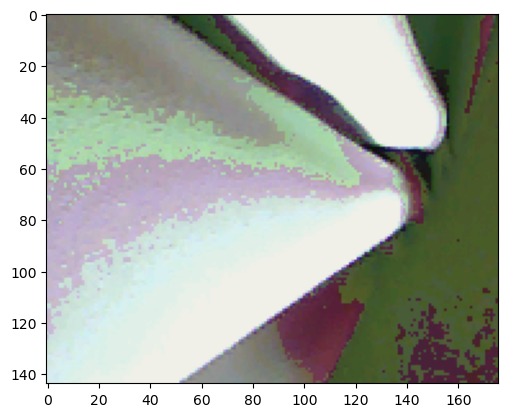

In [7]:
# Reformat the bytes into an image
print(len(HEXADECIMAL_BYTES))
raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
image = np.zeros((len(raw_bytes),3), dtype=int)

# Loop through all of the pixels and form the image
for i in range(len(raw_bytes)):
    #Read 16-bit pixel
    pixel = struct.unpack('>h', raw_bytes[i])[0]

    #Convert RGB565 to RGB 24-bit
    r = ((pixel >> 11) & 0x1f) << 3;
    g = ((pixel >> 5) & 0x3f) << 2;
    b = ((pixel >> 0) & 0x1f) << 3;
    image[i] = [r,g,b]

image = np.reshape(image,(144, 176,3)) #QCIF resolution

# Show the image
plt.imshow(image)
plt.show()